### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [409]:
data=pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\train.csv")

In [410]:
pd.set_option("display.max_columns",None)

In [411]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [412]:
data.shape

(1168, 81)

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

## Checking Null values

In [414]:
data.iloc[:,1:20].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [415]:
data.iloc[:,20:40].isnull().sum()

YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
dtype: int64

In [416]:
data.iloc[:,40:60].isnull().sum()

HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     551
GarageType       64
GarageYrBlt      64
dtype: int64

In [417]:
data.iloc[:,60:82].isnull().sum()

GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

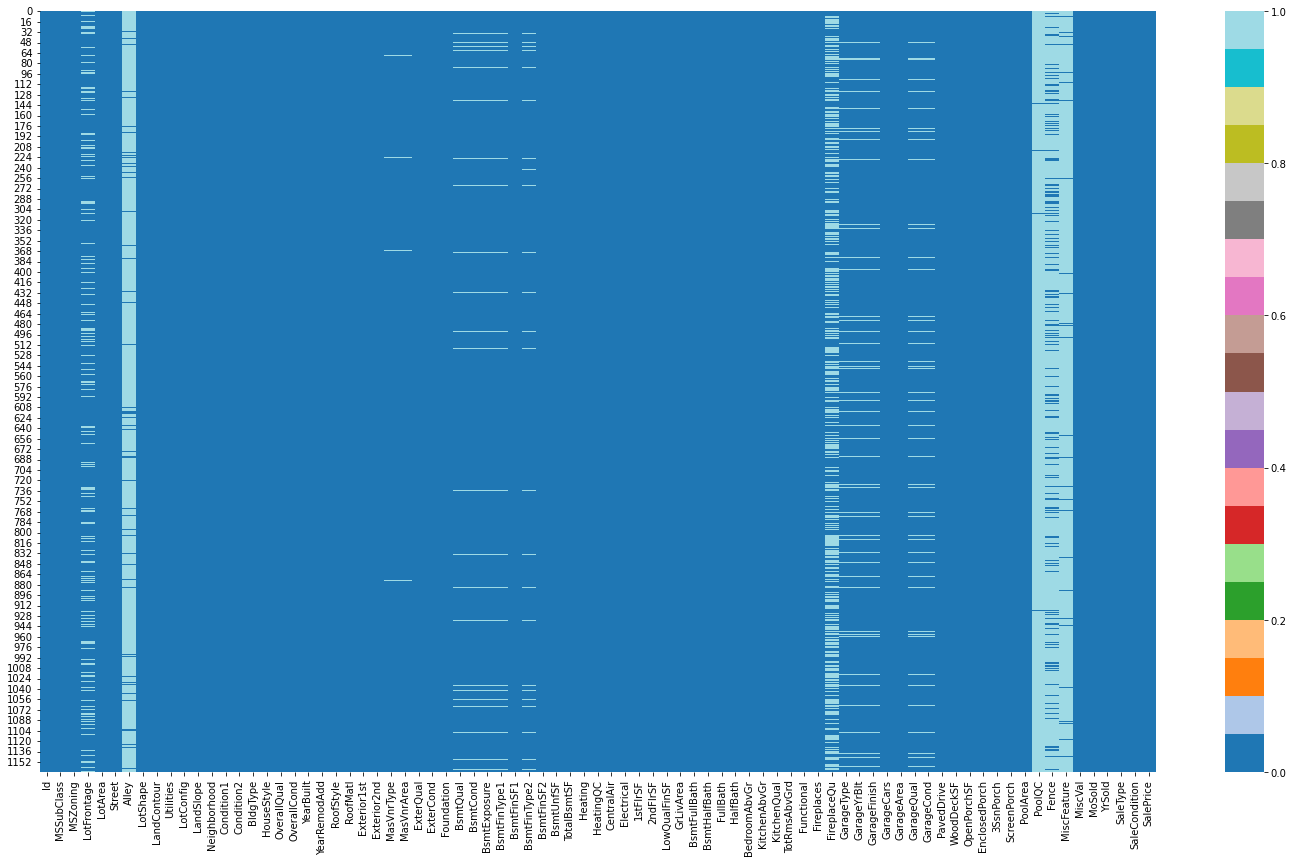

In [418]:
plt.figure(figsize=[25,14])
sns.heatmap(data.isnull(),cmap='tab20')
plt.show()

## Observation-1

In the above dataset :

1) The size of table is 1168 * 81 i.e. no. of rows are 1168 and no. of columns are 81(including target).

2) Out of 81 columns 38 columns are continuous in nature and rest 43 are object type.

3) Null values are present in our dataset, as we can see in ths seaborn heatmap.So we will adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

## Adopting Imputation Technique

In [419]:
from sklearn.impute import SimpleImputer

In [420]:
si=SimpleImputer(strategy='most_frequent')

In [421]:
na_col=['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
       'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [422]:
for i in na_col :
    data[i]=si.fit_transform(data[i].values.reshape(-1,1))

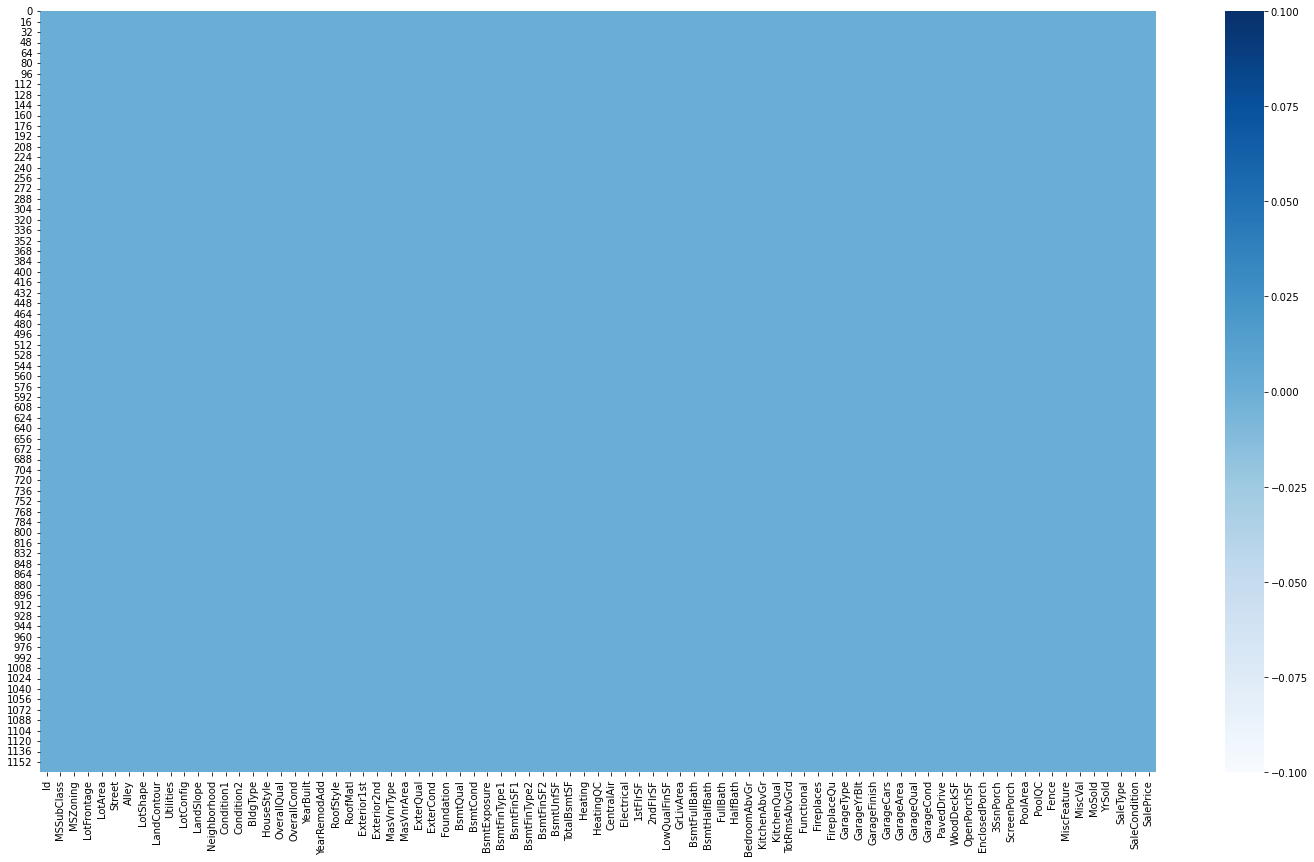

In [423]:
plt.figure(figsize=[25,14])
sns.heatmap(data.isnull(),cmap='Blues')
plt.show()

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset.

## Univariate analysis

<Figure size 432x288 with 0 Axes>

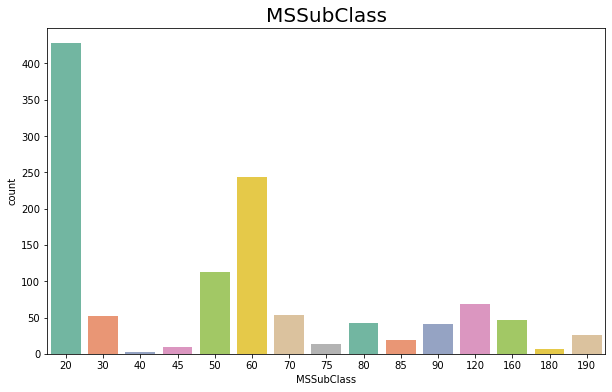

<Figure size 432x288 with 0 Axes>

In [424]:
plt.figure(figsize=[10,6])
plt.title('MSSubClass',fontsize=20)
sns.countplot(data['MSSubClass'],palette='Set2')
plt.figure()

<Figure size 432x288 with 0 Axes>

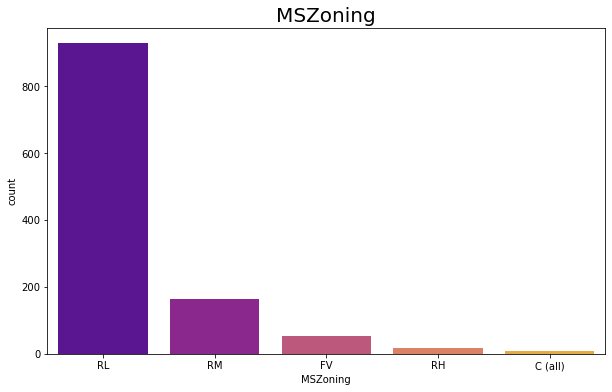

<Figure size 432x288 with 0 Axes>

In [425]:
plt.figure(figsize=[10,6])
plt.title('MSZoning',fontsize=20)
sns.countplot(data['MSZoning'],palette='plasma')
plt.figure()

In [ ]:
In Residential Low Density sale is highest. Its going downwards from Residential Medium Density followed by Floating Village Residential to Residential High Density and Commercial. Sale count in these areas is low.

<Figure size 432x288 with 0 Axes>

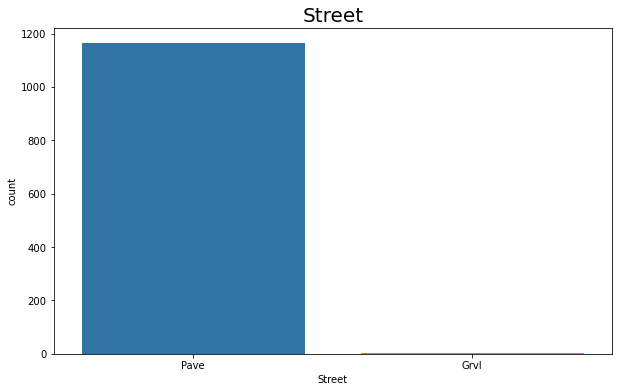

<Figure size 432x288 with 0 Axes>

In [426]:
plt.figure(figsize=[10,6])
plt.title('Street',fontsize=20)
sns.countplot(data['Street'])
plt.figure()

<Figure size 432x288 with 0 Axes>

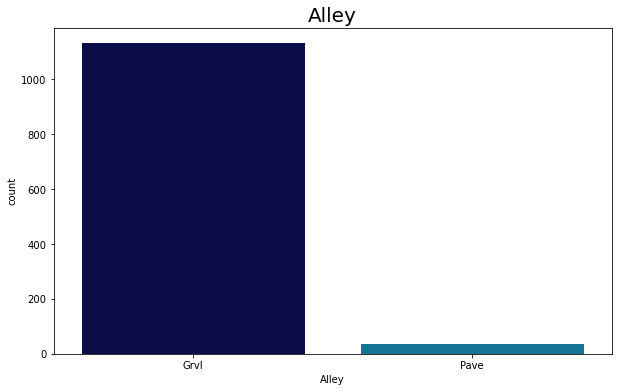

<Figure size 432x288 with 0 Axes>

In [427]:
plt.figure(figsize=[10,6])
plt.title('Alley',fontsize=20)
sns.countplot(data['Alley'],palette='ocean')
plt.figure()

In [ ]:
More than 1000 houses have Gravel access, and around 20 houses have paved access.

<Figure size 432x288 with 0 Axes>

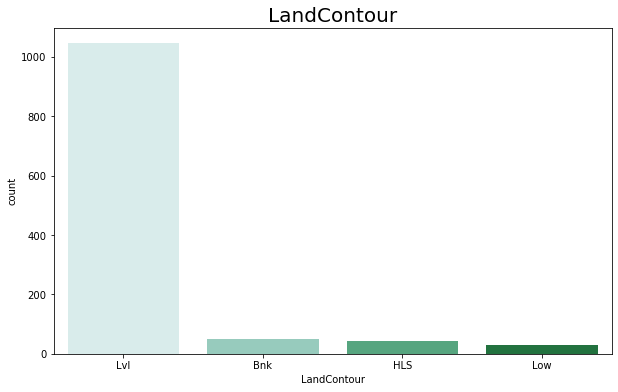

<Figure size 432x288 with 0 Axes>

In [428]:
plt.figure(figsize=[10,6])
plt.title('LandContour',fontsize=20)
sns.countplot(data['LandContour'],palette='BuGn')
plt.figure()

In [ ]:
More than 1000 houses are near flat, a little number of houses have Banked - Quick and significant rise from street grade to building
    , few of the houses have Significant slope from side to side and few have Low	Depression as well.

Text(0.5, 1.0, 'LotConfig')

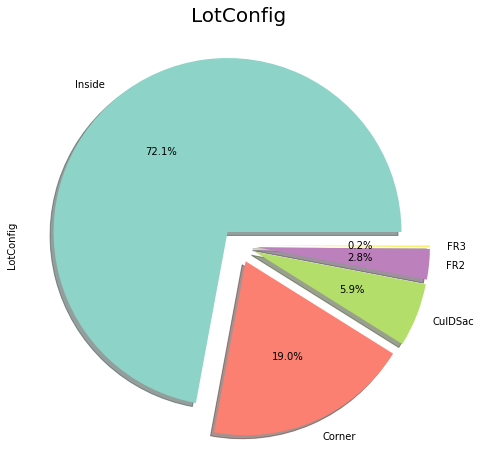

In [429]:
data.LotConfig.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct="%1.1f%%",cmap='Set3')
plt.title('LotConfig',fontsize=20)

<Figure size 432x288 with 0 Axes>

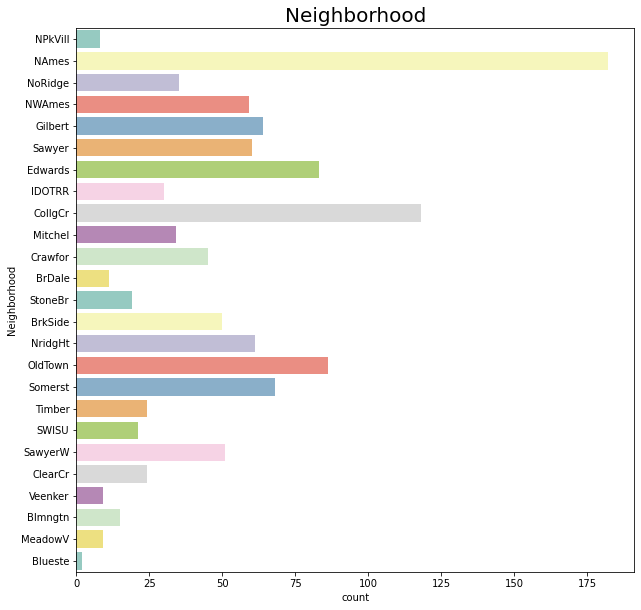

<Figure size 432x288 with 0 Axes>

In [430]:
plt.figure(figsize=[10,10])
plt.title('Neighborhood',fontsize=20)
sns.countplot(y=data['Neighborhood'],palette='Set3')
plt.figure()

<Figure size 432x288 with 0 Axes>

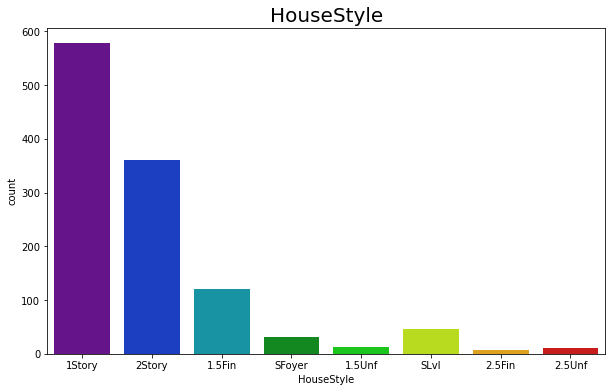

<Figure size 432x288 with 0 Axes>

In [431]:
plt.figure(figsize=[10,6])
plt.title('HouseStyle',fontsize=20)
sns.countplot(data['HouseStyle'],palette='nipy_spectral')
plt.figure()

<Figure size 432x288 with 0 Axes>

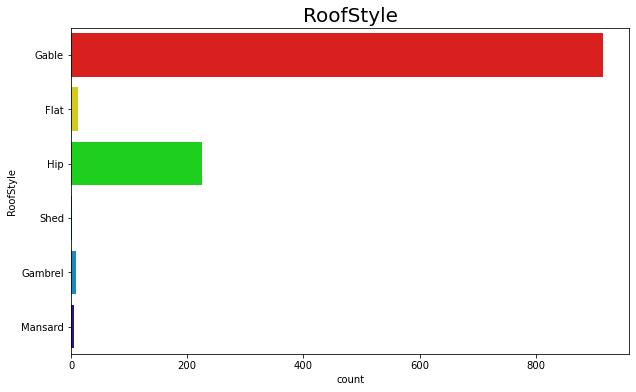

<Figure size 432x288 with 0 Axes>

In [432]:
plt.figure(figsize=[10,6])
plt.title('RoofStyle',fontsize=20)
sns.countplot(y=data['RoofStyle'],palette='nipy_spectral_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

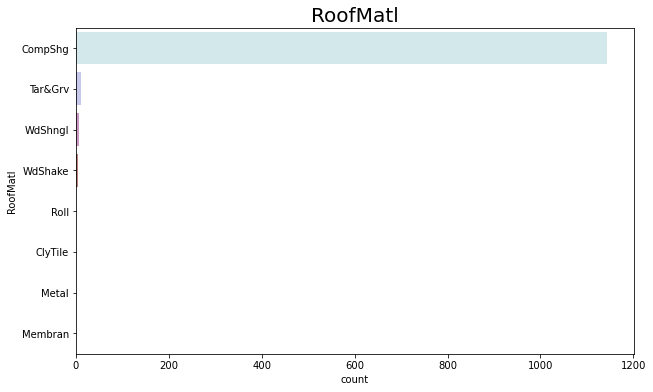

<Figure size 432x288 with 0 Axes>

In [433]:
plt.figure(figsize=[10,6])
plt.title('RoofMatl',fontsize=20)
sns.countplot(y=data['RoofMatl'],palette='cubehelix_r')
plt.figure()

Text(0.5, 1.0, 'LotConfig')

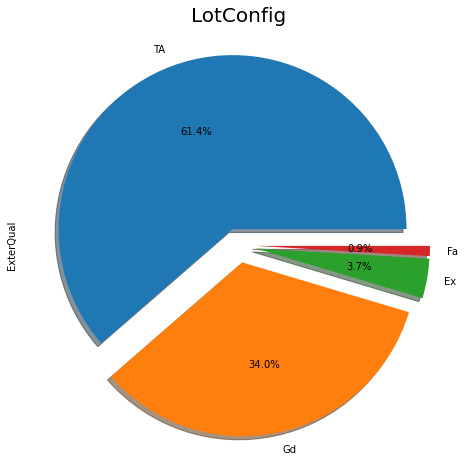

In [434]:
data.ExterQual.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct="%1.1f%%")
plt.title('LotConfig',fontsize=20)

<Figure size 432x288 with 0 Axes>

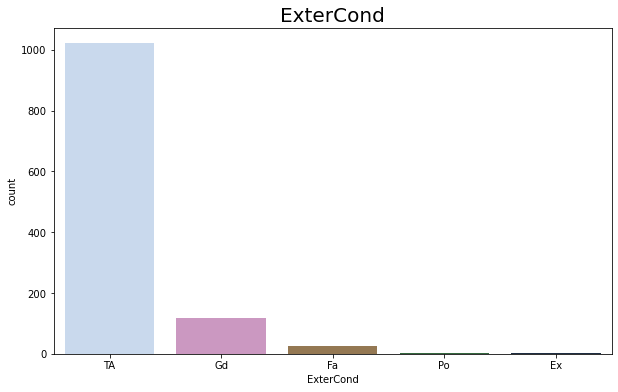

<Figure size 432x288 with 0 Axes>

In [435]:
plt.figure(figsize=[10,6])
plt.title('ExterCond',fontsize=20)
sns.countplot(data['ExterCond'],palette='cubehelix_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

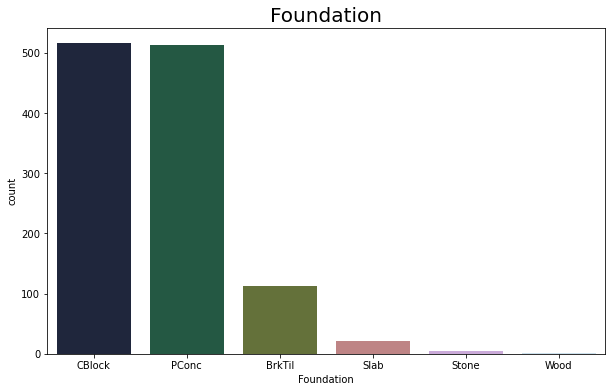

<Figure size 432x288 with 0 Axes>

In [436]:
plt.figure(figsize=[10,6])
plt.title('Foundation',fontsize=20)
sns.countplot(data['Foundation'],palette='cubehelix')
plt.figure()

<Figure size 432x288 with 0 Axes>

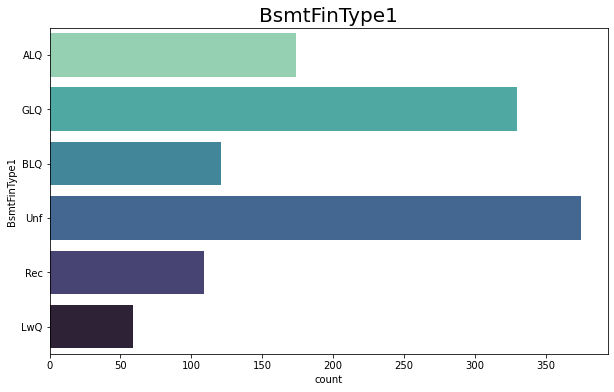

<Figure size 432x288 with 0 Axes>

In [437]:
plt.figure(figsize=[10,6])
plt.title('BsmtFinType1',fontsize=20)
sns.countplot(y=data['BsmtFinType1'],palette='mako_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

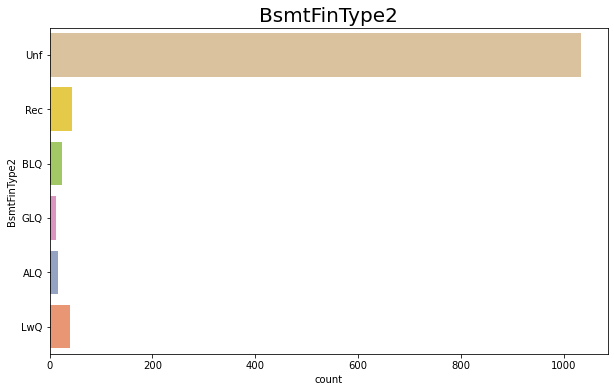

<Figure size 432x288 with 0 Axes>

In [438]:
plt.figure(figsize=[10,6])
plt.title('BsmtFinType2',fontsize=20)
sns.countplot(y=data['BsmtFinType2'],palette='Set2_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

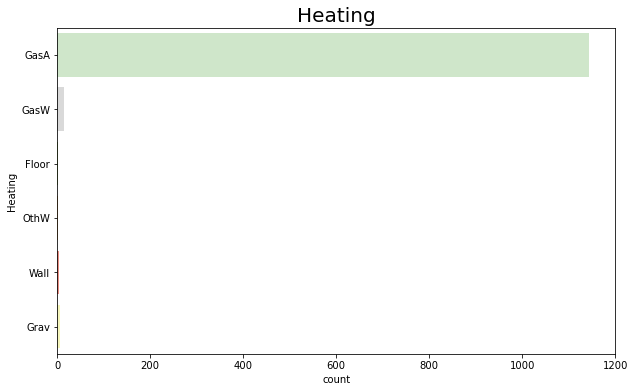

<Figure size 432x288 with 0 Axes>

In [439]:
plt.figure(figsize=[10,6])
plt.title('Heating',fontsize=20)
sns.countplot(y=data['Heating'],palette='Set3_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

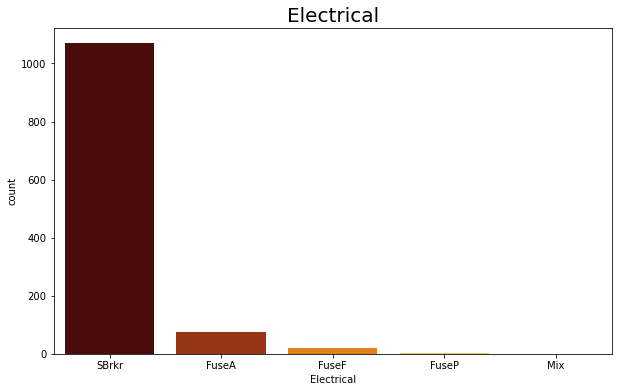

<Figure size 432x288 with 0 Axes>

In [440]:
plt.figure(figsize=[10,6])
plt.title('Electrical',fontsize=20)
sns.countplot(data['Electrical'],palette='afmhot')
plt.figure()

<Figure size 432x288 with 0 Axes>

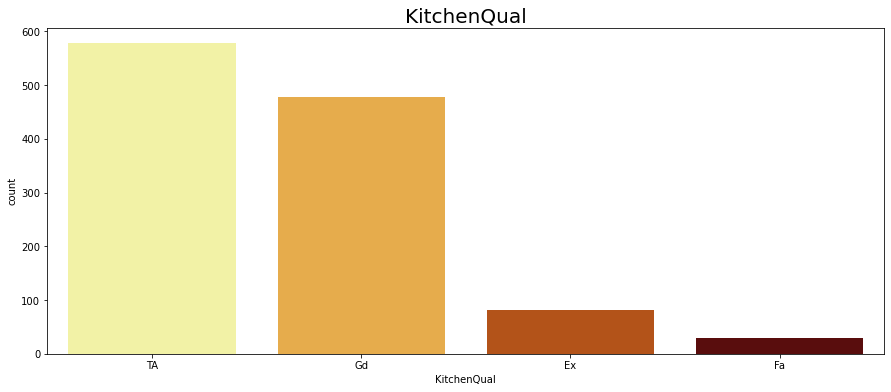

<Figure size 432x288 with 0 Axes>

In [441]:
plt.figure(figsize=[15,6])
plt.title('KitchenQual',fontsize=20)
sns.countplot(data['KitchenQual'],palette='afmhot_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

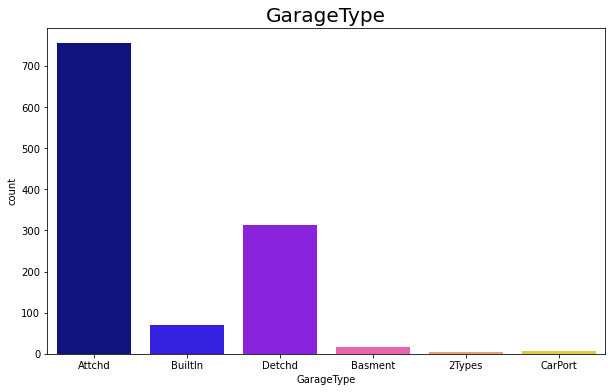

<Figure size 432x288 with 0 Axes>

In [442]:
plt.figure(figsize=[10,6])
plt.title('GarageType',fontsize=20)
sns.countplot(data['GarageType'],palette='gnuplot2')
plt.figure()

Text(0.5, 1.0, 'GarageFinish')

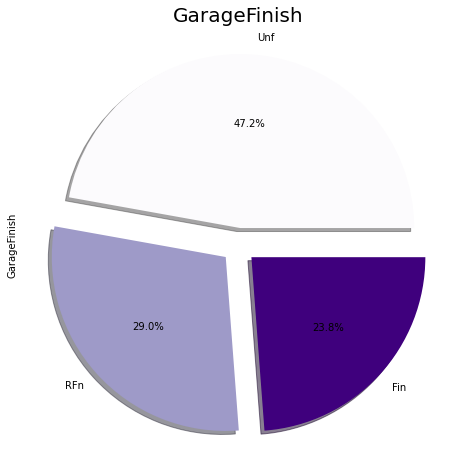

In [443]:
data.GarageFinish.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct="%1.1f%%",cmap='Purples')
plt.title('GarageFinish',fontsize=20)

<Figure size 432x288 with 0 Axes>

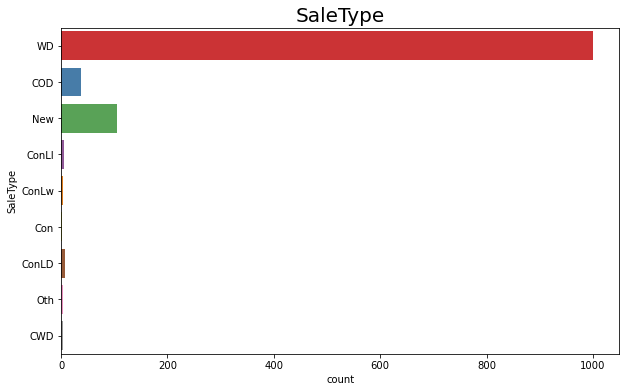

<Figure size 432x288 with 0 Axes>

In [444]:
plt.figure(figsize=[10,6])
plt.title('SaleType',fontsize=20)
sns.countplot(y=data['SaleType'],palette='Set1')
plt.figure()

### Observation-3

1) As we can see in the MSSUbClass column the STORY 1946 & NEWER ALL STYLES type house(20) is present highest number of times in the column, The counting of 2-STORY 1946 & NEWER house(60) is also high, rest all the house types are less present and having less number of counts.

2) If we see the MSZoning column, we will find that most of the houses has been built in ths Residential Low Density(RL) Zoning and very less houses are build in the Agriculture, Commercial, Floating Village Residential, Industrial, Residential High,Density, Residential Low Density Park and Residential Medium Density MSzoning.

3) Pave type road is being used in the street and gravel type alley is being used to access the property.

4) As we can see in our data plenty of the house's landcontour are Lvl(Near Flat/Level) and bnk(Banked), HLS(Hillside) and Low(Depression) type landcounter are very less.

5) Lot configuration is the one of the most important factor for deciding the house price.Due to less avilibility of frontage on 2 and 3 side property and high supply of insight and corner lot the houses are built inside in most of the cases and very less houses are built in FR2 and FR3 configuration.

6) Around 570 houses are one story, having same housestyle, 370 houses are One and one-half story building wherin 2nd levelis finished reflects different housestyle, approximately 30 houses are Split Foyers, 20 are One and one-half story wherein 2nd level is finished. 40 around houses are Split Level house. Rest of the housestyles which are very less in numbers are Two and one-half storys wherein 2nd level is finished in some and unfinished in others.

7) More than 800 houses have gable roof, 200 around have hip roof and very small number has got flat roofs.

8) Approximately 1130 houses are bulit of using Standard (Composite) Shingle, and 10 of Gravel & Ta, less than 10 are made up of using wood Shakes and Wood Shingles.

9) Condition of the material of 1000 houses is Average/Typical, of 180 houses is good and approximately 30 around houses are in fine condition. 

10) 500 houses's foundation is made up of Cinder Block and another 500 around houses' foundation is made up of Poured Contrete. Foundation of 100 houses are build of Brick & Tile. A few numbers are there which are made up of slab, stones and wood.

11) 60 basements are with good living quraters, 110 are with average rest room, more than 350 are unfinished, approxamtely 120 are with Below Average Living Quarters, around 320 are with Good Living Quarters, and 160 aroud are with Average Living Quarters. 

12) More than 1000 basement areas are Unfinshed. 50 around numbers of basements have Average Rec Room and Low Quality. 50 around basements have Good Living Quarters, and  Average Living Quarters, also little number of basemnets have Below Average Living Quarters.

13) Approxately 1150 numbers have Gas forced warm air furnace, while the houses that haveGas hot water or steam heat are negligible.

14) More than 1000 houses have Standard Circuit Breakers & Romex. The houses that have Fuse Box over 60 AMP and all Romex wiring (Average) and 60 AMP Fuse Box and mostly Romex wiring (Fair) are very little in number.

15) In most of the houses (around 750) garage is attched and in 300 aroud houses garage is detched.

16) Around 570 houses' kicthens are typical average.  460 are good. 90 has got Excellent quality and very less are left with fair quality.

17) Warranty Deed - Conventional is very high in numbers, the Homes that just constructed and sold, are less in numbers. Around 30 houses are being sold though Court Officer Deed/Estate, while other sale types are negligible in numbers.

## Bivariate Analysis

Text(0.5, 1.0, 'Foundation and Garage type')

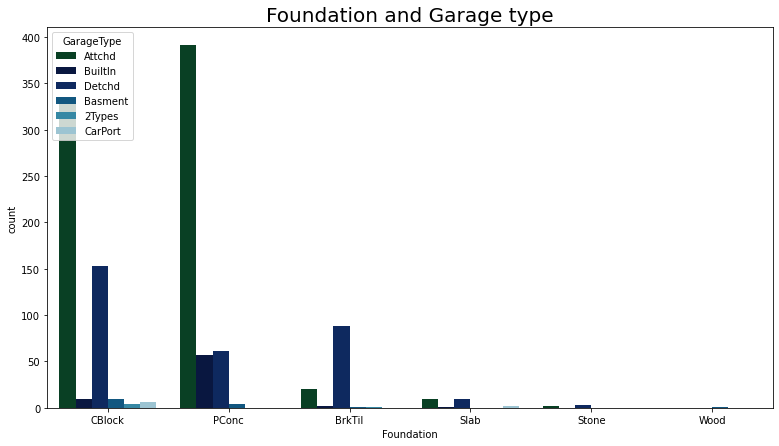

In [446]:
plt.figure(figsize=[13,7])
sns.countplot(data["Foundation"], hue=data["GarageType"],palette='ocean')
plt.title("Foundation and Garage type",fontsize=20)

Text(0.5, 1.0, 'MSZoning and LotShape')

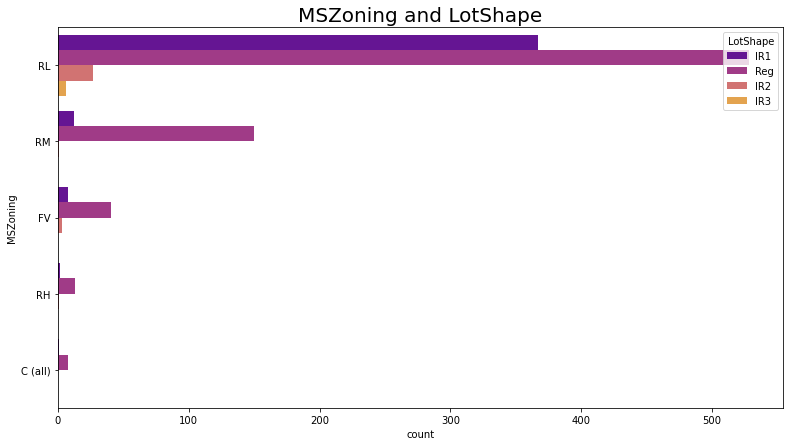

In [447]:
plt.figure(figsize=[13,7])
sns.countplot(y=data["MSZoning"], hue=data["LotShape"],palette='plasma')
plt.title("MSZoning and LotShape",fontsize=20)

Text(0.5, 1.0, 'SaleCondition and House style')

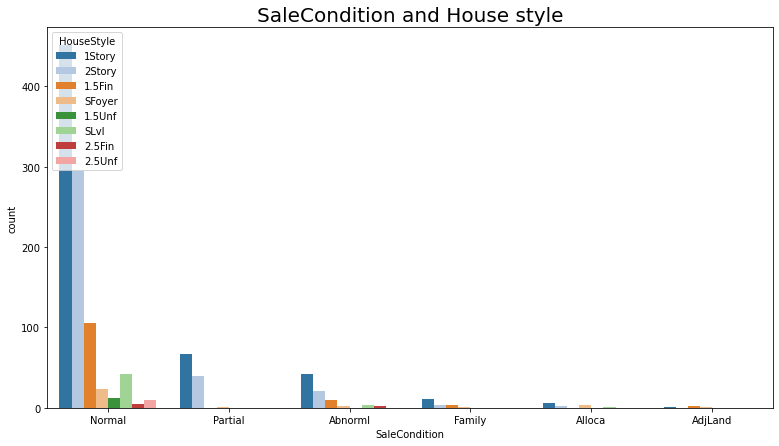

In [448]:
plt.figure(figsize=[13,7])
sns.countplot(data["SaleCondition"], hue=data["HouseStyle"],palette='tab20')
plt.title("SaleCondition and House style",fontsize=20)

4) SaleCondition and House style- In the normal sale condition 1story and 2story house style is avilabe in high amount and One and one-half story: 2nd level finished availability is less but still present, and rest house styles is vey less avilable.
    In the partial sale condition only 1story and 2story houses are avilabe, In the abnormal sale condition all the house style are avilable but having less number of availability. 

Text(0.5, 1.0, 'SaleCondition and MSZoning')

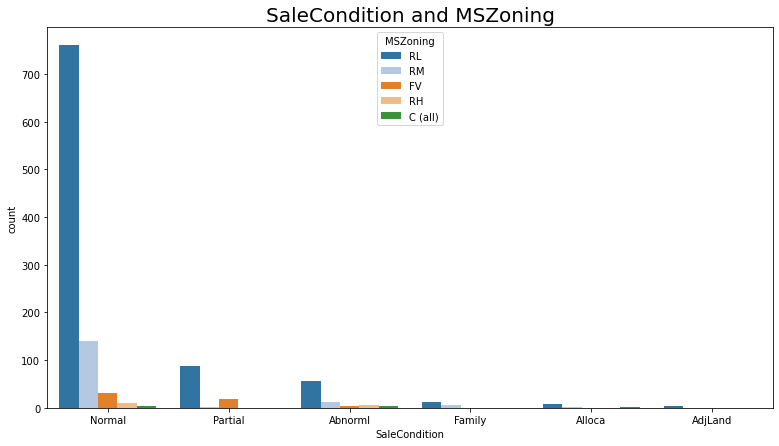

In [449]:
plt.figure(figsize=[13,7])
sns.countplot(data["SaleCondition"], hue=data["MSZoning"],palette='tab20')
plt.title("SaleCondition and MSZoning",fontsize=20)

Text(0.5, 1.0, 'PoolQC and Sale type')

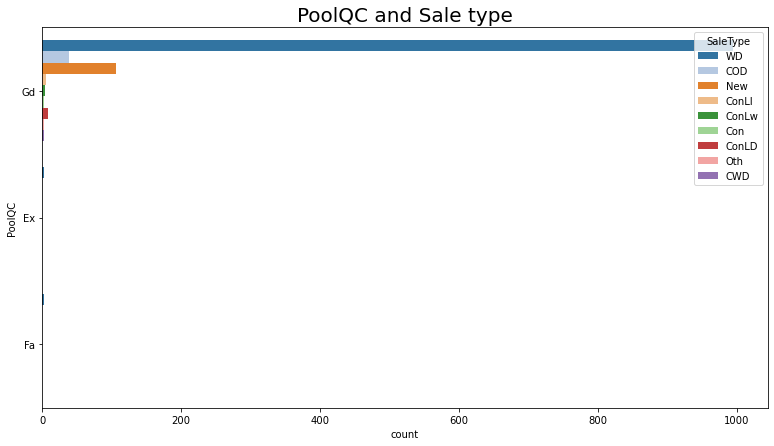

In [450]:
plt.figure(figsize=[13,7])
sns.countplot(y=data["PoolQC"], hue=data["SaleType"],palette='tab20')
plt.title("PoolQC and Sale type",fontsize=20)

Text(0.5, 1.0, 'LotShape and GarageQual')

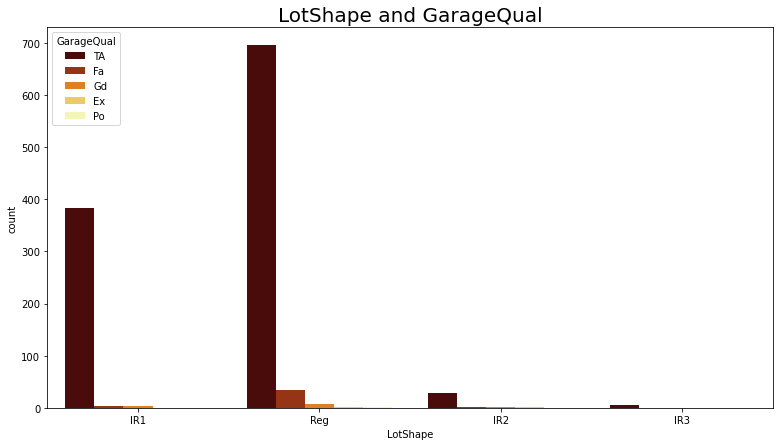

In [451]:
plt.figure(figsize=[13,7])
sns.countplot(data["LotShape"], hue=data["GarageQual"],palette='afmhot')
plt.title("LotShape and GarageQual",fontsize=20)

Text(0.5, 1.0, 'RoofMatl and Heating')

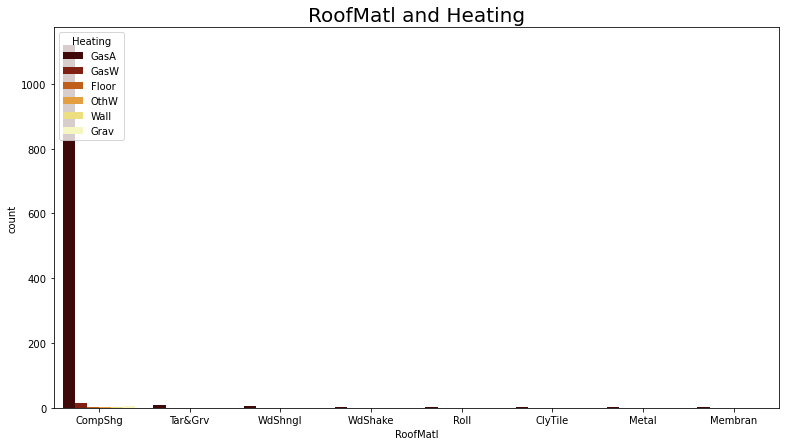

In [452]:
plt.figure(figsize=[13,7])
sns.countplot(data["RoofMatl"], hue=data["Heating"],palette='afmhot')
plt.title("RoofMatl and Heating",fontsize=20)

Text(0.5, 1.0, 'MSZoning and Fence')

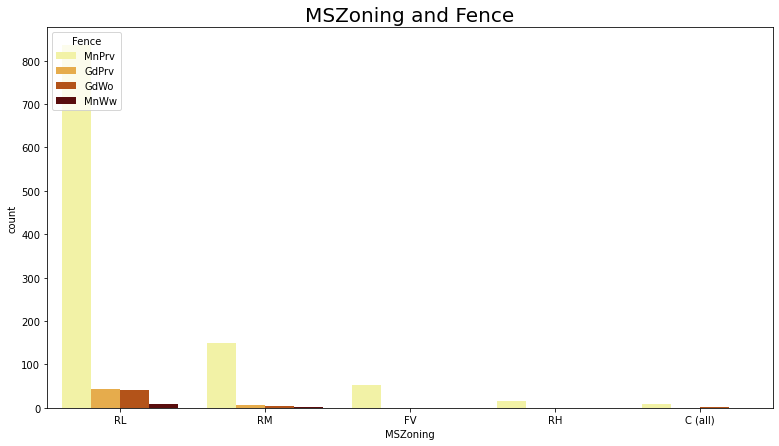

In [453]:
plt.figure(figsize=[13,7])
sns.countplot(data["MSZoning"], hue=data["Fence"],palette='afmhot_r')
plt.title("MSZoning and Fence",fontsize=20)

Text(0.5, 1.0, 'HouseStyle and Electrical')

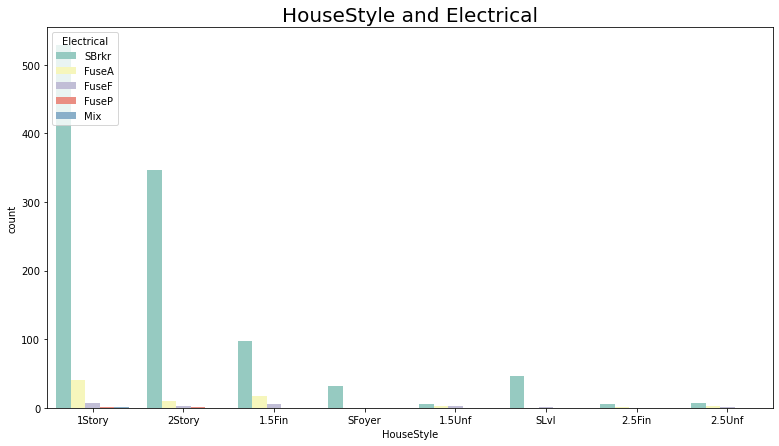

In [454]:
plt.figure(figsize=[13,7])
sns.countplot(data["HouseStyle"], hue=data["Electrical"],palette='Set3')
plt.title("HouseStyle and Electrical",fontsize=20)

Text(0.5, 1.0, 'HouseStyle and LandSlpoe')

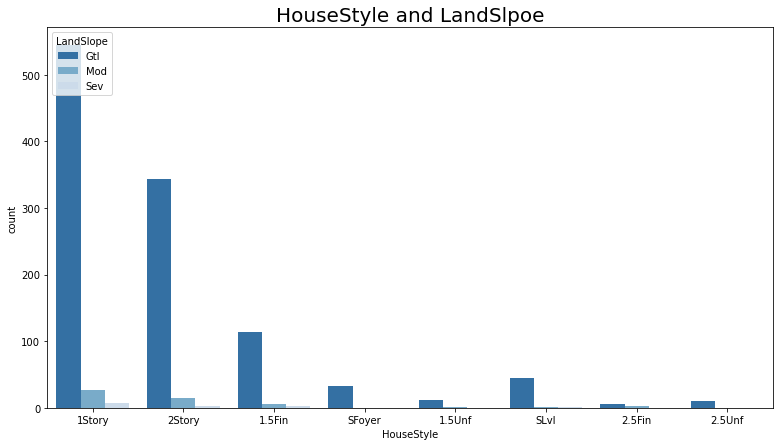

In [455]:
plt.figure(figsize=[13,7])
sns.countplot(data["HouseStyle"], hue=data["LandSlope"],palette='Blues_r')
plt.title("HouseStyle and LandSlpoe",fontsize=20)

### Observation-4

1) HouseStyle and LandSlpoe- Gentle slope land is the common most slope, present in all the house style.

2) Foundation and Garage type- In the cinder block and poured contrete type fundation attched garage is being used in high amount and then detched garage.In the Brick & Tile type foundation detched garage is being used in high amount and other garage is uesd in very less amount.

3) MSZoning and LotShape- in the Residential Low Density Zone the lot shape is regular type in most of the cases and then Slightly irregular lot shape has been built, Moderately Irregular and Irregular lot shape is used in few number of houses only.
    In the conclusion regular type lot shape is found in all the available Mszoning.

4) PoolQC and Sale type- When good pool quality is good, house sale type is Warranty Deed-Conventional(WD) and higher in numbers, rest all the sale type is very less.

5) LotShape and GarageQual- Typical/Average garage quality is higher in all type of lot shape, In the Moderately Irregular, Irregular lot shape only Typical/Average lot shape is avilable and in the regular lot shape, garage quality fair and good is avilabe but in the negligible amount and again Typical/Average garage quality is higher in regular lot shape.

6) MSZoning and Fence- In the Residential Low Density Zone, Minimum Privacy fence is avilable in huge amount and very less  availability of good privacy, good wood and minimum wood type fencing And alos we can say that in all the zoning mimimum privacy type fence is present.

### Dropping Id and AllPub columns

In [458]:
data.drop(['Id'],axis=1,inplace=True)
data.drop(['Utilities'],axis=1,inplace=True)

### Checking Correlation

In [459]:
data.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
OverallCond     -0.065642
MSSubClass      -0.060775
YrSold          -0.045508
LowQualFinSF    -0.032381
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
3SsnPorch        0.060119
MoSold           0.072764
ScreenPorch      0.100284
PoolArea         0.103280
BedroomAbvGr     0.158281
BsmtFullBath     0.212924
BsmtUnfSF        0.215724
LotArea          0.249499
HalfBath         0.295592
WoodDeckSF       0.315444
LotFrontage      0.319414
2ndFlrSF         0.330386
OpenPorchSF      0.339500
BsmtFinSF1       0.362874
GarageYrBlt      0.381997
Fireplaces       0.459611
MasVnrArea       0.460535
YearRemodAdd     0.507831
YearBuilt        0.514408
TotRmsAbvGrd     0.528363
FullBath         0.554988
1stFlrSF         0.587642
TotalBsmtSF      0.595042
GarageArea       0.619000
GarageCars       0.628329
GrLivArea        0.707300
OverallQual      0.789185
SalePrice        1.000000
Name: SalePrice, dtype: float64

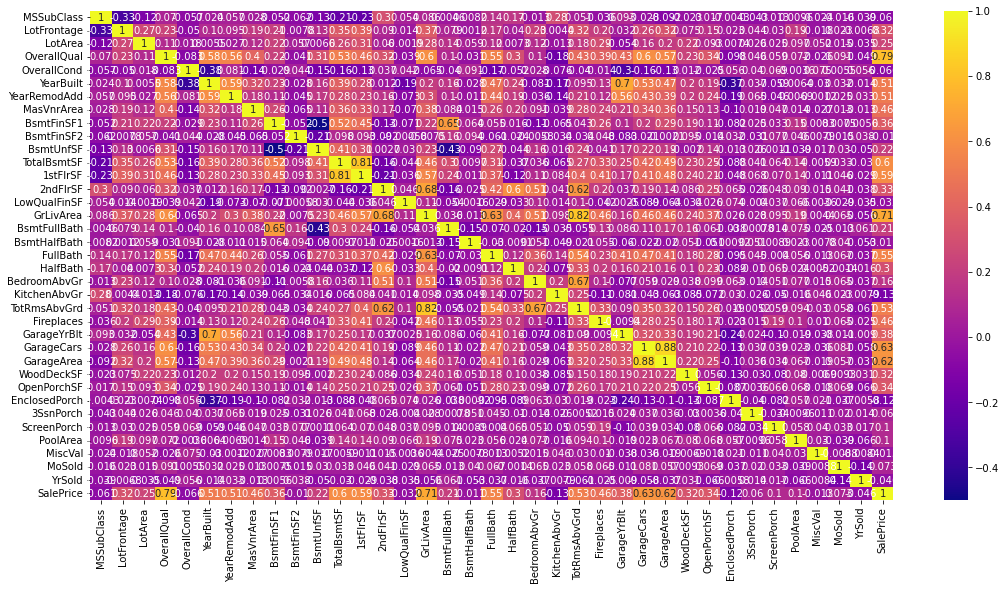

In [460]:
plt.figure(figsize=[18,9])
sns.heatmap(data.corr(),cmap='plasma',annot=True)
plt.show()

<AxesSubplot:>

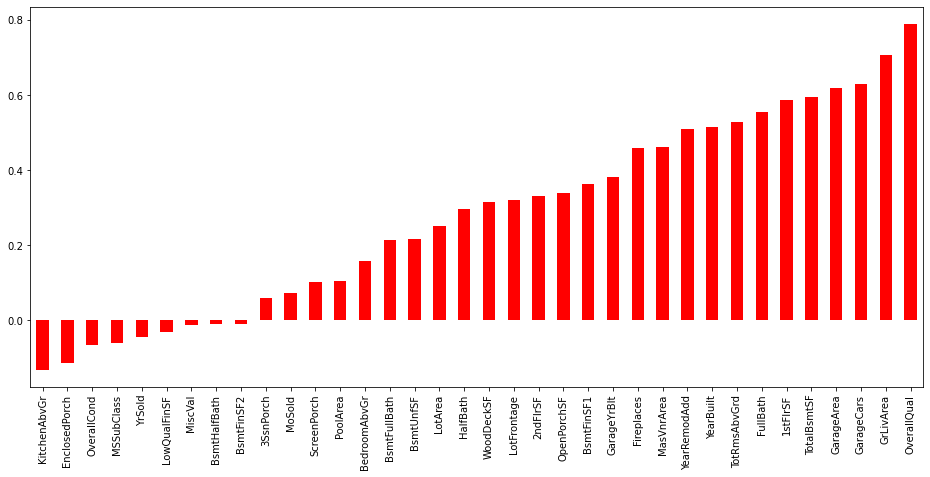

In [461]:
plt.figure(figsize=[16,7])
data.corr()['SalePrice'].sort_values().drop(['SalePrice']).plot(kind='bar',color='r')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

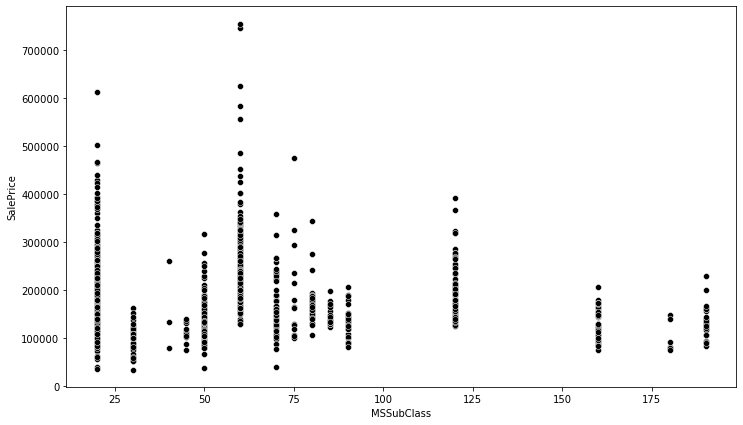

In [462]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='MSSubClass',y='SalePrice',data=data,color='black')

1) The house price is higher in 2-STORY 1946 & NEWER and 1-STORY 1946 & NEWER ALL STYLES type MSsubclass.
2) The price is average in 2-STORY 1945 & OLDER, 2-1/2 STORY ALL AGES, SPLIT OR MULTI-LEVEL, SPLIT FOYER, DUPLEX - ALL STYLES AND AGES type MSsubclass.
3) The house price are very less in PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, 1-1/2 STORY - UNFINISHED ALL AGES type MSsubclass.

4) The house prices are very high in gentle slpoe, avg in moderate and less in severe slope.



<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

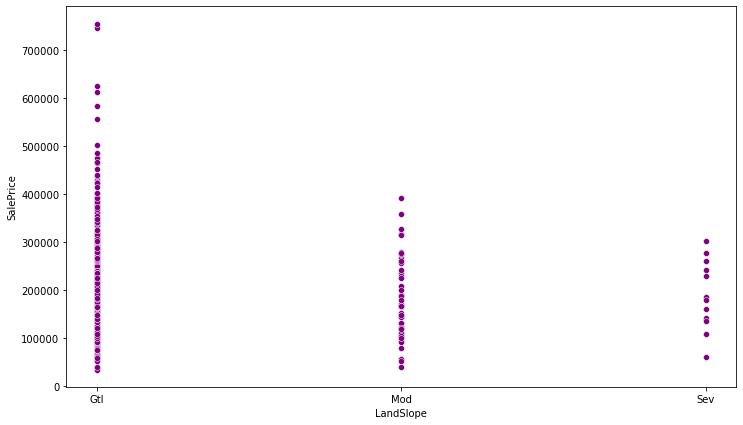

In [463]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='LandSlope',y='SalePrice',data=data,color='purple')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

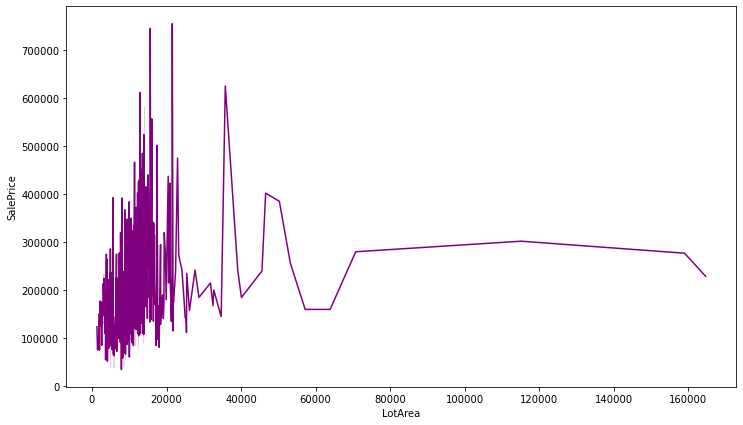

In [464]:
plt.figure(figsize=[12,7])
sns.lineplot(x='LotArea',y='SalePrice',data=data,color='purple')

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

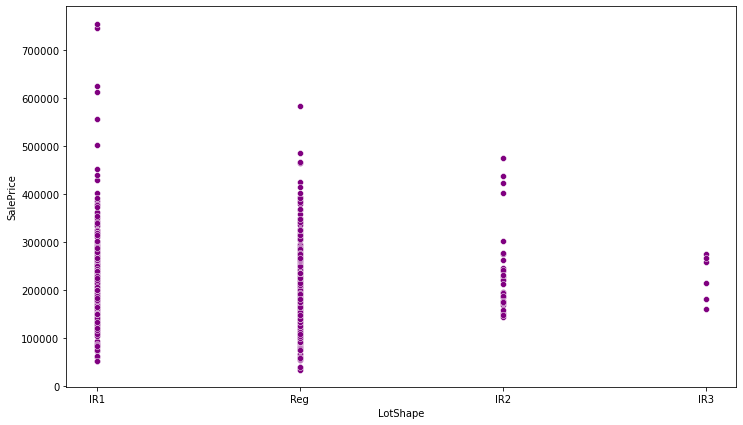

In [465]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='LotShape',y='SalePrice',data=data,color='purple')

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

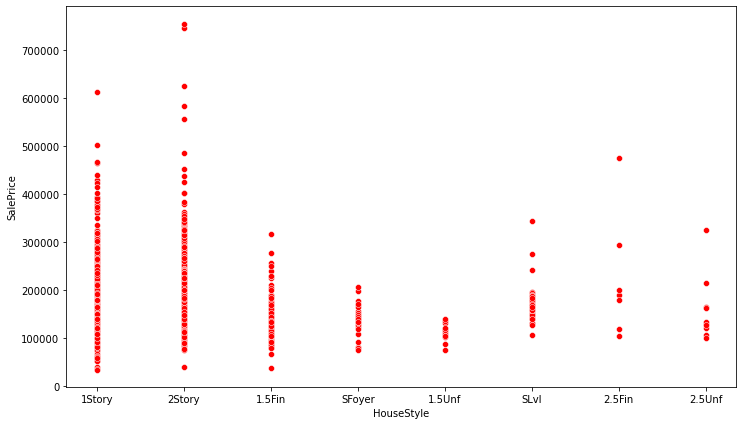

In [466]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='HouseStyle',y='SalePrice',data=data,color='r')

<AxesSubplot:xlabel='SalePrice', ylabel='RoofStyle'>

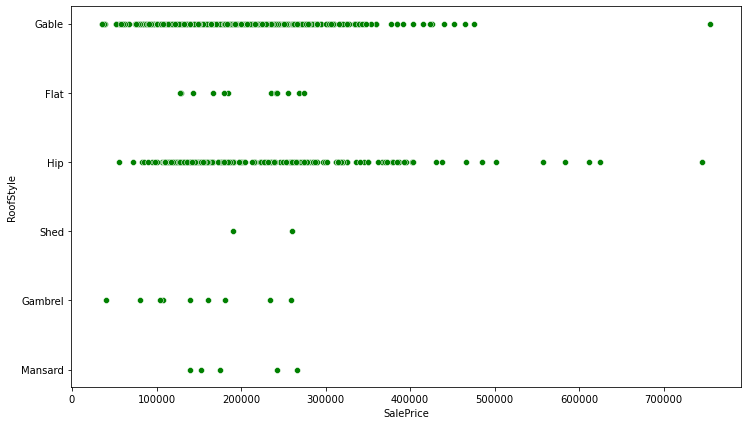

In [467]:
plt.figure(figsize=[12,7])
sns.scatterplot(y='RoofStyle',x='SalePrice',data=data,color='g')

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

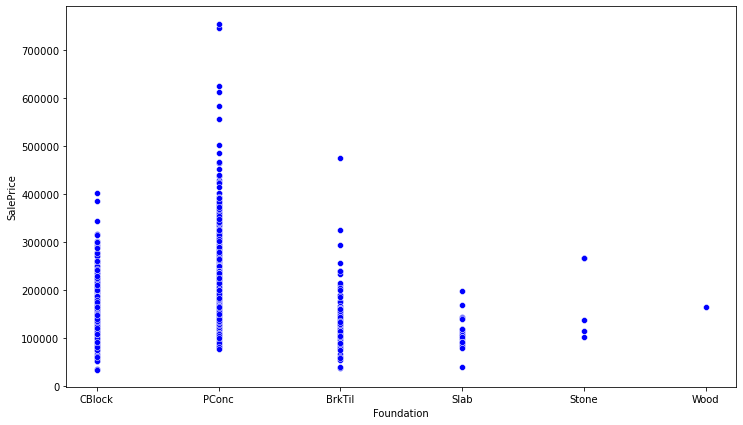

In [468]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='Foundation',y='SalePrice',data=data,color='b')

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

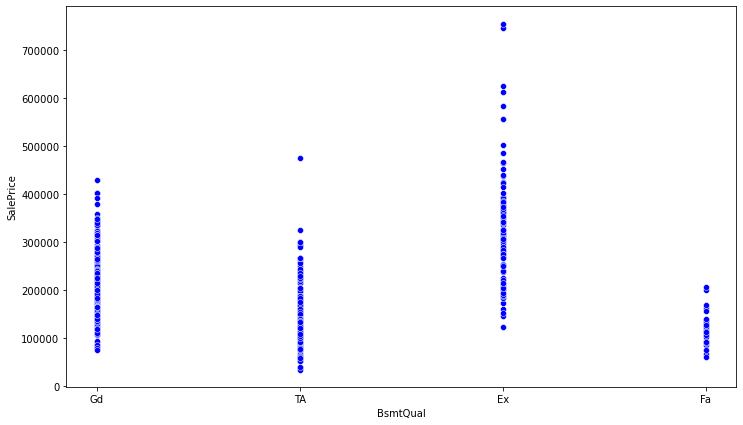

In [469]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='BsmtQual',y='SalePrice',data=data,color='b')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

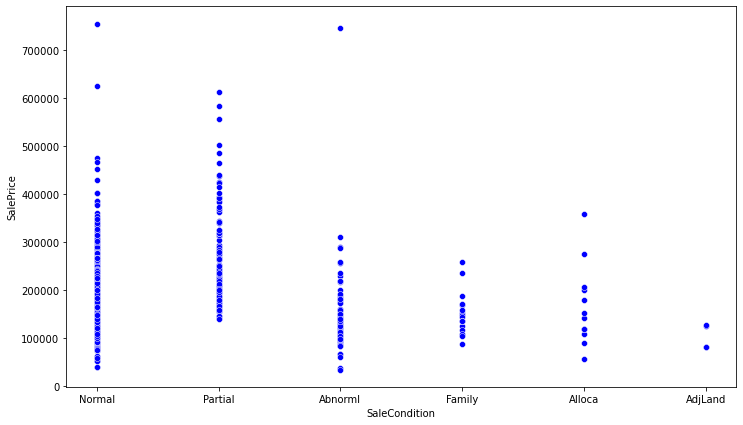

In [470]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='SaleCondition',y='SalePrice',data=data,color='b')

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

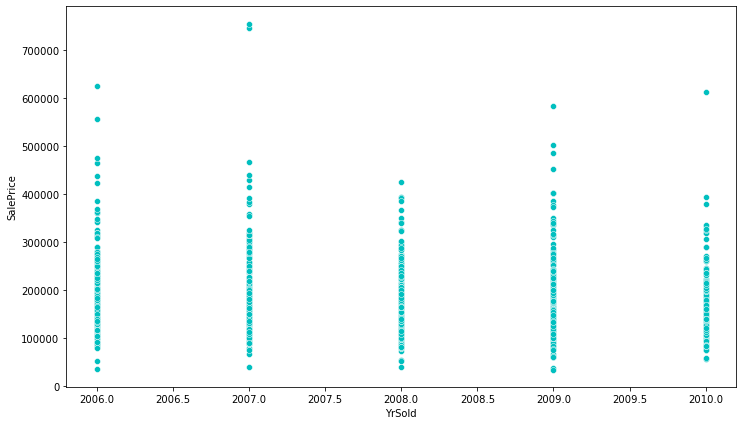

In [471]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='YrSold',y='SalePrice',data=data,color='c')

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

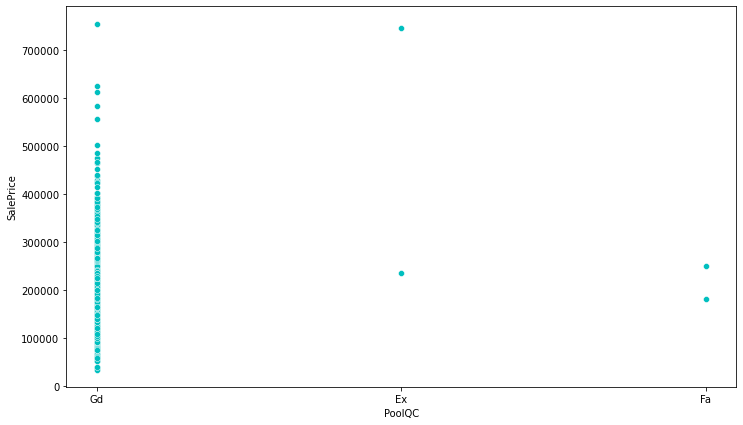

In [472]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='PoolQC',y='SalePrice',data=data,color='c')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

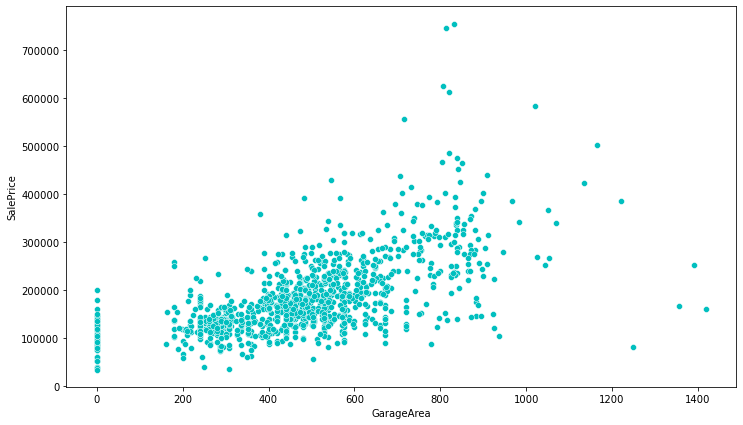

In [473]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='GarageArea',y='SalePrice',data=data,color='c')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

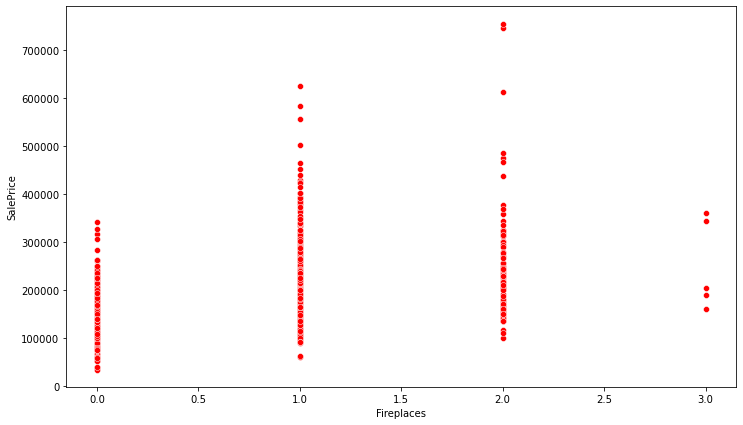

In [474]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='Fireplaces',y='SalePrice',data=data,color='r')

<AxesSubplot:xlabel='SalePrice', ylabel='TotRmsAbvGrd'>

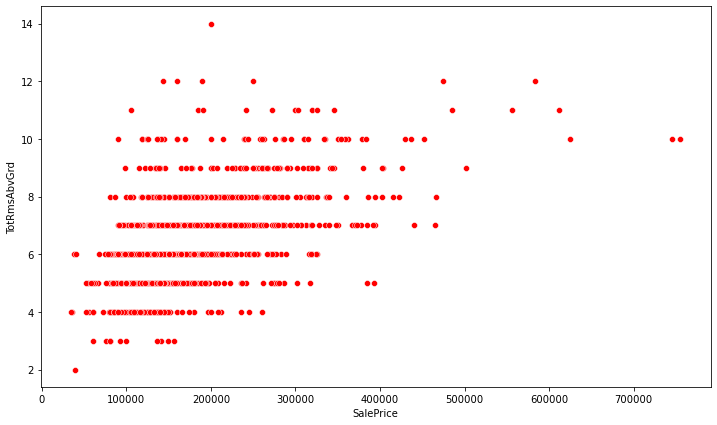

In [475]:
plt.figure(figsize=[12,7])
sns.scatterplot(y='TotRmsAbvGrd',x='SalePrice',data=data,color='r')

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

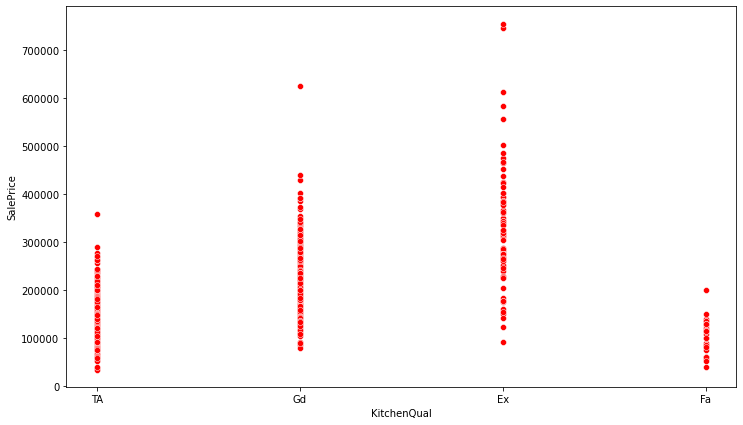

In [476]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='KitchenQual',y='SalePrice',data=data,color='r')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

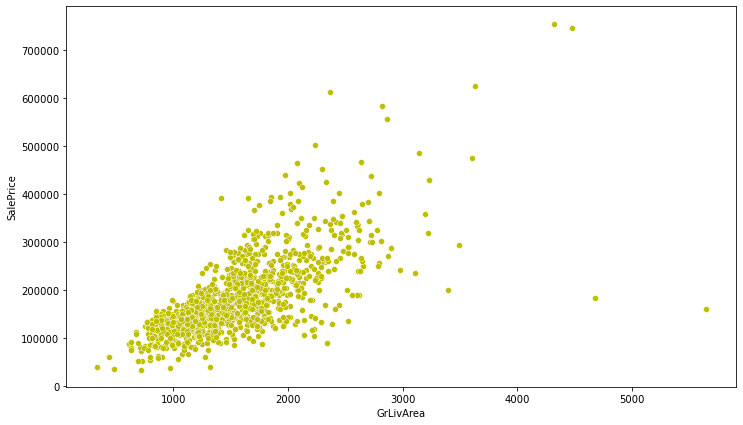

In [477]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='GrLivArea',y='SalePrice',data=data,color='y')

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

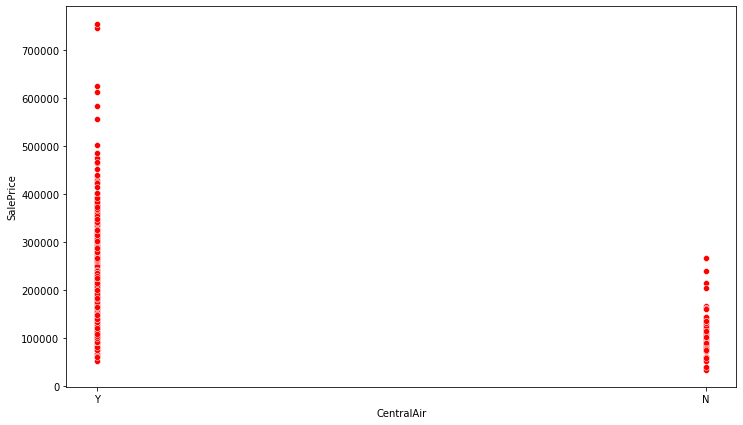

In [478]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='CentralAir',y='SalePrice',data=data,color='r')

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

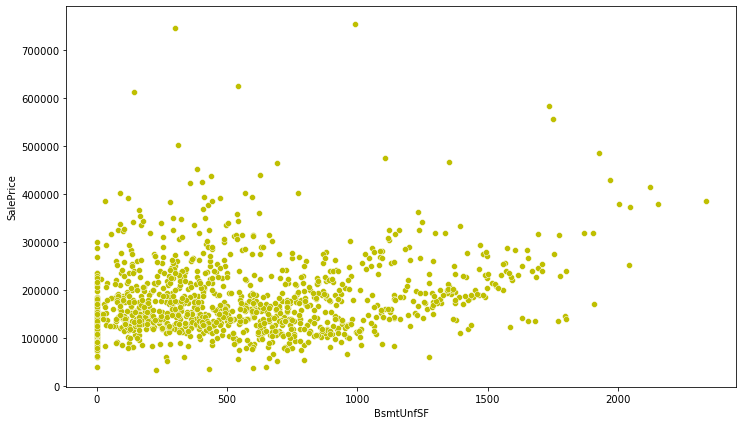

In [479]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=data,color='y')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

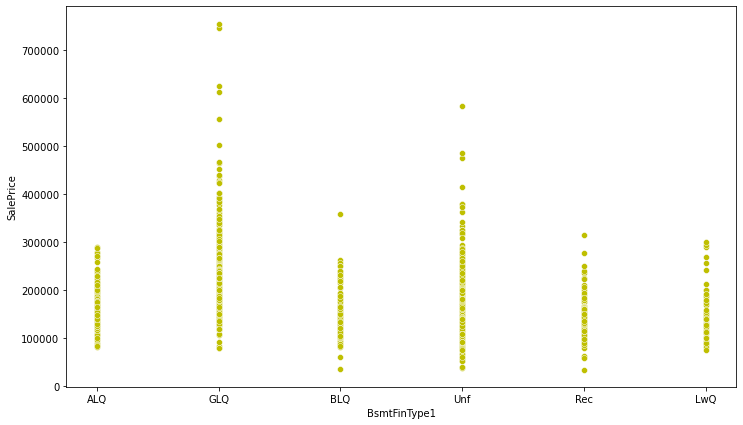

In [480]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='BsmtFinType1',y='SalePrice',data=data,color='y')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

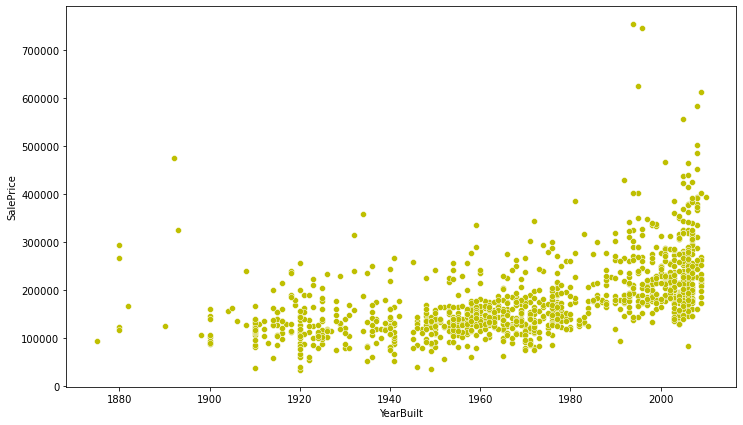

In [481]:
plt.figure(figsize=[12,7])
sns.scatterplot(x='YearBuilt',y='SalePrice',data=data,color='y')

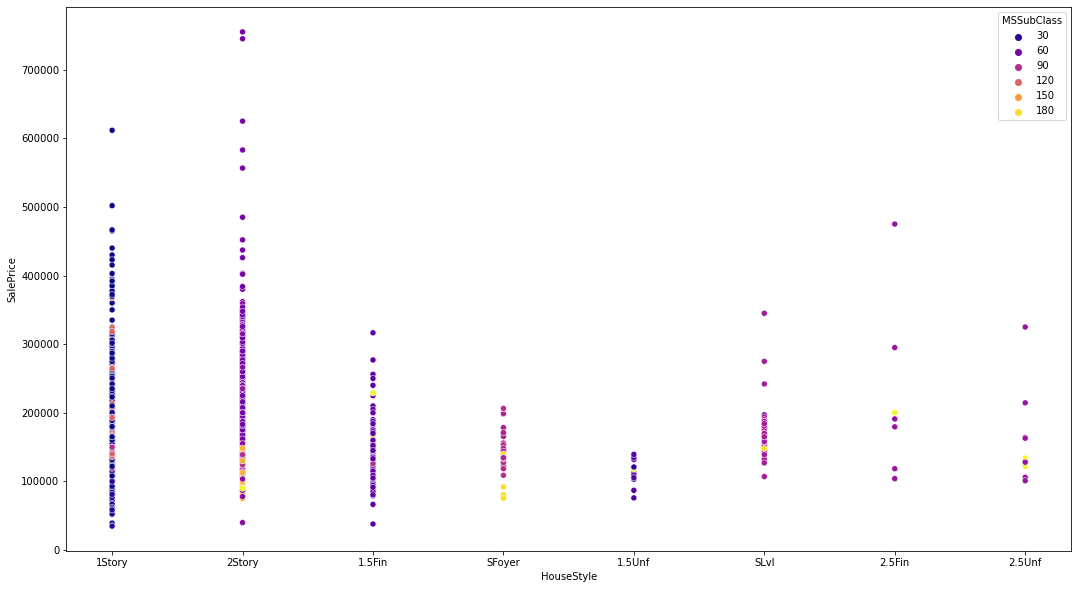

In [482]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="HouseStyle", y="SalePrice", hue='MSSubClass', data=data,palette='plasma')
plt.show()

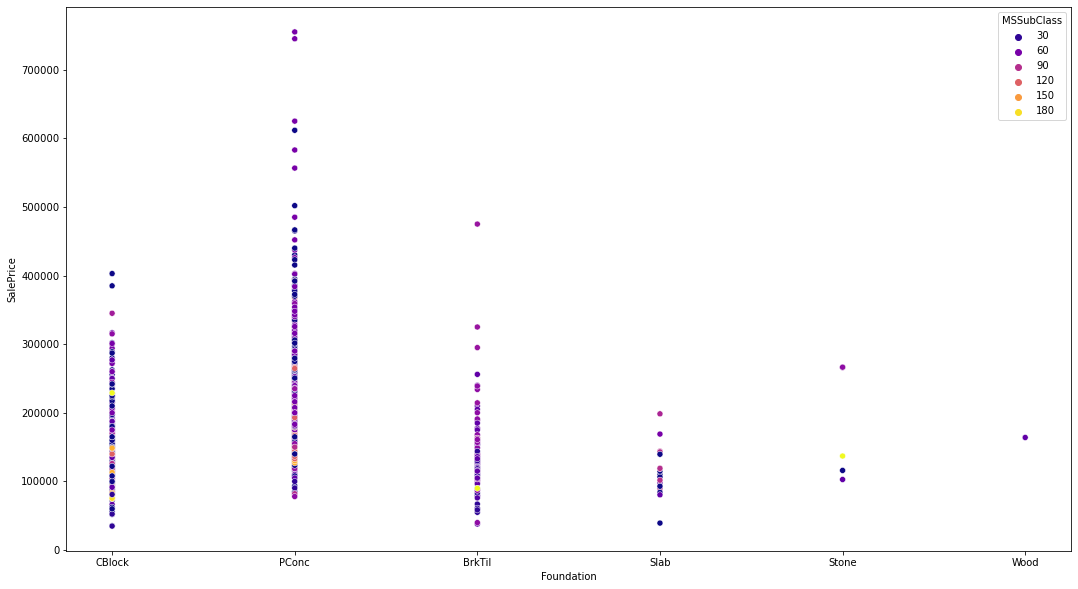

In [483]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="Foundation", y="SalePrice", hue='MSSubClass', data=data,palette='plasma')
plt.show()

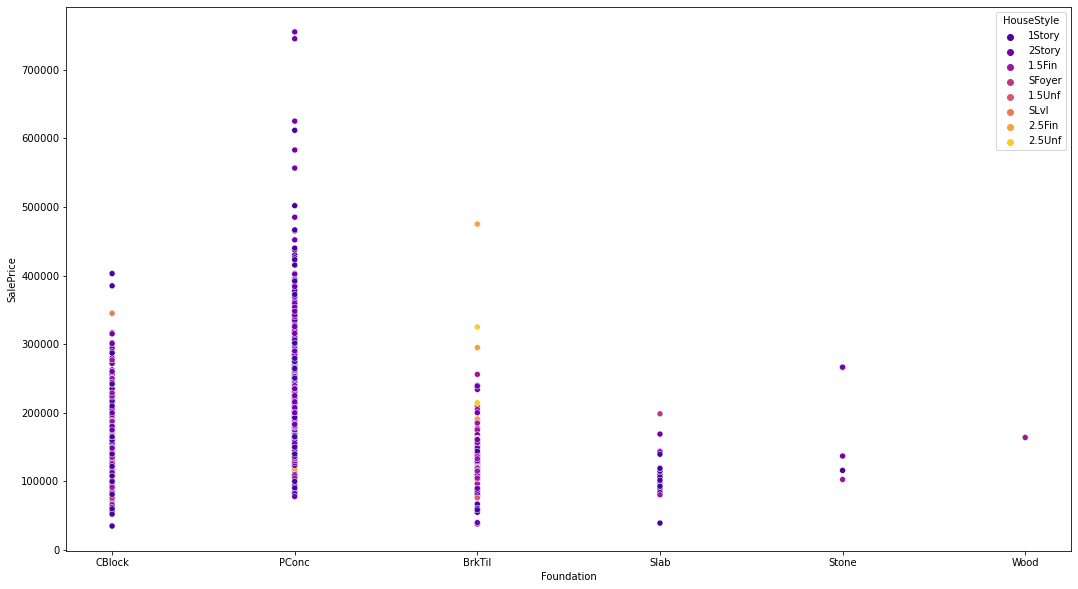

In [484]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="Foundation", y="SalePrice", hue='HouseStyle', data=data,palette='plasma')
plt.show()

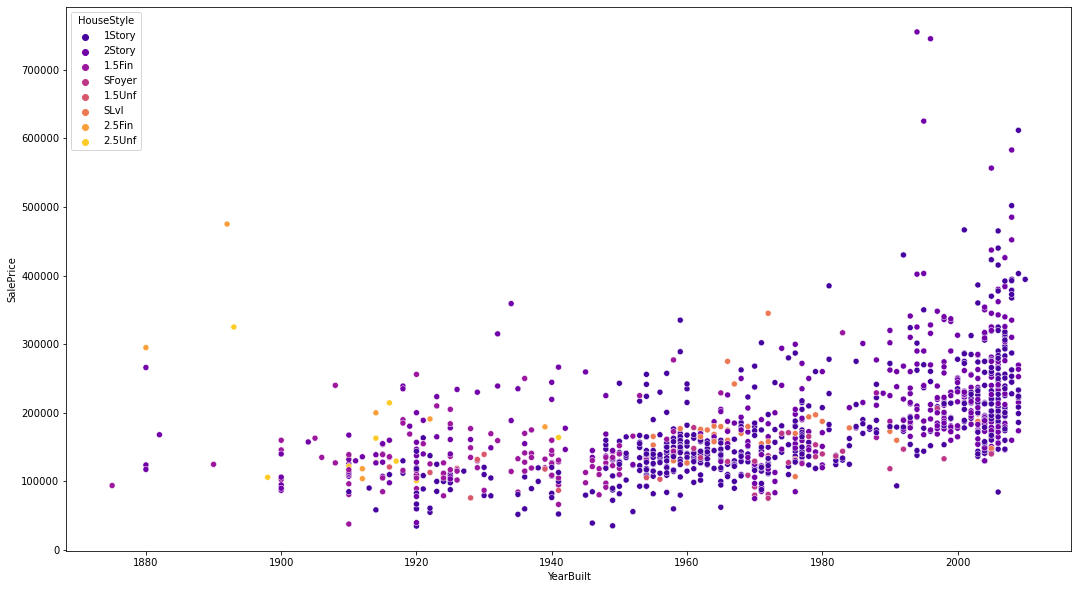

In [485]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="YearBuilt", y="SalePrice", hue='HouseStyle', data=data,palette='plasma')
plt.show()

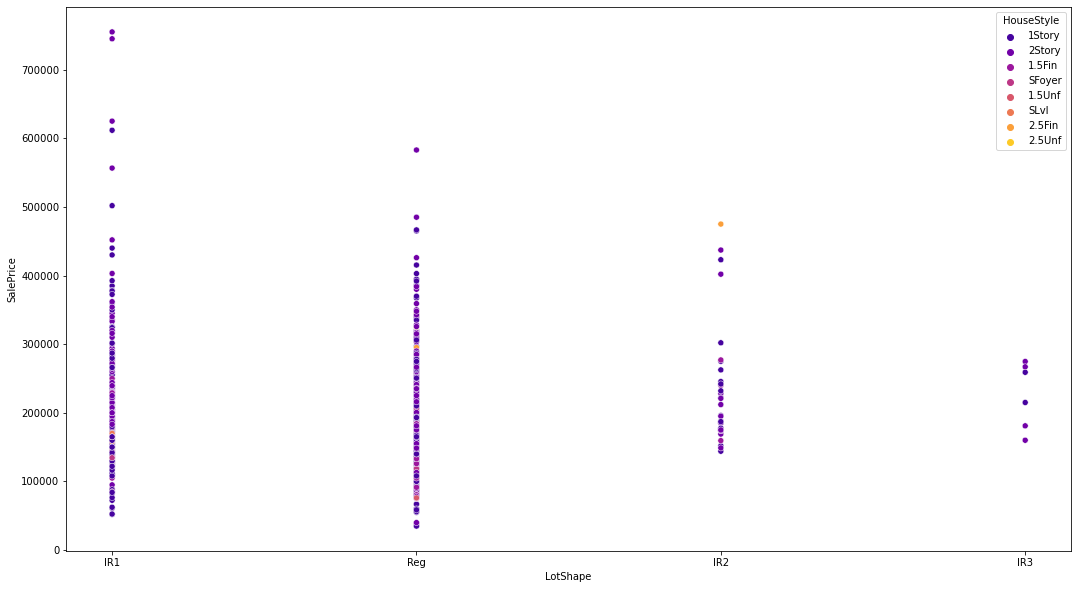

In [486]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="LotShape", y="SalePrice", hue='HouseStyle', data=data,palette='plasma')
plt.show()

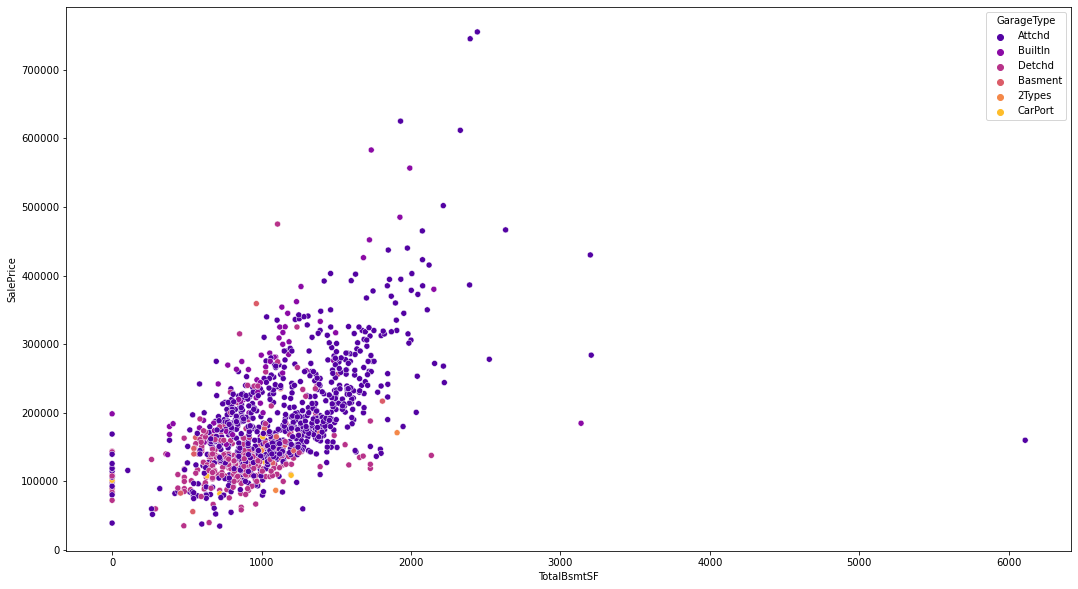

In [487]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", hue='GarageType', data=data,palette='plasma')
plt.show()

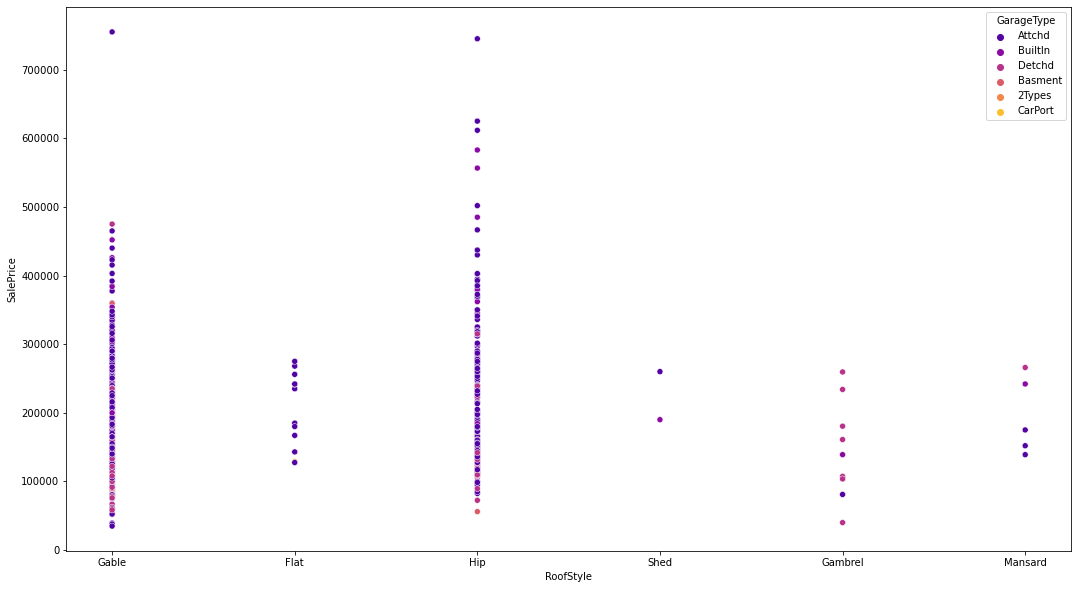

In [488]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="RoofStyle", y="SalePrice", hue='GarageType', data=data,palette='plasma')
plt.show()

### Observation-5

From the above results we can conclude that:

1) Most of the columns are making positive correlation with the target variable excluding kitchenAbvGr, EnclodesPorch, OverallCond, YrSold, LowQualfinSF and MiscVal.
    MiscVal, bsmtHalfBath and BsmtFinSF2 columns have zero correlation with target variable.
    
    OverallQual, GrLivArea, Garagecars, TotalBSmtSf and 1stFlrsf columns making highly positive correlation with sale_price target column, which can be considered as a strong bond, means if any of these column increases, sale price is also increases.
    
2) The house price is higher in 2-STORY 1946 & NEWER and 1-STORY 1946 & NEWER ALL STYLES type MSsubclass.
3) The price is average in 2-STORY 1945 & OLDER, 2-1/2 STORY ALL AGES, SPLIT OR MULTI-LEVEL, SPLIT FOYER, DUPLEX - ALL STYLES AND AGES type MSsubclass.
4) House price are very less in PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, 1-1/2 STORY - UNFINISHED ALL AGES type MSsubclass.

5) House prices are very high in gentle slpoe, avg in moderate and less in severe slope. 

6) House price are very high in Slightly irregular lotshape, average in regular and Moderately Irregular and very less in Irregular.

7) House price are very high when we talk about 2 story and 1 story house and avg.-less in rest house type.

8) House prices are high when the houses are built with gable and hip style and very less when it is built with flat, shed, gambrel and mansaed type.

9) House prices are very high when we make the foundation with poured contrete, avg in Cinder block & Brick-Tile and less in stone, slab and wood.

10) When the GarageArea is increasing simultaneously Sale price of house is increasing, means both are directly praportional to each other.

11) House prices are high when the quality of kitchen is Excellent and good.

12) When we see the relation between year built and saleprice, We foun that most of the houses are started to built from 1920 but initially the prices was less but we see the price pattern it started to raise from 1990.

13) Totalbasment surface and the total price are directly praportional to each other, if one increases another will also increases.


## Checking Outliers

In [490]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    68.975171   10484.749144     6.104452     5.595890   
std      41.940650    22.836520    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    64.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1979.717466   
std        0.817229      0.216292      1.598484     0.650575    25.012983   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1984.500000   
75%        3.000000      1.000000      7.000000     1.000000  2003.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

MSSubClass         AxesSubplot(0.125,0.657941;0.227941x0.222059)
LotFrontage     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
LotArea         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
OverallQual        AxesSubplot(0.125,0.391471;0.227941x0.222059)
OverallCond     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
YearBuilt       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
YearRemodAdd          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

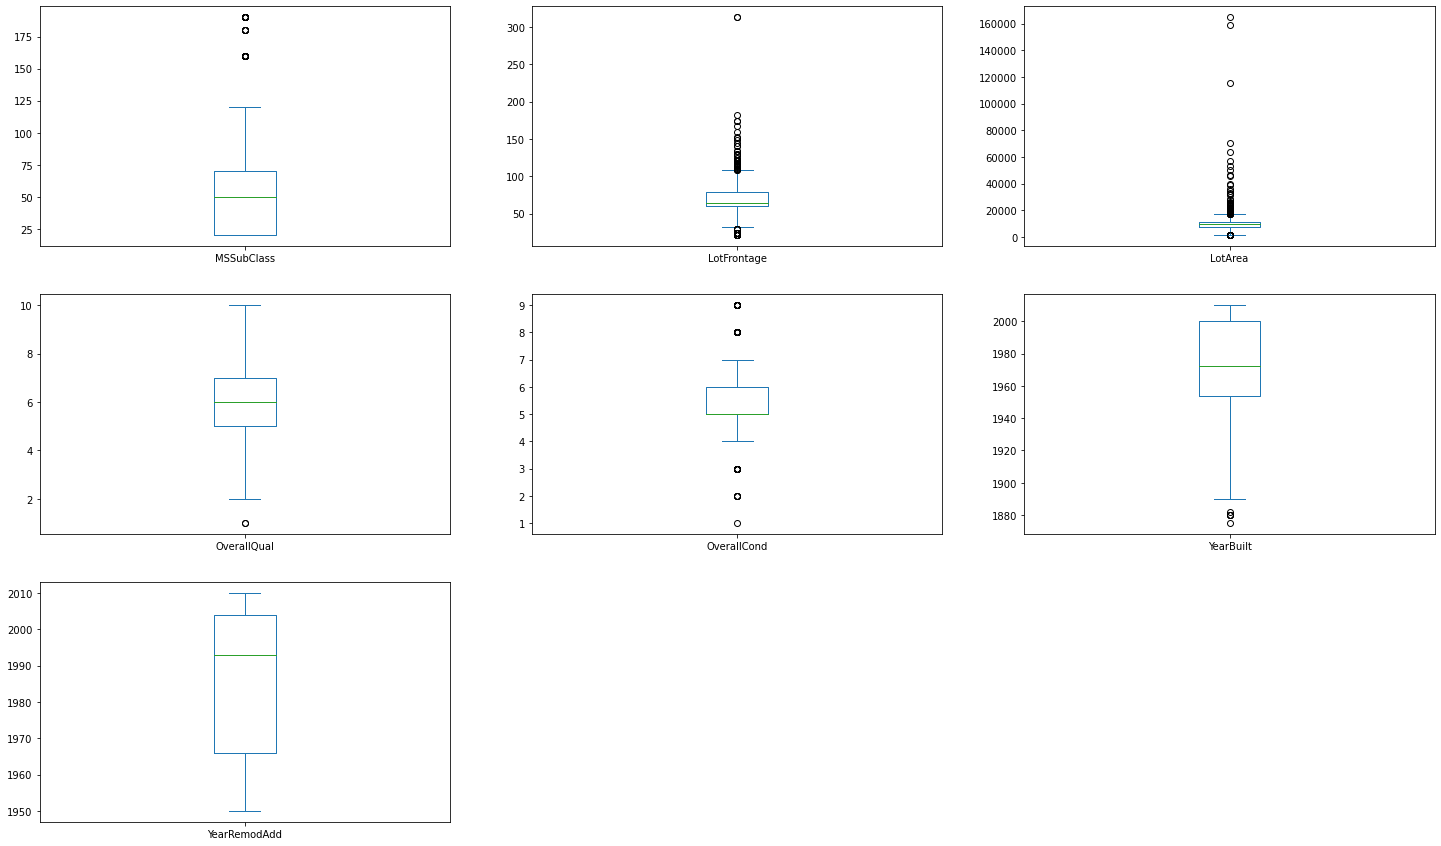

In [491]:
data.iloc[:,0:20].plot(kind='box',subplots=True,figsize=[25,15],layout=(3,3))

MasVnrArea        AxesSubplot(0.125,0.657941;0.227941x0.222059)
BsmtFinSF1     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BsmtFinSF2     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
BsmtUnfSF         AxesSubplot(0.125,0.391471;0.227941x0.222059)
TotalBsmtSF    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

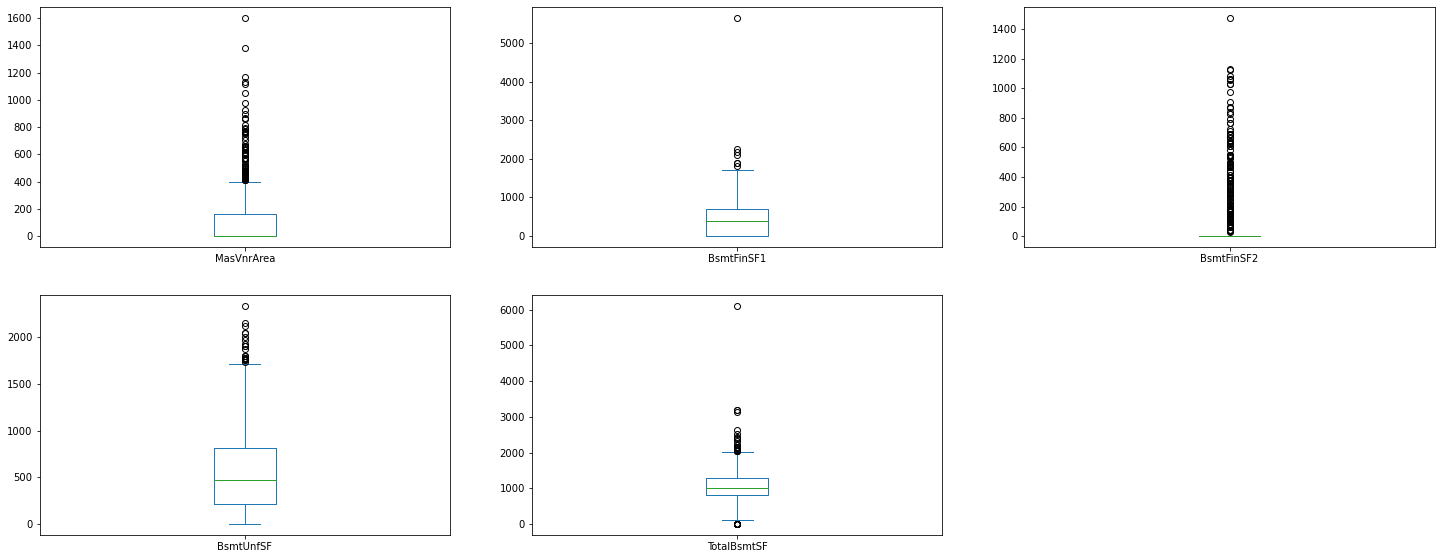

In [492]:
data.iloc[:,20:40].plot(kind='box',subplots=True,figsize=[25,15],layout=(3,3))

1stFlrSF           AxesSubplot(0.125,0.749828;0.227941x0.130172)
2ndFlrSF        AxesSubplot(0.398529,0.749828;0.227941x0.130172)
LowQualFinSF    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
GrLivArea          AxesSubplot(0.125,0.593621;0.227941x0.130172)
BsmtFullBath    AxesSubplot(0.398529,0.593621;0.227941x0.130172)
BsmtHalfBath    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
FullBath           AxesSubplot(0.125,0.437414;0.227941x0.130172)
HalfBath        AxesSubplot(0.398529,0.437414;0.227941x0.130172)
BedroomAbvGr    AxesSubplot(0.672059,0.437414;0.227941x0.130172)
dtype: object

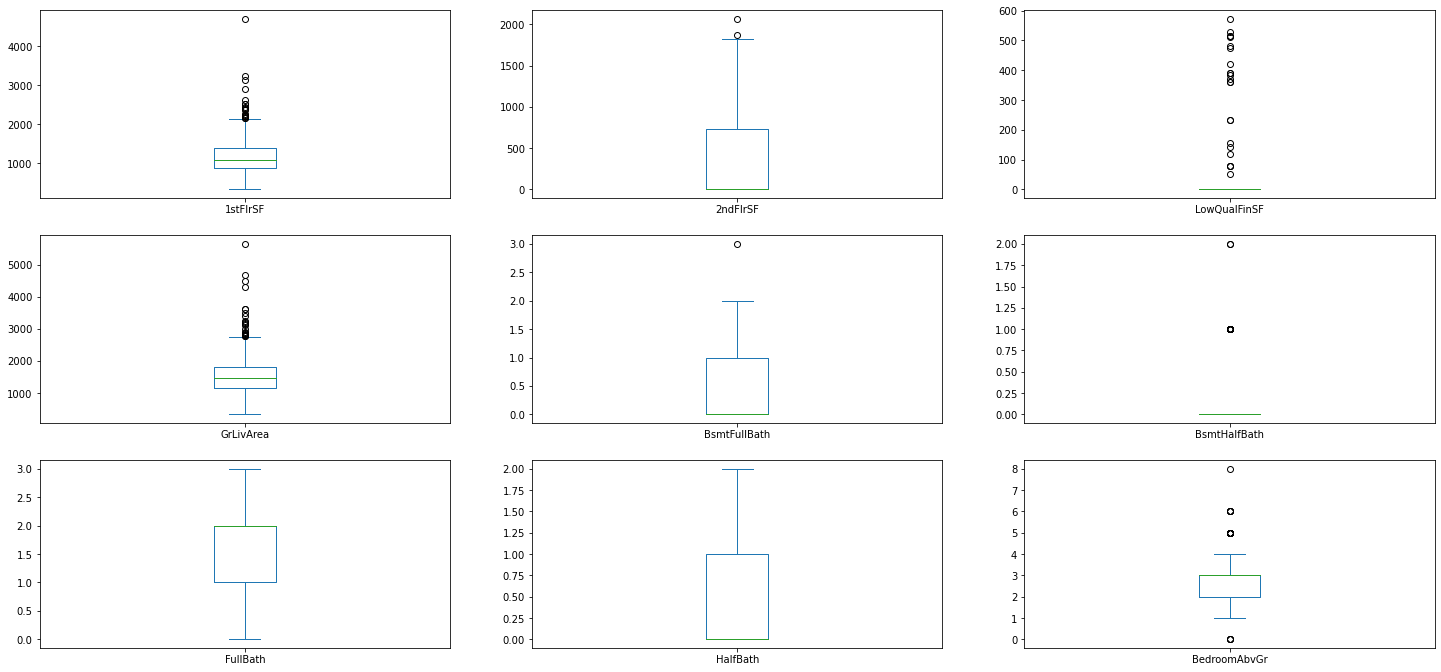

In [493]:
data.iloc[:,40:50].plot(kind='box',subplots=True,figsize=[25,20],layout=(5,3))

KitchenAbvGr       AxesSubplot(0.125,0.749828;0.227941x0.130172)
TotRmsAbvGrd    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Fireplaces      AxesSubplot(0.672059,0.749828;0.227941x0.130172)
GarageYrBlt        AxesSubplot(0.125,0.593621;0.227941x0.130172)
GarageCars      AxesSubplot(0.398529,0.593621;0.227941x0.130172)
dtype: object

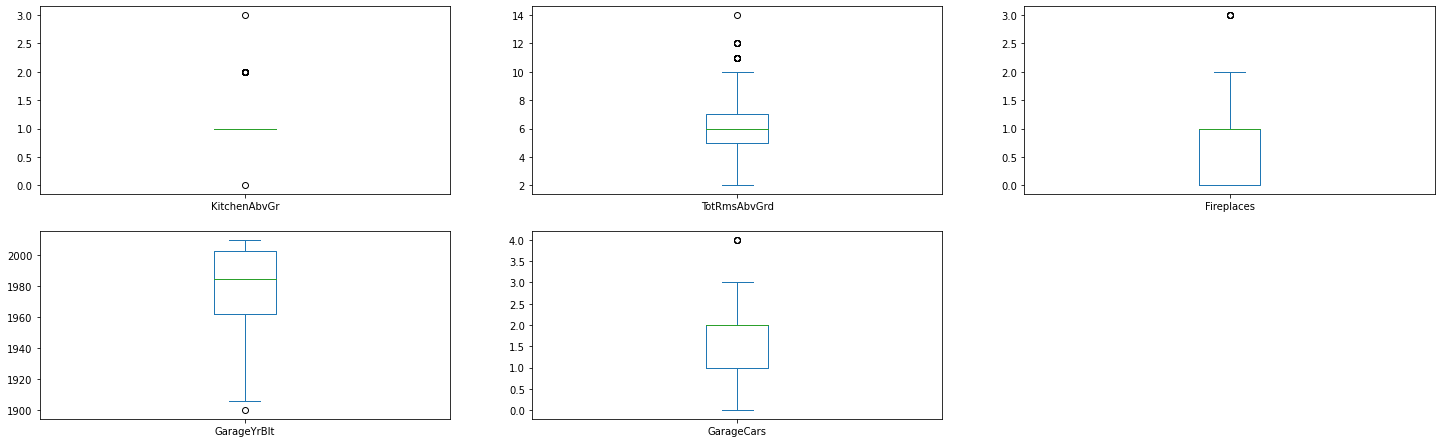

In [494]:
data.iloc[:,50:60].plot(kind='box',subplots=True,figsize=[25,20],layout=(5,3))

GarageArea          AxesSubplot(0.125,0.749828;0.227941x0.130172)
WoodDeckSF       AxesSubplot(0.398529,0.749828;0.227941x0.130172)
OpenPorchSF      AxesSubplot(0.672059,0.749828;0.227941x0.130172)
EnclosedPorch       AxesSubplot(0.125,0.593621;0.227941x0.130172)
3SsnPorch        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
ScreenPorch      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
PoolArea            AxesSubplot(0.125,0.437414;0.227941x0.130172)
MiscVal          AxesSubplot(0.398529,0.437414;0.227941x0.130172)
MoSold           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
YrSold              AxesSubplot(0.125,0.281207;0.227941x0.130172)
SalePrice        AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

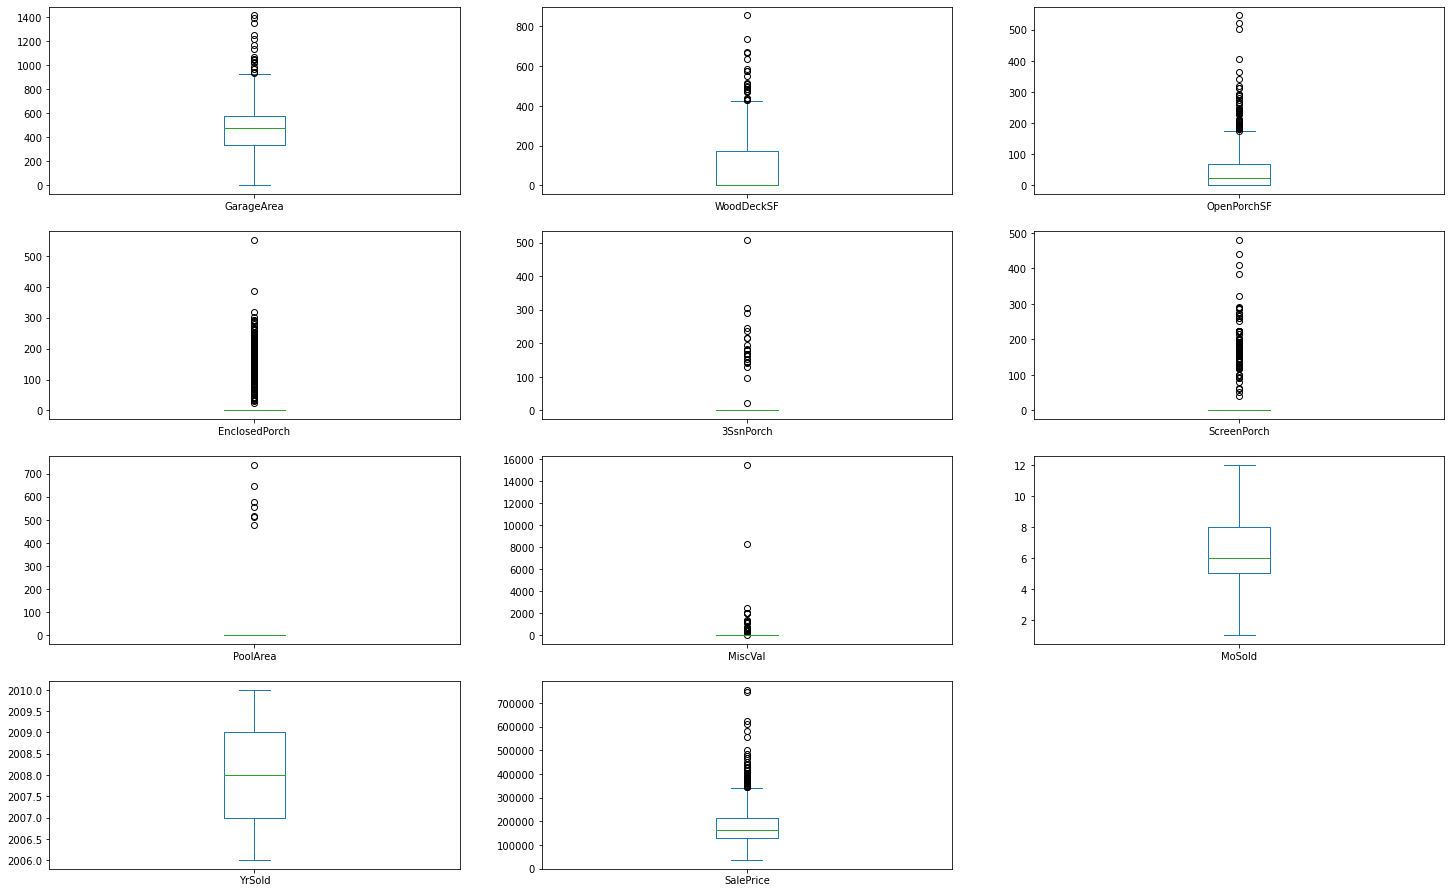

In [495]:
data.iloc[:,60:80].plot(kind='box',subplots=True,figsize=[25,20],layout=(5,3))

In [496]:
### Observation-6

## Checkimg Skewness

In [497]:
from scipy.stats import skew

In [498]:
data.skew()

MSSubClass        1.422019
LotFrontage       2.815783
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

MSSubClass
1.4201921132510307


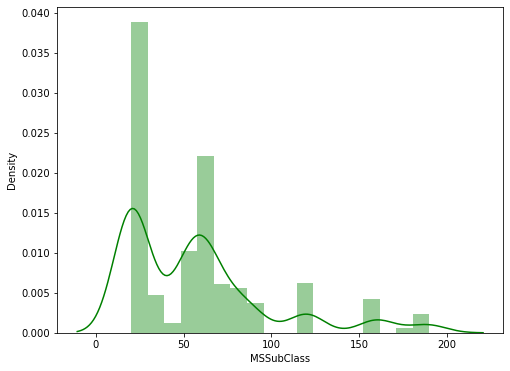

LotArea
10.645590512293165


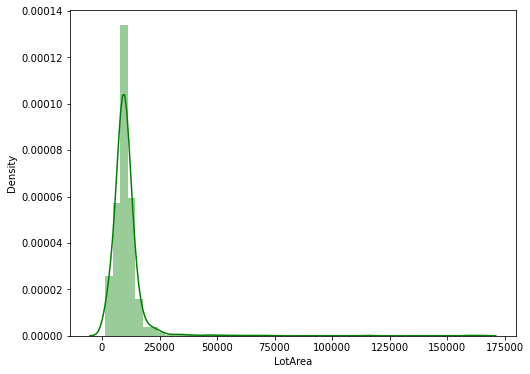

OverallQual
0.1748575699247338


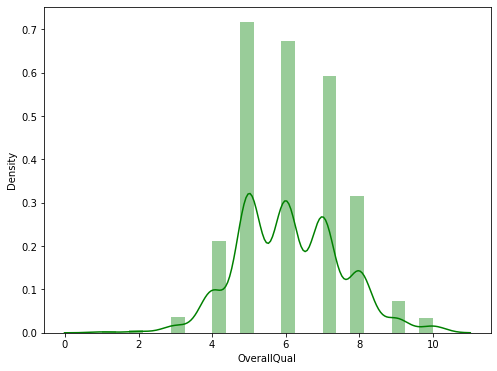

OverallCond
0.5799679194063724


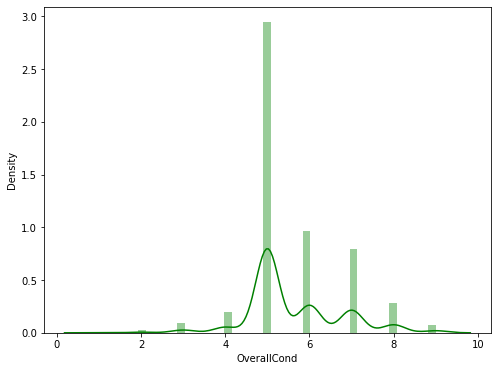

YearBuilt
-0.5784593969460211


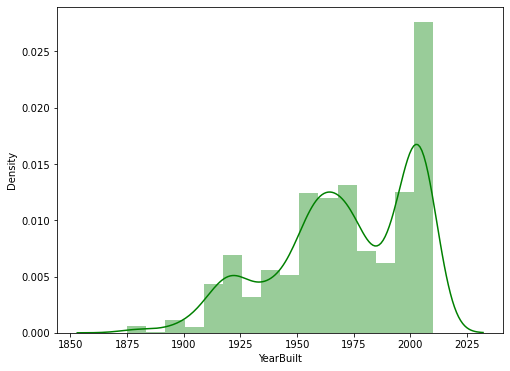

YearRemodAdd
-0.4952264998621046


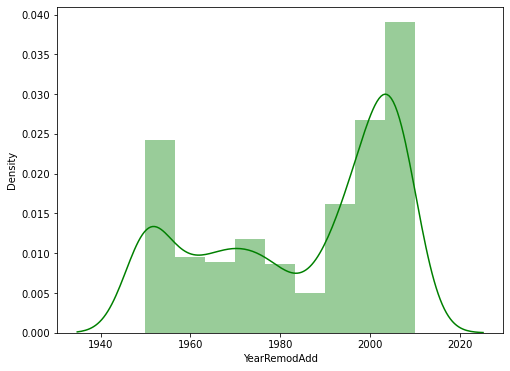

BsmtFinSF1
1.8692014713220562


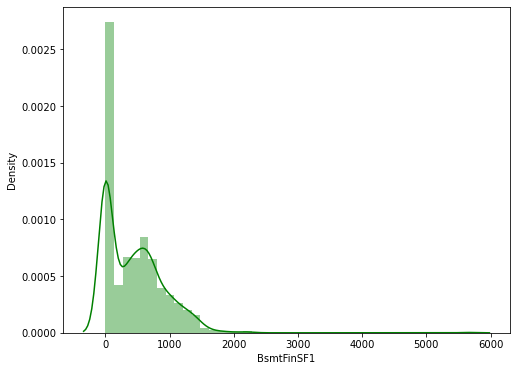

BsmtFinSF2
4.360220343887485


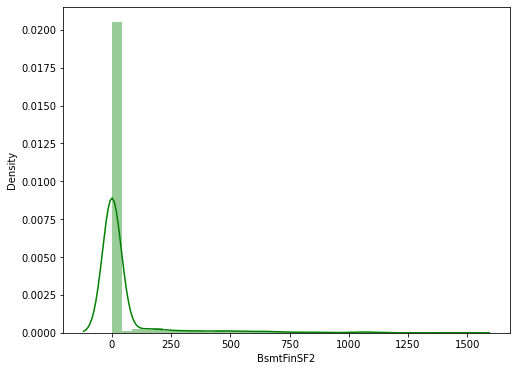

BsmtUnfSF
0.9078892504496788


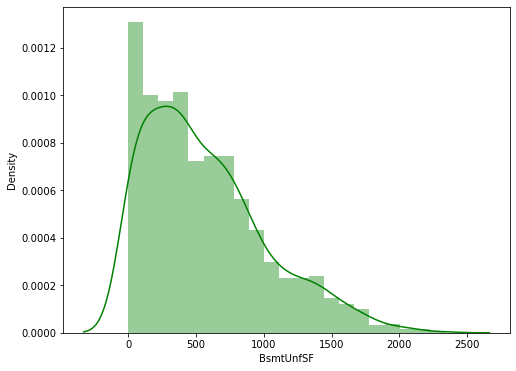

TotalBsmtSF
1.7423496009331978


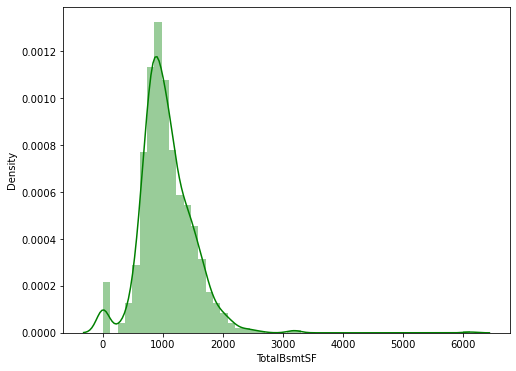

1stFlrSF
1.5117625659117986


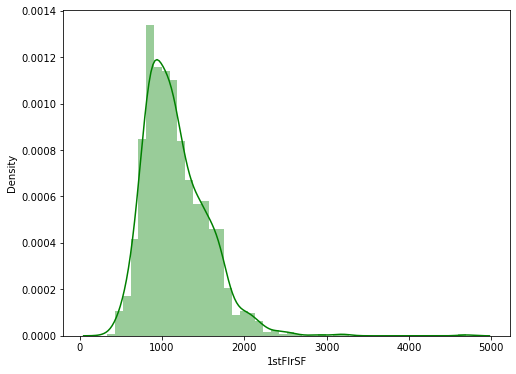

2ndFlrSF
0.822420583412781


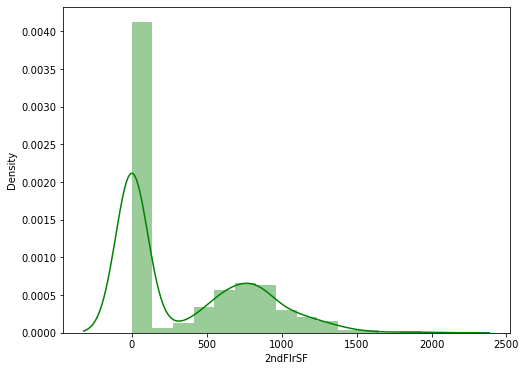

LowQualFinSF
8.655008865824158


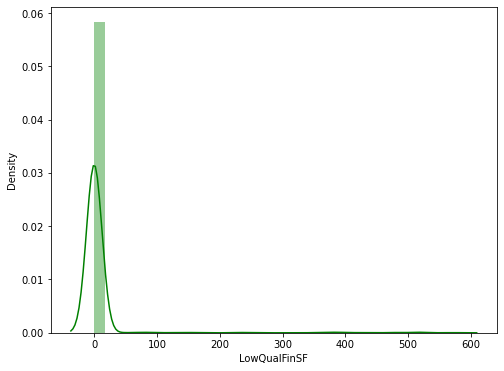

GrLivArea
1.4480887826713629


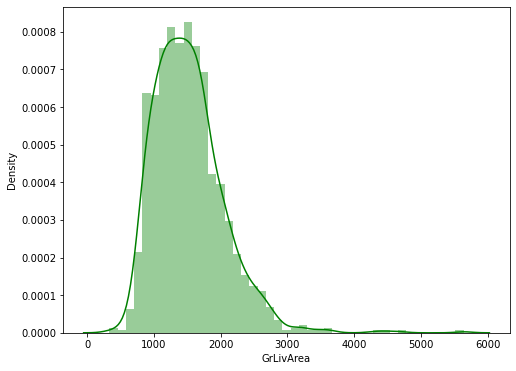

BsmtFullBath
0.6263002701493211


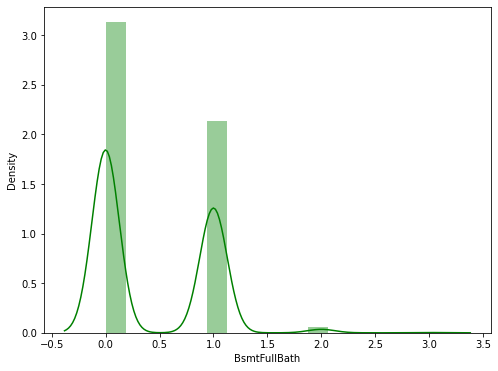

BsmtHalfBath
4.2589242613406135


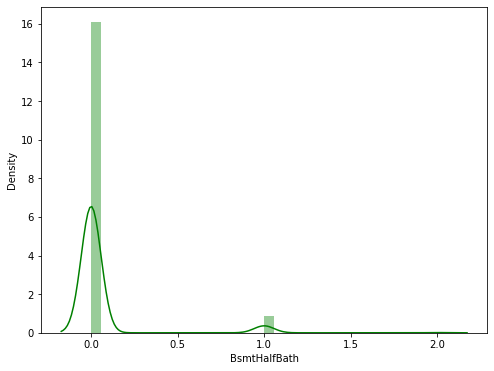

FullBath
0.057734441478522844


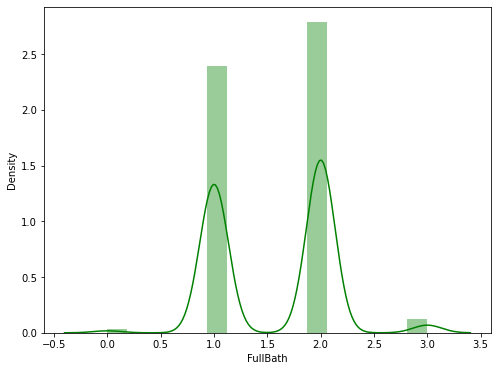

HalfBath
0.6556483531827046


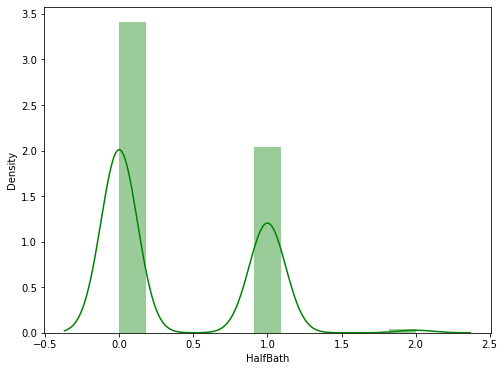

BedroomAbvGr
0.2435420124493511


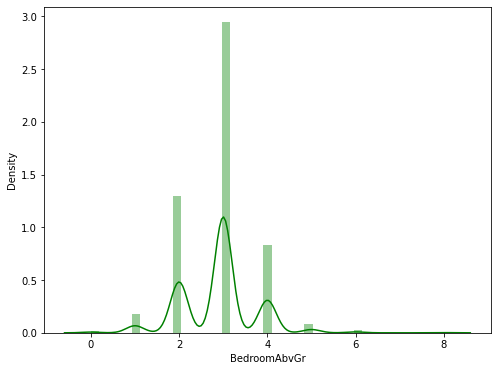

KitchenAbvGr
4.359650838249036


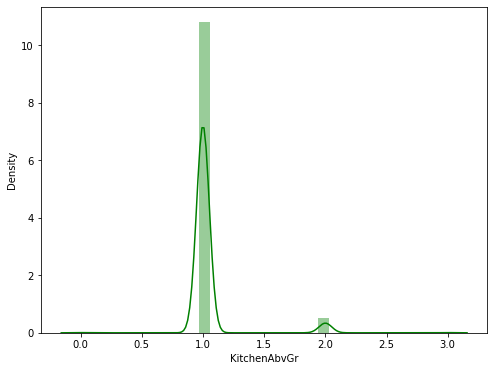

TotRmsAbvGrd
0.6438283891059581


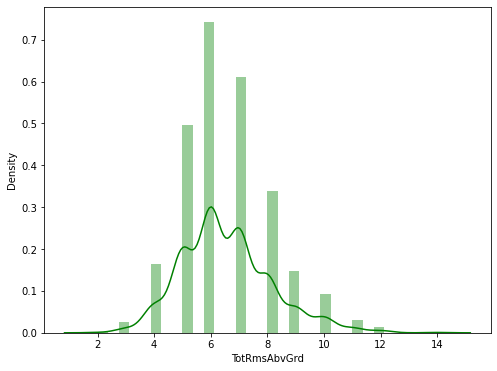

Fireplaces
0.6711023674119095


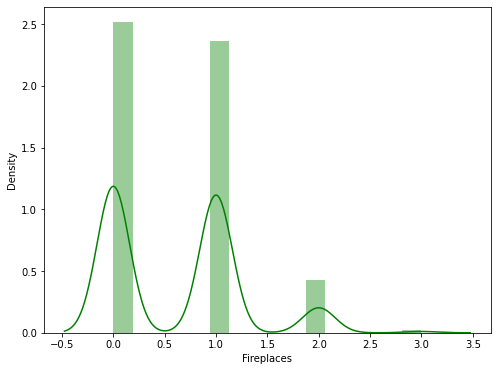

GarageCars
-0.35809517618866293


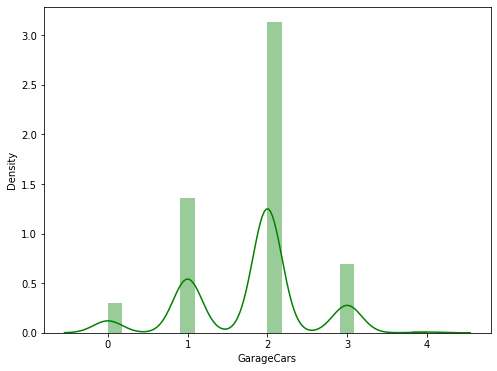

GarageArea
0.18942131185052696


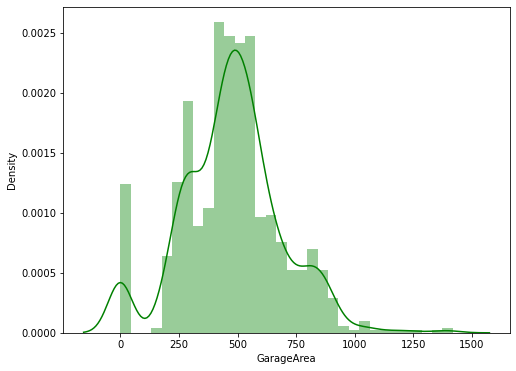

WoodDeckSF
1.5029958560866876


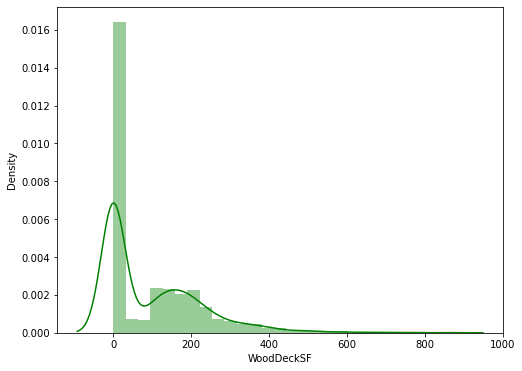

OpenPorchSF
2.4077425056637467


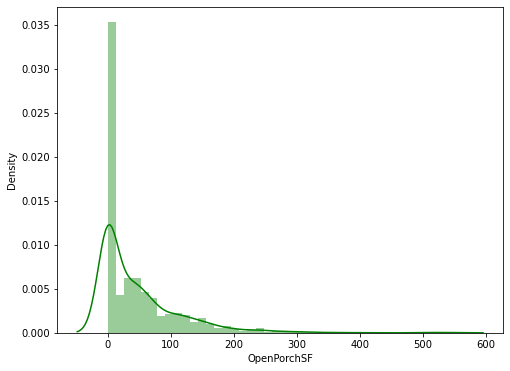

EnclosedPorch
3.0396996901666795


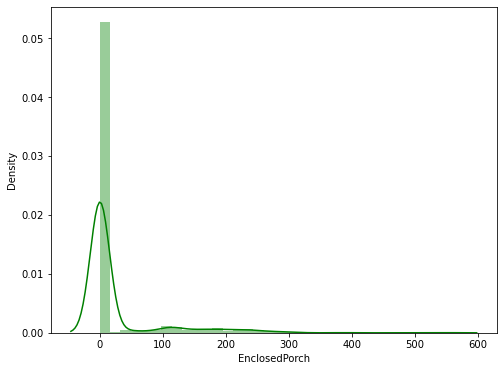

3SsnPorch
9.758058863808778


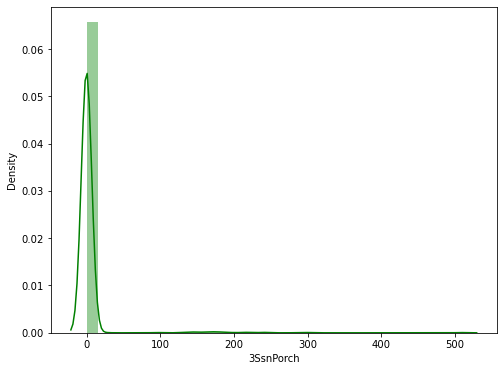

ScreenPorch
4.100466086071533


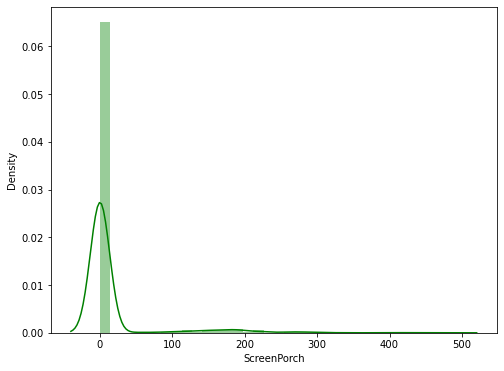

PoolArea
13.226696502248773


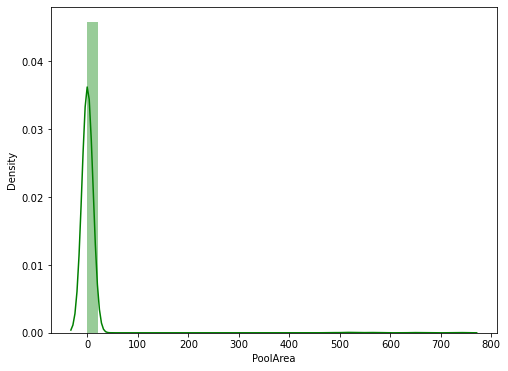

MiscVal
23.036309870855604


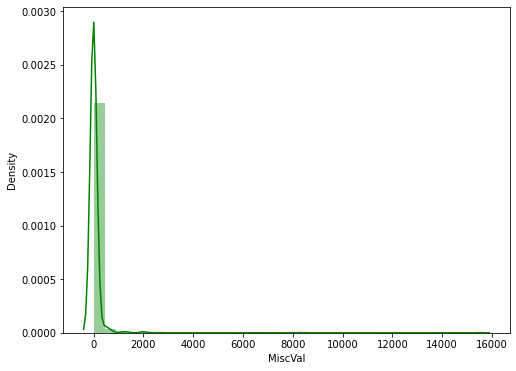

MoSold
0.22069473912487753


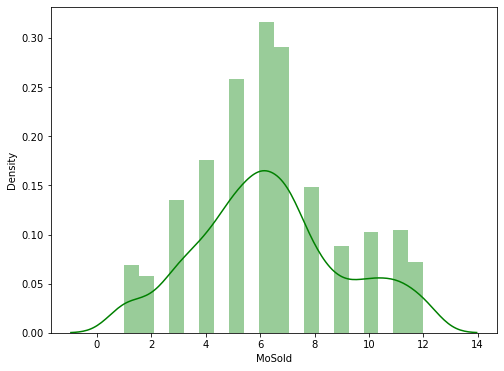

YrSold
0.11561598836544142


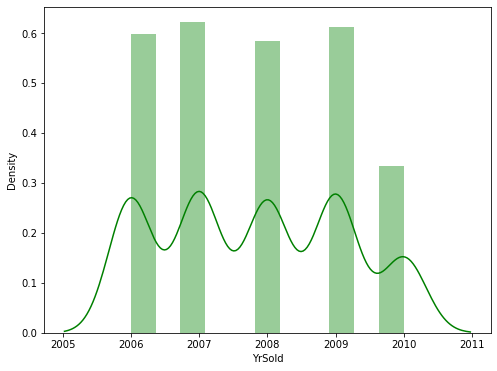

SalePrice
1.951367548938153


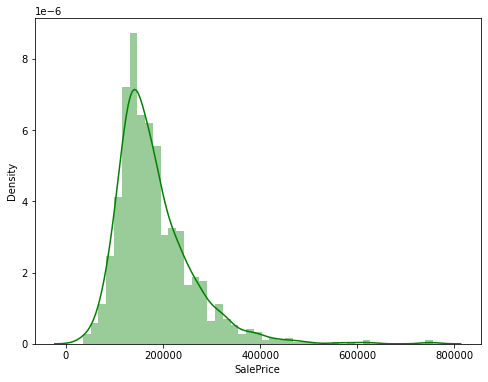

LotFrontage
2.8121658548392126


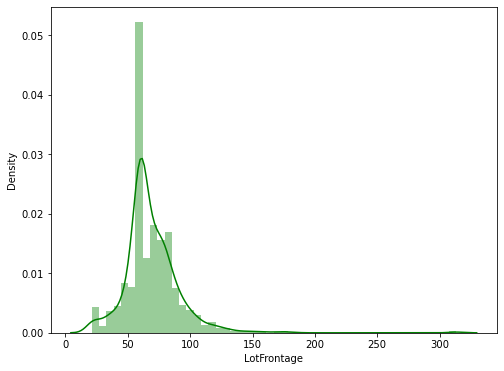

MasVnrArea
2.8320751196489975


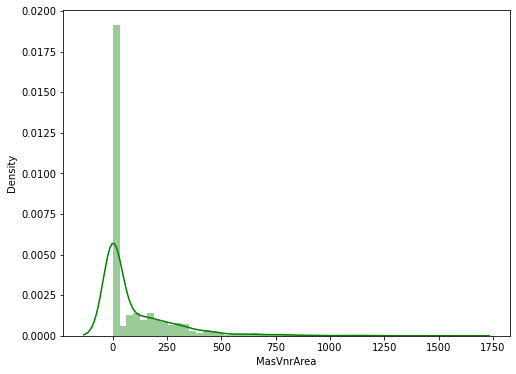

GarageYrBlt
-0.7071639590549501


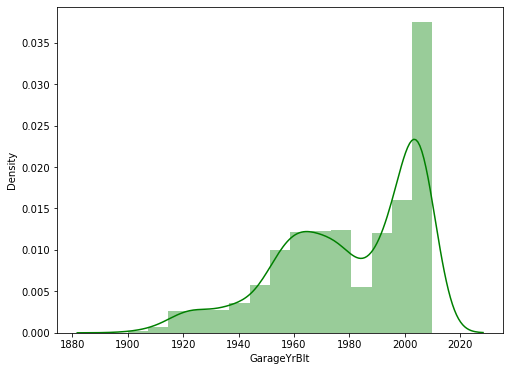

In [499]:
for i in ske_col:
    print(i)
    print(skew(data[i]))
    
    plt.figure(figsize=[8,6])
    sns.distplot(data[i],color='g')
    plt.show()

In [500]:
### Observation-7

In [503]:
x=data.iloc[:,0:-1]

In [504]:
y=data.iloc[:,-1]

In [505]:
col=x.columns

## Removing Outliers

In [508]:
from scipy.stats import zscore

In [518]:
tl=x[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [519]:
z=np.abs(zscore(tl))
z.shape

(1168, 36)

In [520]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    4,    7,   14,   20,   22,   23,   25,   27,   32,
         32,   32,   32,   33,   38,   40,   47,   48,   51,   51,   63,
         64,   66,   66,   68,   68,   72,   72,   73,   74,   76,   77,
         91,   93,   93,   94,   95,   96,   97,   98,   98,  103,  103,
        103,  103,  103,  103,  106,  106,  107,  112,  113,  115,  119,
        119,  119,  119,  120,  127,  127,  133,  133,  138,  138,  140,
        141,  141,  141,  141,  141,  141,  141,  142,  142,  143,  146,
        150,  151,  152,  153,  156,  156,  157,  162,  164,  166,  170,
        178,  178,  184,  187,  191,  192,  192,  192,  192,  195,  196,
        196,  205,  206,  210,  210,  211,  211,  212,  214,  216,  219,
        226,  228,  232,  232,  232,  237,  241,  241,  241,  243,  245,
        245,  253,  254,  255,  257,  259,  269,  272,  273,  284,  284,
        289,  290,  299,  299,  301,  303,  304,  305,  305,  305,  305,
        305,  308,  309,  310,  310,  312,  313,  

In [521]:
x=x[(z<3).all(axis=1)]

In [522]:
y=y[(z<3).all(axis=1)]

In [523]:
x.shape

(807, 78)

In [524]:
y.shape

(807,)

## Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [528]:
cl=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

In [529]:
le=LabelEncoder()

In [531]:
for i in cl:
    x[i]=le.fit_transform(x[i])

In [533]:
x.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0         120         3         60.0     4928       1      0         0   
2          60         3         92.0     9920       1      0         0   
3          20         3        105.0    11751       1      0         0   
5          60         3         58.0    14054       1      0         0   
6          20         3         60.0    11341       1      0         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           1   
2            3          1          0            15           2           1   
3            3          4          0            14           2           1   
5            3          4          0             8           2           1   
6            3          4          0            19           2           1   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
2         0           4            7            5       1996          1997   
3         0           2            6            6       1977          1977   
5         0           4            7            5       2006          2006   
6         0           2            5            6       1957          1996   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         0            7            8           2         0.0   
2          1         0            6            6           2         0.0   
3          3         0            7            8           1       480.0   
5          1         0            9           11           2         0.0   
6          3         0           10           12           1       180.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          2           1         2         2             3   
2          2          2           2         2         2             0   
3          3          2           1         2         2             3   
5          2          2           2         2         2             0   
6          3          2           1         2         2             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             5           0        958         1078   
2             2         862             5           0        255         1117   
3             1         705             5           0       1139         1844   
5             5           0             5           0        879          879   
6             0        1302             5           0         90         1392   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          3           1           2       958         0   
2        1          0           1           2      1127       886   
3        1          0           1           2      1844         0   
5        1          0           1           2       879       984   
6        1          3           1           2      1392         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
5             0       1863             0             0         2         1   
6             0       1392             1             0         1         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           5   
2             3             1            3             8           5   
3             3             1            3             7           5   
5             4             1            2             9         

## Removing Skewness

In [534]:
from sklearn.preprocessing import power_transform

In [537]:
x.skew()

MSSubClass        1.397170
MSZoning         -1.710000
LotFrontage       0.306207
LotArea           0.578342
Street          -20.049845
                   ...    
MiscVal           8.121298
MoSold            0.270477
YrSold            0.117078
SaleType         -3.890507
SaleCondition    -2.831565
Length: 78, dtype: float64

In [539]:
x=power_transform(x,method='yeo-johnson')

In [540]:
x=pd.DataFrame(x,columns=col)

In [542]:
x.skew()

MSSubClass        0.100608
MSZoning          0.187434
LotFrontage       0.084715
LotArea           0.084193
Street          -20.049845
                   ...    
MiscVal           5.965528
MoSold           -0.027350
YrSold            0.114176
SaleType         -2.020723
SaleCondition    -0.267409
Length: 78, dtype: float64

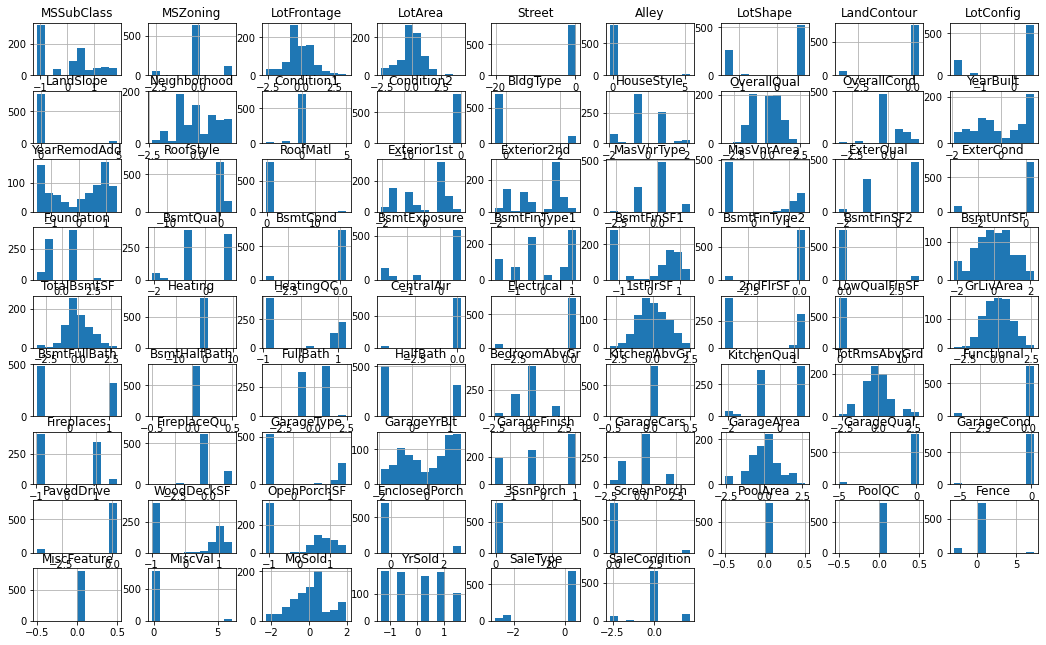

In [548]:
x.hist(figsize=[18,11])
plt.show()

## Sacling tha dataset

In [549]:
from sklearn.preprocessing import MinMaxScaler

In [550]:
mm=MinMaxScaler()

In [552]:
x=mm.fit_transform(x)

In [553]:
x=pd.DataFrame(x,columns=col)

## Variance inflation factor(VIF)

In [560]:
import statsmodels.api as si
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [561]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [568]:
vif(x.iloc[:,0:60])

Variables   VIF Factor
0     MSSubClass    15.944051
1       MSZoning    15.662889
2    LotFrontage    17.116682
3        LotArea    20.161827
4         Street   452.776662
5          Alley     1.620551
6       LotShape     3.937087
7    LandContour    17.468559
8      LotConfig     4.936469
9      LandSlope     1.482635
10  Neighborhood     8.768553
11    Condition1    21.644192
12    Condition2   271.167546
13      BldgType     5.646101
14    HouseStyle    14.065563
15   OverallQual    47.286491
16   OverallCond    22.964132
17     YearBuilt    55.894888
18  YearRemodAdd    11.610617
19     RoofStyle   212.227845
20      RoofMatl     1.191750
21   Exterior1st    25.539945
22   Exterior2nd    25.537033
23    MasVnrType    14.335007
24    MasVnrArea     3.283710
25     ExterQual    18.587892
26     ExterCond    12.405466
27    Foundation    12.315948
28      BsmtQual    15.176155
29      BsmtCond    15.162711
30  BsmtExposure     6.540207
31  BsmtFinType1    11.610557
32    BsmtFinSF1    21.336089
33  BsmtFinType2  1633.198441
34    BsmtFinSF2   124.543153
35     BsmtUnfSF    36.697527
36   TotalBsmtSF   104.607619
37       Heating   379.693509
38     HeatingQC     3.704990
39    CentralAir    31.232835
40    Electrical    18.211377
41      1stFlrSF   189.082306
42      2ndFlrSF    46.392914
43  LowQualFinSF     1.225376
44     GrLivArea   374.911330
45  BsmtFullBath     3.698709
46  BsmtHalfBath          NaN
47      FullBath    55.431471
48      HalfBath     4.712790
49  BedroomAbvGr    19.171004
50  KitchenAbvGr          NaN
51   KitchenQual    13.803811
52  TotRmsAbvGrd    41.327838
53    Functional    21.146636
54    Fireplaces     3.397883
55   FireplaceQu    26.846746
56    GarageType     2.557414
57   GarageYrBlt    18.341819
58  GarageFinish     6.859838
59    GarageCars    15.346639

In [569]:
vif(x.iloc[:,60:80])

Variables  VIF Factor
0      GarageArea   10.244263
1      GarageQual   34.058737
2      GarageCond   38.326787
3      PavedDrive   16.202118
4      WoodDeckSF    2.173272
5     OpenPorchSF    2.683835
6   EnclosedPorch    1.244944
7       3SsnPorch    1.018211
8     ScreenPorch    1.058478
9        PoolArea         NaN
10         PoolQC         NaN
11          Fence    9.241275
12    MiscFeature         NaN
13        MiscVal    1.054017
14         MoSold    5.924937
15         YrSold    2.865977
16       SaleType    8.073834
17  SaleCondition    9.275828

In [570]:
x.drop(['BsmtFinType2'],axis=1,inplace=True)

In [571]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.938750
1       MSZoning   15.550392
2    LotFrontage   17.035768
3        LotArea   20.140583
4         Street  354.955238
5          Alley    1.620293
6       LotShape    3.950625
7    LandContour   17.463400
8      LotConfig    4.904501
9      LandSlope    1.472710
10  Neighborhood    8.767671
11    Condition1   20.497589
12    Condition2  230.023350
13      BldgType    5.627038
14    HouseStyle   14.055566
15   OverallQual   47.225003
16   OverallCond   22.669000
17     YearBuilt   55.847392
18  YearRemodAdd   11.597476
19     RoofStyle  183.688645
20      RoofMatl    1.185695
21   Exterior1st   25.553219
22   Exterior2nd   25.448412
23    MasVnrType   14.003120
24    MasVnrArea    3.284055
25     ExterQual   18.495859
26     ExterCond   12.447994
27    Foundation   12.328445
28      BsmtQual   15.120255
29      BsmtCond   15.166959
30  BsmtExposure    6.563175
31  BsmtFinType1   11.317670
32    BsmtFinSF1   21.112188
33    BsmtFinSF2    1.388143
34     BsmtUnfSF   36.722734
35   TotalBsmtSF  104.613261
36       Heating  286.909635
37     HeatingQC    3.678393
38    CentralAir   31.131300
39    Electrical   18.116022
40      1stFlrSF  188.579315
41      2ndFlrSF   46.387941
42  LowQualFinSF    1.221496
43     GrLivArea  375.729078
44  BsmtFullBath    3.696272
45  BsmtHalfBath         NaN
46      FullBath   55.025761
47      HalfBath    4.712265
48  BedroomAbvGr   19.359901
49  KitchenAbvGr         NaN
50   KitchenQual   13.679694
51  TotRmsAbvGrd   41.059097
52    Functional   20.344781
53    Fireplaces    3.397388
54   FireplaceQu   26.473473
55    GarageType    2.596850
56   GarageYrBlt   18.256392
57  GarageFinish    6.715156
58    GarageCars   35.383068
59    GarageArea   42.558248

In [573]:
x.drop(['GrLivArea'],axis=1,inplace=True)

In [574]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.466550
1       MSZoning   15.611630
2    LotFrontage   17.042164
3        LotArea   20.131238
4         Street  355.669117
5          Alley    1.620259
6       LotShape    3.959969
7    LandContour   17.470952
8      LotConfig    4.910079
9      LandSlope    1.471149
10  Neighborhood    8.771970
11    Condition1   20.424271
12    Condition2  230.060914
13      BldgType    5.525878
14    HouseStyle   12.461054
15   OverallQual   46.864338
16   OverallCond   22.658662
17     YearBuilt   56.199592
18  YearRemodAdd   11.663171
19     RoofStyle  185.011647
20      RoofMatl    1.186980
21   Exterior1st   25.497518
22   Exterior2nd   25.378763
23    MasVnrType   13.924084
24    MasVnrArea    3.288003
25     ExterQual   18.483279
26     ExterCond   12.517420
27    Foundation   12.301713
28      BsmtQual   15.289900
29      BsmtCond   15.129238
30  BsmtExposure    6.555963
31  BsmtFinType1   11.370343
32    BsmtFinSF1   21.233001
33    BsmtFinSF2    1.387066
34     BsmtUnfSF   36.713848
35   TotalBsmtSF  103.894906
36       Heating  287.461020
37     HeatingQC    3.698746
38    CentralAir   31.435680
39    Electrical   18.008702
40      1stFlrSF   69.428533
41      2ndFlrSF   16.298869
42  LowQualFinSF    1.204556
43  BsmtFullBath    3.696386
44  BsmtHalfBath         NaN
45      FullBath   52.935510
46      HalfBath    4.608083
47  BedroomAbvGr   18.840144
48  KitchenAbvGr         NaN
49   KitchenQual   13.591842
50  TotRmsAbvGrd   39.686344
51    Functional   20.201087
52    Fireplaces    3.352783
53   FireplaceQu   26.470086
54    GarageType    2.584848
55   GarageYrBlt   18.692043
56  GarageFinish    6.685740
57    GarageCars   35.405800
58    GarageArea   42.486597
59    GarageQual   31.784525

In [576]:
x.drop(['Street'],axis=1,inplace=True)

In [577]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.370955
1       MSZoning   15.009406
2    LotFrontage   17.049524
3        LotArea   20.114504
4          Alley    1.618992
5       LotShape    3.956707
6    LandContour   17.475263
7      LotConfig    4.909439
8      LandSlope    1.468793
9   Neighborhood    8.757414
10    Condition1   20.169301
11    Condition2  216.301652
12      BldgType    5.475148
13    HouseStyle   12.505393
14   OverallQual   46.865388
15   OverallCond   22.664455
16     YearBuilt   56.147520
17  YearRemodAdd   11.688371
18     RoofStyle  180.844675
19      RoofMatl    1.184284
20   Exterior1st   25.524431
21   Exterior2nd   25.379409
22    MasVnrType   13.844552
23    MasVnrArea    3.287239
24     ExterQual   18.283126
25     ExterCond   12.319256
26    Foundation   12.280763
27      BsmtQual   15.333878
28      BsmtCond   15.229948
29  BsmtExposure    6.513712
30  BsmtFinType1   11.318018
31    BsmtFinSF1   21.047834
32    BsmtFinSF2    1.391049
33     BsmtUnfSF   36.360597
34   TotalBsmtSF  103.841277
35       Heating  259.365700
36     HeatingQC    3.728438
37    CentralAir   31.291996
38    Electrical   17.751961
39      1stFlrSF   69.476770
40      2ndFlrSF   16.264905
41  LowQualFinSF    1.203327
42  BsmtFullBath    3.699469
43  BsmtHalfBath         NaN
44      FullBath   52.476276
45      HalfBath    4.606211
46  BedroomAbvGr   18.831613
47  KitchenAbvGr         NaN
48   KitchenQual   13.501311
49  TotRmsAbvGrd   39.690363
50    Functional   20.121364
51    Fireplaces    3.353599
52   FireplaceQu   26.396863
53    GarageType    2.582162
54   GarageYrBlt   18.771282
55  GarageFinish    6.684308
56    GarageCars   35.497883
57    GarageArea   42.312731
58    GarageQual   39.685127
59    GarageCond   49.187549

In [579]:
x.drop(['Heating'],axis=1,inplace=True)

In [580]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.196905
1       MSZoning   14.634916
2    LotFrontage   17.020877
3        LotArea   20.299732
4          Alley    1.623371
5       LotShape    3.952367
6    LandContour   17.499631
7      LotConfig    4.890713
8      LandSlope    1.469665
9   Neighborhood    8.781879
10    Condition1   19.497119
11    Condition2  189.478197
12      BldgType    5.469426
13    HouseStyle   12.443433
14   OverallQual   46.655098
15   OverallCond   22.652178
16     YearBuilt   57.635405
17  YearRemodAdd   11.779619
18     RoofStyle  171.000246
19      RoofMatl    1.181318
20   Exterior1st   25.727284
21   Exterior2nd   25.579425
22    MasVnrType   13.673541
23    MasVnrArea    3.290385
24     ExterQual   18.257827
25     ExterCond   12.334626
26    Foundation   12.385954
27      BsmtQual   15.103570
28      BsmtCond   15.226131
29  BsmtExposure    6.510958
30  BsmtFinType1   11.268238
31    BsmtFinSF1   21.072891
32    BsmtFinSF2    1.390823
33     BsmtUnfSF   36.340969
34   TotalBsmtSF  103.856262
35     HeatingQC    3.728337
36    CentralAir   32.325432
37    Electrical   17.784567
38      1stFlrSF   69.490017
39      2ndFlrSF   16.276058
40  LowQualFinSF    1.208767
41  BsmtFullBath    3.702134
42  BsmtHalfBath         NaN
43      FullBath   51.679505
44      HalfBath    4.605871
45  BedroomAbvGr   18.822080
46  KitchenAbvGr         NaN
47   KitchenQual   13.480528
48  TotRmsAbvGrd   39.708304
49    Functional   20.017240
50    Fireplaces    3.344376
51   FireplaceQu   26.090672
52    GarageType    2.582044
53   GarageYrBlt   18.599666
54  GarageFinish    6.638202
55    GarageCars   35.510504
56    GarageArea   42.373544
57    GarageQual   39.812168
58    GarageCond   48.952583
59    PavedDrive   22.541251

In [582]:
x.drop(['Condition2'],axis=1,inplace=True)

In [584]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.115463
1       MSZoning   14.347633
2    LotFrontage   17.047668
3        LotArea   19.890198
4          Alley    1.613438
5       LotShape    3.873816
6    LandContour   17.343878
7      LotConfig    4.888147
8      LandSlope    1.458044
9   Neighborhood    8.686903
10    Condition1   18.818054
11      BldgType    5.469459
12    HouseStyle   12.446849
13   OverallQual   46.767004
14   OverallCond   22.515461
15     YearBuilt   55.026336
16  YearRemodAdd   11.779149
17     RoofStyle  146.491706
18      RoofMatl    1.171832
19   Exterior1st   25.590985
20   Exterior2nd   25.529550
21    MasVnrType   13.431923
22    MasVnrArea    3.290764
23     ExterQual   18.146269
24     ExterCond   12.334191
25    Foundation   12.328471
26      BsmtQual   14.292809
27      BsmtCond   15.172193
28  BsmtExposure    6.764058
29  BsmtFinType1   11.116136
30    BsmtFinSF1   20.950887
31    BsmtFinSF2    1.396273
32     BsmtUnfSF   36.379580
33   TotalBsmtSF  104.340921
34     HeatingQC    3.712431
35    CentralAir   32.263207
36    Electrical   17.797830
37      1stFlrSF   69.513003
38      2ndFlrSF   16.204759
39  LowQualFinSF    1.152478
40  BsmtFullBath    3.715521
41  BsmtHalfBath         NaN
42      FullBath   51.163413
43      HalfBath    4.559484
44  BedroomAbvGr   18.794794
45  KitchenAbvGr         NaN
46   KitchenQual   13.498582
47  TotRmsAbvGrd   39.728731
48    Functional   19.839513
49    Fireplaces    3.348717
50   FireplaceQu   25.672086
51    GarageType    2.570855
52   GarageYrBlt   18.613080
53  GarageFinish    6.498323
54    GarageCars   35.494029
55    GarageArea   42.250891
56    GarageQual   39.815323
57    GarageCond   48.395307
58    PavedDrive   22.502126
59    WoodDeckSF    2.642483

In [586]:
x.drop(['RoofStyle'],axis=1,inplace=True)

In [587]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0     MSSubClass   15.106405
1       MSZoning   13.966403
2    LotFrontage   16.846976
3        LotArea   19.820943
4          Alley    1.603573
5       LotShape    3.853716
6    LandContour   17.226588
7      LotConfig    4.871604
8      LandSlope    1.448092
9   Neighborhood    8.721473
10    Condition1   18.425579
11      BldgType    5.455777
12    HouseStyle   12.395349
13   OverallQual   46.488405
14   OverallCond   22.026980
15     YearBuilt   55.116479
16  YearRemodAdd   11.786623
17      RoofMatl    1.109228
18   Exterior1st   25.461650
19   Exterior2nd   25.544284
20    MasVnrType   13.315764
21    MasVnrArea    3.258311
22     ExterQual   18.048490
23     ExterCond   12.299703
24    Foundation   12.298305
25      BsmtQual   13.830734
26      BsmtCond   15.095350
27  BsmtExposure    6.611786
28  BsmtFinType1   10.726629
29    BsmtFinSF1   20.656878
30    BsmtFinSF2    1.401841
31     BsmtUnfSF   36.251154
32   TotalBsmtSF  104.493702
33     HeatingQC    3.690430
34    CentralAir   32.220891
35    Electrical   17.808436
36      1stFlrSF   68.631357
37      2ndFlrSF   16.207459
38  LowQualFinSF    1.155635
39  BsmtFullBath    3.715993
40  BsmtHalfBath         NaN
41      FullBath   51.281516
42      HalfBath    4.618653
43  BedroomAbvGr   18.894343
44  KitchenAbvGr         NaN
45   KitchenQual   13.434058
46  TotRmsAbvGrd   39.638600
47    Functional   19.366702
48    Fireplaces    3.342944
49   FireplaceQu   25.629752
50    GarageType    2.515006
51   GarageYrBlt   18.595598
52  GarageFinish    6.514139
53    GarageCars   35.594318
54    GarageArea   42.304449
55    GarageQual   39.312662
56    GarageCond   48.395000
57    PavedDrive   22.726829
58    WoodDeckSF    2.620907
59   OpenPorchSF    3.737471

In [589]:
x.drop(['TotalBsmtSF'],axis=1,inplace=True)

In [590]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   15.178901
1        MSZoning   14.107026
2     LotFrontage   16.837511
3         LotArea   19.790005
4           Alley    1.604540
5        LotShape    3.874280
6     LandContour   17.265624
7       LotConfig    4.876464
8       LandSlope    1.452668
9    Neighborhood    8.770456
10     Condition1   18.407203
11       BldgType    5.465521
12     HouseStyle   12.159266
13    OverallQual   46.283396
14    OverallCond   22.242551
15      YearBuilt   58.634103
16   YearRemodAdd   11.710345
17       RoofMatl    1.107443
18    Exterior1st   25.599928
19    Exterior2nd   25.587806
20     MasVnrType   13.304612
21     MasVnrArea    3.266251
22      ExterQual   18.157468
23      ExterCond   12.300026
24     Foundation   11.992104
25       BsmtQual   13.457594
26       BsmtCond   15.088988
27   BsmtExposure    6.580401
28   BsmtFinType1   10.594649
29     BsmtFinSF1   14.693942
30     BsmtFinSF2    1.344004
31      BsmtUnfSF   18.373066
32      HeatingQC    3.690005
33     CentralAir   32.141608
34     Electrical   17.870736
35       1stFlrSF   55.139544
36       2ndFlrSF   16.301039
37   LowQualFinSF    1.156280
38   BsmtFullBath    3.643268
39   BsmtHalfBath         NaN
40       FullBath   52.034636
41       HalfBath    4.623714
42   BedroomAbvGr   18.809208
43   KitchenAbvGr         NaN
44    KitchenQual   13.589209
45   TotRmsAbvGrd   39.501154
46     Functional   19.414941
47     Fireplaces    3.349442
48    FireplaceQu   25.586289
49     GarageType    2.515333
50    GarageYrBlt   18.580973
51   GarageFinish    6.507819
52     GarageCars   35.616098
53     GarageArea   42.070399
54     GarageQual   39.307998
55     GarageCond   48.769088
56     PavedDrive   22.725407
57     WoodDeckSF    2.616263
58    OpenPorchSF    3.770514
59  EnclosedPorch    1.667062

In [591]:
x.drop(['YearBuilt'],axis=1,inplace=True)

In [592]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.946503
1        MSZoning   14.057292
2     LotFrontage   16.816704
3         LotArea   19.782313
4           Alley    1.600872
5        LotShape    3.876804
6     LandContour   17.254803
7       LotConfig    4.869794
8       LandSlope    1.450959
9    Neighborhood    8.757075
10     Condition1   18.699945
11       BldgType    5.303904
12     HouseStyle   11.914472
13    OverallQual   43.898129
14    OverallCond   19.458249
15   YearRemodAdd   10.625363
16       RoofMatl    1.106641
17    Exterior1st   25.584889
18    Exterior2nd   25.577247
19     MasVnrType   13.265969
20     MasVnrArea    3.264778
21      ExterQual   18.008403
22      ExterCond   12.146943
23     Foundation   10.794389
24       BsmtQual   13.160690
25       BsmtCond   15.092652
26   BsmtExposure    6.567253
27   BsmtFinType1   10.612731
28     BsmtFinSF1   14.655333
29     BsmtFinSF2    1.338598
30      BsmtUnfSF   18.134795
31      HeatingQC    3.623251
32     CentralAir   31.701639
33     Electrical   17.750887
34       1stFlrSF   54.021462
35       2ndFlrSF   16.060579
36   LowQualFinSF    1.155701
37   BsmtFullBath    3.628919
38   BsmtHalfBath         NaN
39       FullBath   49.766996
40       HalfBath    4.468129
41   BedroomAbvGr   18.785323
42   KitchenAbvGr         NaN
43    KitchenQual   13.305864
44   TotRmsAbvGrd   39.415257
45     Functional   19.184804
46     Fireplaces    3.319646
47    FireplaceQu   25.536776
48     GarageType    2.507887
49    GarageYrBlt   16.099422
50   GarageFinish    6.392387
51     GarageCars   35.500941
52     GarageArea   42.033872
53     GarageQual   39.159357
54     GarageCond   48.754783
55     PavedDrive   22.000493
56     WoodDeckSF    2.618685
57    OpenPorchSF    3.784994
58  EnclosedPorch    1.528781
59      3SsnPorch    1.049553

In [593]:
x.drop(['1stFlrSF'],axis=1,inplace=True)

In [594]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.820328
1        MSZoning   14.000825
2     LotFrontage   16.780182
3         LotArea   19.368942
4           Alley    1.598133
5        LotShape    3.876732
6     LandContour   17.199999
7       LotConfig    4.891602
8       LandSlope    1.437387
9    Neighborhood    8.766072
10     Condition1   18.694562
11       BldgType    5.301095
12     HouseStyle   10.966450
13    OverallQual   42.799266
14    OverallCond   19.461509
15   YearRemodAdd   10.630216
16       RoofMatl    1.099457
17    Exterior1st   25.558499
18    Exterior2nd   25.593578
19     MasVnrType   13.266217
20     MasVnrArea    3.253239
21      ExterQual   18.037777
22      ExterCond   12.132013
23     Foundation   10.672017
24       BsmtQual   13.176519
25       BsmtCond   15.114170
26   BsmtExposure    6.569183
27   BsmtFinType1   10.432647
28     BsmtFinSF1   13.840697
29     BsmtFinSF2    1.329342
30      BsmtUnfSF   16.576736
31      HeatingQC    3.621996
32     CentralAir   31.767500
33     Electrical   17.786836
34       2ndFlrSF   11.256412
35   LowQualFinSF    1.155597
36   BsmtFullBath    3.614000
37   BsmtHalfBath         NaN
38       FullBath   46.874699
39       HalfBath    4.465925
40   BedroomAbvGr   18.802523
41   KitchenAbvGr         NaN
42    KitchenQual   13.331931
43   TotRmsAbvGrd   33.029137
44     Functional   17.631189
45     Fireplaces    3.266885
46    FireplaceQu   25.269906
47     GarageType    2.472607
48    GarageYrBlt   15.851133
49   GarageFinish    6.363479
50     GarageCars   35.528631
51     GarageArea   41.525268
52     GarageQual   39.270257
53     GarageCond   48.732772
54     PavedDrive   22.002346
55     WoodDeckSF    2.619652
56    OpenPorchSF    3.752333
57  EnclosedPorch    1.530534
58      3SsnPorch    1.049462
59    ScreenPorch    1.169954

In [595]:
x.drop(['GarageCond'],axis=1,inplace=True)

In [596]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.807015
1        MSZoning   13.941446
2     LotFrontage   16.764949
3         LotArea   19.261856
4           Alley    1.596305
5        LotShape    3.862063
6     LandContour   17.166966
7       LotConfig    4.889374
8       LandSlope    1.437374
9    Neighborhood    8.749596
10     Condition1   18.694384
11       BldgType    5.297328
12     HouseStyle   10.844290
13    OverallQual   42.793083
14    OverallCond   19.408334
15   YearRemodAdd   10.594077
16       RoofMatl    1.098403
17    Exterior1st   25.451608
18    Exterior2nd   25.516196
19     MasVnrType   13.261547
20     MasVnrArea    3.253059
21      ExterQual   18.020282
22      ExterCond   12.131906
23     Foundation   10.501822
24       BsmtQual   13.010601
25       BsmtCond   14.937420
26   BsmtExposure    6.563167
27   BsmtFinType1   10.430871
28     BsmtFinSF1   13.794110
29     BsmtFinSF2    1.324599
30      BsmtUnfSF   16.554453
31      HeatingQC    3.571223
32     CentralAir   31.690906
33     Electrical   17.784196
34       2ndFlrSF   11.252374
35   LowQualFinSF    1.155200
36   BsmtFullBath    3.610060
37   BsmtHalfBath         NaN
38       FullBath   46.613696
39       HalfBath    4.449586
40   BedroomAbvGr   18.789168
41   KitchenAbvGr         NaN
42    KitchenQual   13.298617
43   TotRmsAbvGrd   33.028433
44     Functional   17.621951
45     Fireplaces    3.265468
46    FireplaceQu   25.258796
47     GarageType    2.472607
48    GarageYrBlt   15.694047
49   GarageFinish    6.341073
50     GarageCars   35.359280
51     GarageArea   41.477314
52     GarageQual   31.383197
53     PavedDrive   21.795488
54     WoodDeckSF    2.615914
55    OpenPorchSF    3.752158
56  EnclosedPorch    1.519361
57      3SsnPorch    1.049406
58    ScreenPorch    1.169789
59       PoolArea         NaN

In [597]:
x.drop(['FullBath'],axis=1,inplace=True)

In [598]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.763357
1        MSZoning   13.859400
2     LotFrontage   16.682259
3         LotArea   19.103245
4           Alley    1.595773
5        LotShape    3.842056
6     LandContour   16.991569
7       LotConfig    4.872423
8       LandSlope    1.434655
9    Neighborhood    8.749408
10     Condition1   18.674344
11       BldgType    5.224885
12     HouseStyle   10.718602
13    OverallQual   41.783104
14    OverallCond   19.386182
15   YearRemodAdd   10.567921
16       RoofMatl    1.098370
17    Exterior1st   25.443387
18    Exterior2nd   25.514779
19     MasVnrType   13.261540
20     MasVnrArea    3.248392
21      ExterQual   18.017926
22      ExterCond   12.117879
23     Foundation   10.492379
24       BsmtQual   12.893554
25       BsmtCond   14.922493
26   BsmtExposure    6.500124
27   BsmtFinType1   10.384095
28     BsmtFinSF1   13.594844
29     BsmtFinSF2    1.324599
30      BsmtUnfSF   16.515150
31      HeatingQC    3.556380
32     CentralAir   31.632190
33     Electrical   17.711585
34       2ndFlrSF   10.613126
35   LowQualFinSF    1.150872
36   BsmtFullBath    3.531797
37   BsmtHalfBath         NaN
38       HalfBath    3.880785
39   BedroomAbvGr   18.412568
40   KitchenAbvGr         NaN
41    KitchenQual   13.288795
42   TotRmsAbvGrd   32.652158
43     Functional   17.621943
44     Fireplaces    3.264695
45    FireplaceQu   24.576910
46     GarageType    2.445547
47    GarageYrBlt   15.278581
48   GarageFinish    6.314921
49     GarageCars   35.262302
50     GarageArea   41.165058
51     GarageQual   31.094277
52     PavedDrive   21.726391
53     WoodDeckSF    2.608686
54    OpenPorchSF    3.709524
55  EnclosedPorch    1.510538
56      3SsnPorch    1.049047
57    ScreenPorch    1.169094
58       PoolArea         NaN
59         PoolQC         NaN

In [599]:
x.drop(['OverallQual'],axis=1,inplace=True)

In [600]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.707815
1        MSZoning   13.916628
2     LotFrontage   16.621513
3         LotArea   19.104713
4           Alley    1.593358
5        LotShape    3.837708
6     LandContour   17.077390
7       LotConfig    4.918524
8       LandSlope    1.447547
9    Neighborhood    8.754178
10     Condition1   18.604499
11       BldgType    5.209534
12     HouseStyle   10.722031
13    OverallCond   19.047125
14   YearRemodAdd   10.533310
15       RoofMatl    1.106325
16    Exterior1st   25.450234
17    Exterior2nd   25.483033
18     MasVnrType   13.267038
19     MasVnrArea    3.189215
20      ExterQual   17.364410
21      ExterCond   12.100781
22     Foundation   10.389730
23       BsmtQual   12.665584
24       BsmtCond   14.930334
25   BsmtExposure    6.509082
26   BsmtFinType1   10.209590
27     BsmtFinSF1   13.175550
28     BsmtFinSF2    1.324275
29      BsmtUnfSF   15.543655
30      HeatingQC    3.544257
31     CentralAir   31.538838
32     Electrical   17.723020
33       2ndFlrSF   10.587459
34   LowQualFinSF    1.149312
35   BsmtFullBath    3.537504
36   BsmtHalfBath         NaN
37       HalfBath    3.893309
38   BedroomAbvGr   18.418554
39   KitchenAbvGr         NaN
40    KitchenQual   13.194088
41   TotRmsAbvGrd   32.179151
42     Functional   17.380998
43     Fireplaces    3.141228
44    FireplaceQu   24.444016
45     GarageType    2.455052
46    GarageYrBlt   15.273959
47   GarageFinish    6.312259
48     GarageCars   35.423766
49     GarageArea   40.803623
50     GarageQual   31.111067
51     PavedDrive   21.726420
52     WoodDeckSF    2.613948
53    OpenPorchSF    3.697445
54  EnclosedPorch    1.505665
55      3SsnPorch    1.047519
56    ScreenPorch    1.169617
57       PoolArea         NaN
58         PoolQC         NaN
59          Fence   10.714234

In [602]:
x.drop(['GarageArea'],axis=1,inplace=True)

In [603]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.701867
1        MSZoning   13.742526
2     LotFrontage   16.488389
3         LotArea   18.998521
4           Alley    1.592455
5        LotShape    3.827955
6     LandContour   17.051111
7       LotConfig    4.918484
8       LandSlope    1.446452
9    Neighborhood    8.735018
10     Condition1   18.596991
11       BldgType    5.209518
12     HouseStyle   10.721995
13    OverallCond   19.017947
14   YearRemodAdd   10.532545
15       RoofMatl    1.106321
16    Exterior1st   25.426331
17    Exterior2nd   25.481758
18     MasVnrType   13.237462
19     MasVnrArea    3.188525
20      ExterQual   17.363290
21      ExterCond   12.077879
22     Foundation   10.337167
23       BsmtQual   12.612205
24       BsmtCond   14.924638
25   BsmtExposure    6.488403
26   BsmtFinType1   10.187854
27     BsmtFinSF1   13.096847
28     BsmtFinSF2    1.317457
29      BsmtUnfSF   15.519592
30      HeatingQC    3.543511
31     CentralAir   31.502878
32     Electrical   17.696116
33       2ndFlrSF   10.586620
34   LowQualFinSF    1.147938
35   BsmtFullBath    3.526047
36   BsmtHalfBath         NaN
37       HalfBath    3.892731
38   BedroomAbvGr   18.291885
39   KitchenAbvGr         NaN
40    KitchenQual   13.194042
41   TotRmsAbvGrd   32.154591
42     Functional   17.380436
43     Fireplaces    3.133909
44    FireplaceQu   24.397686
45     GarageType    2.426755
46    GarageYrBlt   15.244995
47   GarageFinish    6.312242
48     GarageCars   13.912275
49     GarageQual   31.107668
50     PavedDrive   21.632243
51     WoodDeckSF    2.613694
52    OpenPorchSF    3.678990
53  EnclosedPorch    1.505279
54      3SsnPorch    1.046716
55    ScreenPorch    1.169315
56       PoolArea         NaN
57         PoolQC         NaN
58          Fence   10.697857
59    MiscFeature         NaN

In [604]:
x.drop(['TotRmsAbvGrd'],axis=1,inplace=True)

In [605]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.664210
1        MSZoning   13.723435
2     LotFrontage   16.481183
3         LotArea   18.826554
4           Alley    1.582102
5        LotShape    3.830296
6     LandContour   17.055022
7       LotConfig    4.884798
8       LandSlope    1.444064
9    Neighborhood    8.681715
10     Condition1   18.578996
11       BldgType    5.169379
12     HouseStyle   10.726070
13    OverallCond   19.241676
14   YearRemodAdd   10.524852
15       RoofMatl    1.105487
16    Exterior1st   25.353227
17    Exterior2nd   25.467680
18     MasVnrType   13.024808
19     MasVnrArea    3.080970
20      ExterQual   17.365829
21      ExterCond   12.095142
22     Foundation   10.337860
23       BsmtQual   12.595880
24       BsmtCond   14.910891
25   BsmtExposure    6.492352
26   BsmtFinType1   10.158420
27     BsmtFinSF1   12.990016
28     BsmtFinSF2    1.320025
29      BsmtUnfSF   14.987129
30      HeatingQC    3.556293
31     CentralAir   31.590228
32     Electrical   17.713169
33       2ndFlrSF   10.058347
34   LowQualFinSF    1.157379
35   BsmtFullBath    3.530980
36   BsmtHalfBath         NaN
37       HalfBath    3.890712
38   BedroomAbvGr   13.886030
39   KitchenAbvGr         NaN
40    KitchenQual   13.200774
41     Functional   17.266368
42     Fireplaces    3.065799
43    FireplaceQu   24.393629
44     GarageType    2.432409
45    GarageYrBlt   15.332520
46   GarageFinish    6.352391
47     GarageCars   13.587590
48     GarageQual   31.130580
49     PavedDrive   21.703878
50     WoodDeckSF    2.615171
51    OpenPorchSF    3.654710
52  EnclosedPorch    1.514691
53      3SsnPorch    1.046212
54    ScreenPorch    1.164400
55       PoolArea         NaN
56         PoolQC         NaN
57          Fence   10.728888
58    MiscFeature         NaN
59        MiscVal    1.143552

In [606]:
x.drop(['CentralAir'],axis=1,inplace=True)

In [607]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.663476
1        MSZoning   13.717618
2     LotFrontage   16.481018
3         LotArea   18.804792
4           Alley    1.584720
5        LotShape    3.828849
6     LandContour   17.060951
7       LotConfig    4.892912
8       LandSlope    1.443572
9    Neighborhood    8.682187
10     Condition1   18.550435
11       BldgType    5.163583
12     HouseStyle   10.677507
13    OverallCond   18.283322
14   YearRemodAdd   10.424362
15       RoofMatl    1.105716
16    Exterior1st   25.347319
17    Exterior2nd   25.475143
18     MasVnrType   13.061630
19     MasVnrArea    3.082689
20      ExterQual   17.304785
21      ExterCond   12.129490
22     Foundation   10.174301
23       BsmtQual   12.695617
24       BsmtCond   14.914826
25   BsmtExposure    6.485690
26   BsmtFinType1   10.260562
27     BsmtFinSF1   12.880805
28     BsmtFinSF2    1.321429
29      BsmtUnfSF   14.946121
30      HeatingQC    3.558177
31     Electrical   17.349814
32       2ndFlrSF   10.050211
33   LowQualFinSF    1.150782
34   BsmtFullBath    3.533555
35   BsmtHalfBath         NaN
36       HalfBath    3.888871
37   BedroomAbvGr   13.926804
38   KitchenAbvGr         NaN
39    KitchenQual   13.091487
40     Functional   17.274747
41     Fireplaces    3.040764
42    FireplaceQu   24.388871
43     GarageType    2.436712
44    GarageYrBlt   15.318992
45   GarageFinish    6.360414
46     GarageCars   13.600614
47     GarageQual   30.906605
48     PavedDrive   20.730522
49     WoodDeckSF    2.624250
50    OpenPorchSF    3.662639
51  EnclosedPorch    1.507355
52      3SsnPorch    1.049486
53    ScreenPorch    1.162679
54       PoolArea         NaN
55         PoolQC         NaN
56          Fence   10.737997
57    MiscFeature         NaN
58        MiscVal    1.140176
59         MoSold    6.493397

In [608]:
x.drop(['GarageQual'],axis=1,inplace=True)

In [609]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.690720
1        MSZoning   13.709441
2     LotFrontage   16.452935
3         LotArea   18.685331
4           Alley    1.584932
5        LotShape    3.820995
6     LandContour   17.060890
7       LotConfig    4.864127
8       LandSlope    1.443306
9    Neighborhood    8.698614
10     Condition1   18.533579
11       BldgType    5.142624
12     HouseStyle   10.683173
13    OverallCond   18.202291
14   YearRemodAdd   10.442782
15       RoofMatl    1.105591
16    Exterior1st   25.354754
17    Exterior2nd   25.474036
18     MasVnrType   13.147178
19     MasVnrArea    3.094846
20      ExterQual   17.289282
21      ExterCond   12.104823
22     Foundation   10.060925
23       BsmtQual   12.461014
24       BsmtCond   15.103444
25   BsmtExposure    6.502154
26   BsmtFinType1   10.110603
27     BsmtFinSF1   12.705661
28     BsmtFinSF2    1.321583
29      BsmtUnfSF   15.047502
30      HeatingQC    3.523602
31     Electrical   17.339601
32       2ndFlrSF   10.049738
33   LowQualFinSF    1.156695
34   BsmtFullBath    3.558882
35   BsmtHalfBath         NaN
36       HalfBath    3.887648
37   BedroomAbvGr   13.854804
38   KitchenAbvGr         NaN
39    KitchenQual   13.029735
40     Functional   17.273959
41     Fireplaces    3.041120
42    FireplaceQu   24.348601
43     GarageType    2.434966
44    GarageYrBlt   14.315767
45   GarageFinish    6.363324
46     GarageCars   13.602217
47     PavedDrive   20.191289
48     WoodDeckSF    2.627207
49    OpenPorchSF    3.676757
50  EnclosedPorch    1.507826
51      3SsnPorch    1.051362
52    ScreenPorch    1.159287
53       PoolArea         NaN
54         PoolQC         NaN
55          Fence   10.717168
56    MiscFeature         NaN
57        MiscVal    1.144391
58         MoSold    6.657082
59         YrSold    3.106395

In [610]:
x.drop(['Exterior2nd'],axis=1,inplace=True)

In [611]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.706512
1        MSZoning   13.834470
2     LotFrontage   16.413040
3         LotArea   18.692999
4           Alley    1.584687
5        LotShape    3.818647
6     LandContour   17.061284
7       LotConfig    4.860186
8       LandSlope    1.445009
9    Neighborhood    8.609249
10     Condition1   18.521692
11       BldgType    5.131077
12     HouseStyle   10.645266
13    OverallCond   18.276434
14   YearRemodAdd   10.406006
15       RoofMatl    1.099251
16    Exterior1st    6.979980
17     MasVnrType   13.141713
18     MasVnrArea    3.097247
19      ExterQual   17.296653
20      ExterCond   12.086256
21     Foundation   10.019765
22       BsmtQual   12.489116
23       BsmtCond   15.209480
24   BsmtExposure    6.514252
25   BsmtFinType1   10.136090
26     BsmtFinSF1   12.762352
27     BsmtFinSF2    1.320767
28      BsmtUnfSF   14.961255
29      HeatingQC    3.521862
30     Electrical   17.068543
31       2ndFlrSF   10.036074
32   LowQualFinSF    1.159650
33   BsmtFullBath    3.568477
34   BsmtHalfBath         NaN
35       HalfBath    3.888809
36   BedroomAbvGr   13.903234
37   KitchenAbvGr         NaN
38    KitchenQual   12.989897
39     Functional   17.278635
40     Fireplaces    3.043984
41    FireplaceQu   24.684492
42     GarageType    2.434225
43    GarageYrBlt   14.396605
44   GarageFinish    6.367307
45     GarageCars   13.628695
46     PavedDrive   20.027049
47     WoodDeckSF    2.652874
48    OpenPorchSF    3.675618
49  EnclosedPorch    1.500826
50      3SsnPorch    1.055414
51    ScreenPorch    1.158691
52       PoolArea         NaN
53         PoolQC         NaN
54          Fence   10.731226
55    MiscFeature         NaN
56        MiscVal    1.145426
57         MoSold    6.699610
58         YrSold    3.128706
59       SaleType   10.453556

In [612]:
x.drop(['FireplaceQu'],axis=1,inplace=True)

In [613]:
vif(x.iloc[:,0:60])

Variables  VIF Factor
0      MSSubClass   14.704720
1        MSZoning   13.947802
2     LotFrontage   16.469101
3         LotArea   18.740246
4           Alley    1.585332
5        LotShape    3.805708
6     LandContour   16.946126
7       LotConfig    4.882658
8       LandSlope    1.443946
9    Neighborhood    8.603924
10     Condition1   18.461929
11       BldgType    5.136273
12     HouseStyle   10.459721
13    OverallCond   18.404468
14   YearRemodAdd   10.569743
15       RoofMatl    1.099355
16    Exterior1st    7.018299
17     MasVnrType   13.189556
18     MasVnrArea    3.065150
19      ExterQual   17.282824
20      ExterCond   12.084029
21     Foundation   10.052998
22       BsmtQual   12.389629
23       BsmtCond   15.198303
24   BsmtExposure    6.450191
25   BsmtFinType1   10.150473
26     BsmtFinSF1   12.746327
27     BsmtFinSF2    1.318285
28      BsmtUnfSF   14.858067
29      HeatingQC    3.529484
30     Electrical   17.057158
31       2ndFlrSF    9.997647
32   LowQualFinSF    1.160873
33   BsmtFullBath    3.568560
34   BsmtHalfBath         NaN
35       HalfBath    3.884235
36   BedroomAbvGr   13.888329
37   KitchenAbvGr         NaN
38    KitchenQual   12.764032
39     Functional   17.308808
40     Fireplaces    2.730125
41     GarageType    2.425513
42    GarageYrBlt   14.298286
43   GarageFinish    6.371728
44     GarageCars   13.597066
45     PavedDrive   19.944608
46     WoodDeckSF    2.652256
47    OpenPorchSF    3.663965
48  EnclosedPorch    1.500471
49      3SsnPorch    1.056523
50    ScreenPorch    1.159320
51       PoolArea         NaN
52         PoolQC         NaN
53          Fence   10.726934
54    MiscFeature         NaN
55        MiscVal    1.142499
56         MoSold    6.738535
57         YrSold    3.128284
58       SaleType   11.658613
59  SaleCondition   11.820519

In [614]:
x.drop(['PavedDrive'],axis=1,inplace=True)

In [617]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.659177
1        MSZoning   13.946650
2     LotFrontage   16.357205
3         LotArea   18.566775
4           Alley    1.577493
5        LotShape    3.795182
6     LandContour   16.673500
7       LotConfig    4.876605
8       LandSlope    1.436490
9    Neighborhood    8.552384
10     Condition1   18.319501
11       BldgType    5.101900
12     HouseStyle   10.412043
13    OverallCond   18.400967
14   YearRemodAdd   10.569620
15       RoofMatl    1.099323
16    Exterior1st    7.013645
17     MasVnrType   13.189551
18     MasVnrArea    3.063405
19      ExterQual   17.228581
20      ExterCond   12.059683
21     Foundation   10.023105
22       BsmtQual   12.386339
23       BsmtCond   15.188986
24   BsmtExposure    6.443708
25   BsmtFinType1   10.148753
26     BsmtFinSF1   12.247940
27     BsmtFinSF2    1.314846
28      BsmtUnfSF   14.502105
29      HeatingQC    3.514722
30     Electrical   16.695100
31       2ndFlrSF    9.994874
32   LowQualFinSF    1.154752
33   BsmtFullBath    3.558313
34   BsmtHalfBath         NaN
35       HalfBath    3.868126
36   BedroomAbvGr   13.883005
37   KitchenAbvGr         NaN
38    KitchenQual   12.692894
39     Functional   17.289550
40     Fireplaces    2.725604
41     GarageType    2.424076
42    GarageYrBlt   14.286069
43   GarageFinish    6.369590
44     GarageCars   13.351655
45     WoodDeckSF    2.652105
46    OpenPorchSF    3.617858
47  EnclosedPorch    1.489285
48      3SsnPorch    1.056169
49    ScreenPorch    1.158849
50       PoolArea         NaN
51         PoolQC         NaN
52          Fence   10.705727
53    MiscFeature         NaN
54        MiscVal    1.139890
55         MoSold    6.704749
56         YrSold    3.128158
57       SaleType   11.658054
58  SaleCondition   11.820014

In [618]:
x.drop(['OverallCond'],axis=1,inplace=True)

In [619]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.564734
1        MSZoning   13.442363
2     LotFrontage   16.327365
3         LotArea   18.563171
4           Alley    1.571859
5        LotShape    3.793426
6     LandContour   16.672802
7       LotConfig    4.872430
8       LandSlope    1.425979
9    Neighborhood    8.512755
10     Condition1   18.211625
11       BldgType    5.016602
12     HouseStyle   10.411615
13   YearRemodAdd    9.618351
14       RoofMatl    1.098446
15    Exterior1st    7.013631
16     MasVnrType   13.144503
17     MasVnrArea    3.063291
18      ExterQual   17.042516
19      ExterCond   12.044411
20     Foundation    9.940560
21       BsmtQual   12.198835
22       BsmtCond   15.140145
23   BsmtExposure    6.441069
24   BsmtFinType1   10.146028
25     BsmtFinSF1   12.236962
26     BsmtFinSF2    1.313365
27      BsmtUnfSF   14.500194
28      HeatingQC    3.512436
29     Electrical   16.395426
30       2ndFlrSF    9.965848
31   LowQualFinSF    1.154004
32   BsmtFullBath    3.553481
33   BsmtHalfBath         NaN
34       HalfBath    3.863924
35   BedroomAbvGr   13.823384
36   KitchenAbvGr         NaN
37    KitchenQual   12.678456
38     Functional   16.741183
39     Fireplaces    2.724776
40     GarageType    2.423788
41    GarageYrBlt   13.739209
42   GarageFinish    6.327935
43     GarageCars   13.344753
44     WoodDeckSF    2.651347
45    OpenPorchSF    3.606364
46  EnclosedPorch    1.488262
47      3SsnPorch    1.055892
48    ScreenPorch    1.156981
49       PoolArea         NaN
50         PoolQC         NaN
51          Fence   10.705606
52    MiscFeature         NaN
53        MiscVal    1.127439
54         MoSold    6.687841
55         YrSold    3.126543
56       SaleType   11.436859
57  SaleCondition   11.699112

In [620]:
x.drop(['LotArea'],axis=1,inplace=True)

In [621]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.564726
1        MSZoning   13.389393
2     LotFrontage   14.815815
3           Alley    1.568164
4        LotShape    3.668352
5     LandContour   16.606728
6       LotConfig    4.832702
7       LandSlope    1.413127
8    Neighborhood    8.444963
9      Condition1   17.753848
10       BldgType    4.743814
11     HouseStyle   10.396260
12   YearRemodAdd    9.596249
13       RoofMatl    1.097081
14    Exterior1st    6.983119
15     MasVnrType   13.143389
16     MasVnrArea    3.062970
17      ExterQual   16.942249
18      ExterCond   12.034367
19     Foundation    9.931736
20       BsmtQual   12.190251
21       BsmtCond   15.137515
22   BsmtExposure    6.418651
23   BsmtFinType1   10.038555
24     BsmtFinSF1   12.126318
25     BsmtFinSF2    1.313326
26      BsmtUnfSF   14.484777
27      HeatingQC    3.512086
28     Electrical   16.376346
29       2ndFlrSF    9.962034
30   LowQualFinSF    1.150084
31   BsmtFullBath    3.553064
32   BsmtHalfBath         NaN
33       HalfBath    3.863750
34   BedroomAbvGr   13.463753
35   KitchenAbvGr         NaN
36    KitchenQual   12.631164
37     Functional   16.739461
38     Fireplaces    2.665627
39     GarageType    2.410589
40    GarageYrBlt   13.726565
41   GarageFinish    6.298474
42     GarageCars   13.085358
43     WoodDeckSF    2.650059
44    OpenPorchSF    3.605242
45  EnclosedPorch    1.486388
46      3SsnPorch    1.055878
47    ScreenPorch    1.150718
48       PoolArea         NaN
49         PoolQC         NaN
50          Fence   10.704381
51    MiscFeature         NaN
52        MiscVal    1.126642
53         MoSold    6.686931
54         YrSold    3.126479
55       SaleType   11.404870
56  SaleCondition   11.656805

In [622]:
x.drop(['Condition1'],axis=1,inplace=True)

In [623]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.563222
1        MSZoning   13.266480
2     LotFrontage   14.815172
3           Alley    1.567621
4        LotShape    3.648620
5     LandContour   16.599984
6       LotConfig    4.803442
7       LandSlope    1.413008
8    Neighborhood    8.444819
9        BldgType    4.743738
10     HouseStyle   10.220783
11   YearRemodAdd    9.482626
12       RoofMatl    1.096334
13    Exterior1st    6.982582
14     MasVnrType   13.105898
15     MasVnrArea    3.062576
16      ExterQual   16.935214
17      ExterCond   11.884006
18     Foundation    9.923478
19       BsmtQual   12.189866
20       BsmtCond   15.130230
21   BsmtExposure    6.371775
22   BsmtFinType1   10.006277
23     BsmtFinSF1   12.046533
24     BsmtFinSF2    1.311918
25      BsmtUnfSF   14.409154
26      HeatingQC    3.511443
27     Electrical   16.331857
28       2ndFlrSF    9.938290
29   LowQualFinSF    1.148021
30   BsmtFullBath    3.552552
31   BsmtHalfBath         NaN
32       HalfBath    3.862164
33   BedroomAbvGr   13.412367
34   KitchenAbvGr         NaN
35    KitchenQual   12.452498
36     Functional   16.735375
37     Fireplaces    2.665627
38     GarageType    2.404567
39    GarageYrBlt   13.665070
40   GarageFinish    6.293661
41     GarageCars   13.082948
42     WoodDeckSF    2.648655
43    OpenPorchSF    3.605199
44  EnclosedPorch    1.486239
45      3SsnPorch    1.039552
46    ScreenPorch    1.150252
47       PoolArea         NaN
48         PoolQC         NaN
49          Fence   10.680341
50    MiscFeature         NaN
51        MiscVal    1.126529
52         MoSold    6.682880
53         YrSold    3.126159
54       SaleType   11.365268
55  SaleCondition   11.650893

In [624]:
x.drop(['ExterQual'],axis=1,inplace=True)

In [625]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.505628
1        MSZoning   12.961325
2     LotFrontage   14.798324
3           Alley    1.567610
4        LotShape    3.616474
5     LandContour   16.597263
6       LotConfig    4.801131
7       LandSlope    1.411721
8    Neighborhood    8.434668
9        BldgType    4.704458
10     HouseStyle   10.168621
11   YearRemodAdd    9.481175
12       RoofMatl    1.093923
13    Exterior1st    6.981740
14     MasVnrType   13.103873
15     MasVnrArea    3.033988
16      ExterCond   11.857724
17     Foundation    9.905203
18       BsmtQual   11.887112
19       BsmtCond   15.104207
20   BsmtExposure    6.345406
21   BsmtFinType1   10.003121
22     BsmtFinSF1   12.037599
23     BsmtFinSF2    1.308788
24      BsmtUnfSF   14.351048
25      HeatingQC    3.407661
26     Electrical   16.322580
27       2ndFlrSF    9.836190
28   LowQualFinSF    1.146261
29   BsmtFullBath    3.551141
30   BsmtHalfBath         NaN
31       HalfBath    3.862144
32   BedroomAbvGr   13.326451
33   KitchenAbvGr         NaN
34    KitchenQual   10.550580
35     Functional   16.543246
36     Fireplaces    2.665204
37     GarageType    2.399046
38    GarageYrBlt   13.540392
39   GarageFinish    6.208038
40     GarageCars   12.968242
41     WoodDeckSF    2.644296
42    OpenPorchSF    3.604977
43  EnclosedPorch    1.478589
44      3SsnPorch    1.038936
45    ScreenPorch    1.141244
46       PoolArea         NaN
47         PoolQC         NaN
48          Fence   10.678536
49    MiscFeature         NaN
50        MiscVal    1.126513
51         MoSold    6.682156
52         YrSold    3.124828
53       SaleType   11.332241
54  SaleCondition   11.633762

In [626]:
x.drop(['Functional'],axis=1,inplace=True)

In [628]:
vif(x.iloc[:,0:])

Variables  VIF Factor
0      MSSubClass   14.465609
1        MSZoning   12.960702
2     LotFrontage   14.693317
3           Alley    1.567596
4        LotShape    3.614151
5     LandContour   16.593458
6       LotConfig    4.800478
7       LandSlope    1.409795
8    Neighborhood    8.433801
9        BldgType    4.693232
10     HouseStyle   10.068288
11   YearRemodAdd    9.418730
12       RoofMatl    1.093687
13    Exterior1st    6.979923
14     MasVnrType   13.094464
15     MasVnrArea    3.033988
16      ExterCond   11.857376
17     Foundation    9.896049
18       BsmtQual   11.761782
19       BsmtCond   15.009131
20   BsmtExposure    6.327327
21   BsmtFinType1    9.993591
22     BsmtFinSF1   11.931102
23     BsmtFinSF2    1.308751
24      BsmtUnfSF   13.855624
25      HeatingQC    3.407648
26     Electrical   16.259590
27       2ndFlrSF    9.835716
28   LowQualFinSF    1.145695
29   BsmtFullBath    3.543734
30   BsmtHalfBath         NaN
31       HalfBath    3.862127
32   BedroomAbvGr   13.220953
33   KitchenAbvGr         NaN
34    KitchenQual   10.530191
35     Fireplaces    2.651313
36     GarageType    2.394592
37    GarageYrBlt   13.314605
38   GarageFinish    6.194613
39     GarageCars   12.934465
40     WoodDeckSF    2.643836
41    OpenPorchSF    3.604967
42  EnclosedPorch    1.475731
43      3SsnPorch    1.038935
44    ScreenPorch    1.141242
45       PoolArea         NaN
46         PoolQC         NaN
47          Fence   10.541119
48    MiscFeature         NaN
49        MiscVal    1.123076
50         MoSold    6.659685
51         YrSold    3.120713
52       SaleType   11.249804
53  SaleCondition   11.562854

In [629]:
x.drop(['LandContour'],axis=1,inplace=True)

## Model learning phase-prediction phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use Regression model because our target column is numeric in nature.

For Regression model, Some matrix we are going to find like:

1. R2 score.
2. Mean absolute error.
3. Mean squared error.
4. Root mean squared error.


#### Models

1. Decision Tree Regressor
2. KNeighbors Regressor
3. Decision Tree regressor
4. RandomForestRegressor 
5. AdaBoostRegressor
6. GradientBoostingRegressor
7. XGboost regressor

In [644]:
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [645]:
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score > max_score:
            max_score=r2score
            max_state=i
    print('max score is {} at random state {}'.format(max_score,max_state)) 

## Linear Regression

Finding best random state by calling model_select function

In [646]:
model_select(LinearRegression)

max score is 0.8459314895920083 at random state 27


In [647]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=27,test_size=.22)

In [648]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print('Mean_squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(pred,y_test)))

Mean_squared error: 640245212.3968877
Mean absolute error: 19817.977004998756
r2_score: 0.8311719007203202
Root mean squared error: 25303.067252744037


In [649]:
for i in range(12,20):
    cvs=cross_val_score(LR,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.7911884920856532
cross validation when cv = 13 --- 0.7906271447892634
cross validation when cv = 14 --- 0.7876552775860226
cross validation when cv = 15 --- 0.7927366574026127
cross validation when cv = 16 --- 0.7889256440334753
cross validation when cv = 17 --- 0.7879158501941442
cross validation when cv = 18 --- 0.7887675368536955
cross validation when cv = 19 --- 0.7902305892756325


In [656]:
cvlr=15
Model_lr_r2=83.11
Cslr= 79.27
Diffrencelr= 83.11-79.27

## Decision tree regressor

Finding best random state by calling model_select function

In [650]:
model_select(DecisionTreeRegressor)

max score is 0.7355821467845549 at random state 33


In [651]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=33)

In [652]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(pred,y_test))
print("Mean absoluate error :",mean_absolute_error(pred,y_test))
print("Means squred error:" ,mean_squared_error(pred,y_test))
print("Root mean squred error: ",np.sqrt(mean_squared_error(pred,y_test)))

r2 score :  0.6539630981662148
Mean absoluate error : 24835.960674157304
Means squred error: 1217981140.8820224
Root mean squred error:  34899.58654313862


In [653]:
for i in range(12,20):
    cvs=cross_val_score(Dt,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.6148607675085712
cross validation when cv = 13 --- 0.5439950252665753
cross validation when cv = 14 --- 0.6463136594035318
cross validation when cv = 15 --- 0.608746659086405
cross validation when cv = 16 --- 0.6589870403230969
cross validation when cv = 17 --- 0.6612146455677264
cross validation when cv = 18 --- 0.5649233872935064
cross validation when cv = 19 --- 0.5854219368976082


In [657]:
cvdt=17
Model_dt_r2=65.39
Csdt= 66.12
Diffrencedt= 65.39-66.12

## K neighbors regressor
Finding best random state for K neighbors regressor

In [658]:
model_select(KNeighborsRegressor)

max score is 0.7824571647853538 at random state 27


In [659]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)

In [660]:
Knn=KNeighborsRegressor()
Knn.fit(x_train,y_train)
pred=Knn.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.7949444948640358
Mean absoluate error : 22416.302469135804
Means squred error: 881003454.0333333
Root mean squred error:  29681.702343924502


In [662]:
for i in range(12,20):
    cvs=cross_val_score(Knn,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.7061957725912693
cross validation when cv = 13 --- 0.7043476597336746
cross validation when cv = 14 --- 0.7062694627204389
cross validation when cv = 15 --- 0.7105446366108692
cross validation when cv = 16 --- 0.7097655192652711
cross validation when cv = 17 --- 0.7117255801939776
cross validation when cv = 18 --- 0.71063784290417
cross validation when cv = 19 --- 0.7069075279546939


In [737]:
cvknn=17
Model_knn_r2=79.49
Csknn= 71.17
Diffrenceknn= 79.49-71.17

## Ensamble technique --

### Bagging and boosting

## RandomForestRegressor

In [665]:
model_select(RandomForestRegressor)

max score is 0.8680190598809524 at random state 46


In [666]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [667]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predi=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,predi))
print("Mean absolute error",mean_absolute_error(y_test,predi))
print("Mean squared error:",mean_squared_error(y_test,predi))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))

r2 score: 0.865207400910482
Mean absolute error 18818.82771604938
Mean squared error: 676879188.3494377
Root mean squared error: 26016.901974474935


In [669]:
for i in range(12,20):
    cvs=cross_val_score(rfr,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.8127093381348042
cross validation when cv = 13 --- 0.8101155334368001
cross validation when cv = 14 --- 0.8097374062623014
cross validation when cv = 15 --- 0.8162107797454241
cross validation when cv = 16 --- 0.8047861850417379
cross validation when cv = 17 --- 0.8185815592119043
cross validation when cv = 18 --- 0.8172432279981111
cross validation when cv = 19 --- 0.8156239990357774


In [670]:
cvrfr=17
Model_rfr_r2=86.52
Csrfr= 81.85
Diffrencerfr=86.52-81.85 

## Adaboost Regressor

Finding best random state by calling model_select function

In [671]:
model_select(AdaBoostRegressor)

max score is 0.8298096981699499 at random state 1


In [672]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=1)

In [673]:
adaa=AdaBoostRegressor()
adaa.fit(x_train,y_train)
pre=adaa.predict(x_test)
print("r2 score:",r2_score(y_test,pre))
print("Mean absolute error",mean_absolute_error(y_test,pre))
print("Mean squared error:",mean_squared_error(y_test,pre))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pre)))

r2 score: 0.8303833848389313
Mean absolute error 20247.93814169605
Mean squared error: 659092059.9729753
Root mean squared error: 25672.788317067847


In [674]:
for i in range(12,20):
    cvs=cross_val_score(adaa,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.7414522095993772
cross validation when cv = 13 --- 0.7557072437053095
cross validation when cv = 14 --- 0.7512248139241657
cross validation when cv = 15 --- 0.7599996751829384
cross validation when cv = 16 --- 0.7550554223576809
cross validation when cv = 17 --- 0.759039446761246
cross validation when cv = 18 --- 0.751586064914866
cross validation when cv = 19 --- 0.7613784939423378


In [675]:
cvrada=19
Model_ada_r2=83.03
Csrada= 76.13
Diffrenceada=83.03-76.13

## GradientBoostingRegressor

Finding best random state by calling model_select function

In [676]:
model_select(GradientBoostingRegressor)

max score is 0.8901174002843901 at random state 18


In [677]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=18)

In [678]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
prt=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,prt))
print("Mean absolute error:",mean_absolute_error(prt,y_test))
print("Mean squared error:",mean_squared_error(prt,y_test))
print("Root mean squared error:",np.sqrt(mean_squared_error(prt,y_test)))

r2 score: 0.8888381082342846
Mean absolute error: 15085.18469907603
Mean squared error: 413916038.7421715
Root mean squared error: 20344.926609407357


In [679]:
for i in range(12,20):
    cvs=cross_val_score(gbr,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.8404520216737451
cross validation when cv = 13 --- 0.8422395082376162
cross validation when cv = 14 --- 0.8407974572842564
cross validation when cv = 15 --- 0.8421606473484876
cross validation when cv = 16 --- 0.8403297836322015
cross validation when cv = 17 --- 0.8465667396243856
cross validation when cv = 18 --- 0.8413528003477593
cross validation when cv = 19 --- 0.8430438522124541


In [680]:
cvrgbr=19
Model_gbr_r2=88.88
Csrgbr= 84.65
Diffrencegbr=88.88-84.65

## Xgboost Regressor

Finding best random state by calling model_select function

In [681]:
model_select(xg.XGBRegressor)

max score is 0.881273667485789 at random state 14


In [682]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=14)

In [683]:
xgbs=xg.XGBRegressor()
xgbs.fit(x_train,y_train)
pred=xgbs.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.881273667485789
Mean absolute error: 17808.204046699437
Mean squared error: 599725527.6361005
Root mean squared error: 24489.294143280255


In [684]:
for i in range(12,20):
    cvs=cross_val_score(xgbs,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 12 --- 0.8271701628491687
cross validation when cv = 13 --- 0.8116049746985543
cross validation when cv = 14 --- 0.8200666782267854
cross validation when cv = 15 --- 0.8266817743819098
cross validation when cv = 16 --- 0.8177987847672494
cross validation when cv = 17 --- 0.8189698480492794
cross validation when cv = 18 --- 0.8166885104252404
cross validation when cv = 19 --- 0.815570517919683


In [685]:
cvrxg=12
Model_xg_r2=88.12
Csrxg= 82.71
Diffrencexg=88.12-82.71

## Comparison of all the models

In [742]:
kk={'CV':[cvlr,cvdt,cvknn,cvrfr,cvrgbr,cvrxg,cvrada],
    'Cross_val_score':[Cslr,Csdt,Csknn,Csrfr,Csrgbr,Csrxg,Csrada],
   'R2_score':[Model_lr_r2,Model_dt_r2,Model_knn_r2,Model_rfr_r2,Model_gbr_r2,Model_xg_r2,Model_ada_r2],
   "Diffrence":[Diffrencelr,Diffrencedt,Diffrenceknn,Diffrencerfr,Diffrencegbr,Diffrencexg,Diffrenceada]}

In [744]:
result=pd.DataFrame(kk,index=['Linear','Decision tree','kneighbour'
                              ,'Random forest','GredientBoosting','XGBoost','Adaboost'])

In [745]:
result

CV  Cross_val_score  R2_score  Diffrence
Linear            15            79.27     83.11       3.84
Decision tree     17            66.12     65.39      -0.73
kneighbour        17            71.17     79.49       8.32
Random forest     17            81.85     86.52       4.67
GredientBoosting  19            84.65     88.88       4.23
XGBoost           12            82.71     88.12       5.41
Adaboost          19            76.13     83.03       6.90

In [746]:
aa=list(result.index)
bb=list(result.iloc[:,1])

In [747]:
lp=pd.DataFrame({'Model':aa,'Accuracy_Score(Cross_val_score)':bb},index=[1,2,3,4,5,6,7])

In [748]:
lp

Model  Accuracy_Score(Cross_val_score)
1            Linear                            79.27
2     Decision tree                            66.12
3        kneighbour                            71.17
4     Random forest                            81.85
5  GredientBoosting                            84.65
6           XGBoost                            82.71
7          Adaboost                            76.13

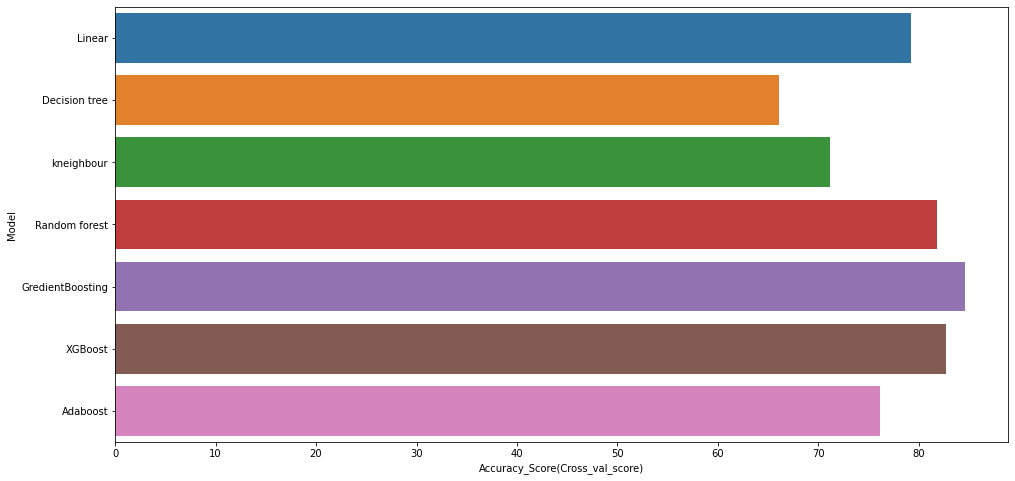

In [749]:
plt.figure(figsize=[16,8])
sns.barplot(data=lp,x='Accuracy_Score(Cross_val_score)',y='Model')
plt.show()

## Best Model
### We are chosing Gradient Boosting Regressor as a best model, Because this model has least diffrence between, R2 score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing GBR
### R2 Score : 88.88
### Cross_validation score : 84.65 
### Diffrence : 4.23
### Mean Suqared error : 15085.184
### Root mean absolute error: 20344.926

.

## Hyper Parameter tuning

### Grid search cv

In [753]:
parameter={'n_estimators':[100,150,200,250,300],
          'max_depth':[5,7,9,11,15],
          'learning_rate':[0.1,0.001,0.01,0.0001],
          'criterion':['friedman_mse','mse','squared_error']}

In [754]:
GSC=GridSearchCV(gbr,parameter,cv=7)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300}

In [755]:
GSC.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [756]:
GSC_pred=GSC.best_estimator_.predict(x_test)
r2_score(y_test,GSC_pred)

0.8641802866513083

In [757]:
gbr_tune=GradientBoostingRegressor(max_depth=5, n_estimators=300)
gbr_tune.fit(x_train,y_train)
prt=gbr_tune.predict(x_test)
print("r2 score:",r2_score(y_test,prt))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8634807560655102
Mean absolute error: 17808.204046699437
Mean squared error: 599725527.6361005
Root mean squared error: 24489.294143280255


### We have done with Hyper parameter tuning and got 86.34% accuracy .
### Model Name-Gradient Boosting Regressor
# Accuracy-86.34 %

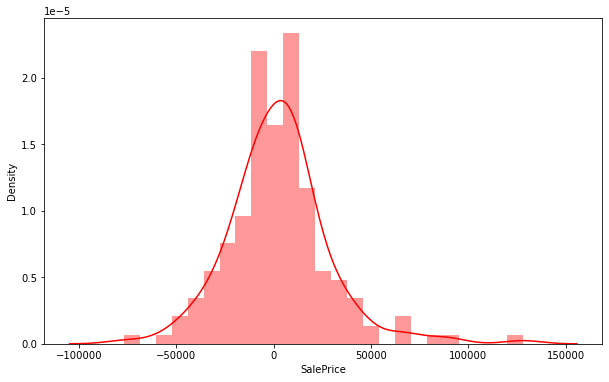

In [759]:
pred=gbr_tune.predict(x_test)
plt.figure(figsize=[10,6])
sns.distplot(y_test-pred,color='r')
plt.show()

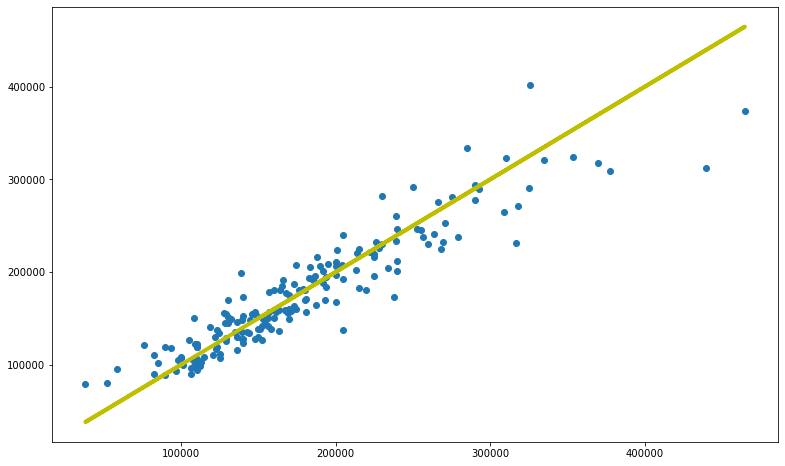

In [760]:
plt.figure(figsize=[13,8])
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,linewidth=4,color='y')
plt.show()

## Feature Importance

<AxesSubplot:>

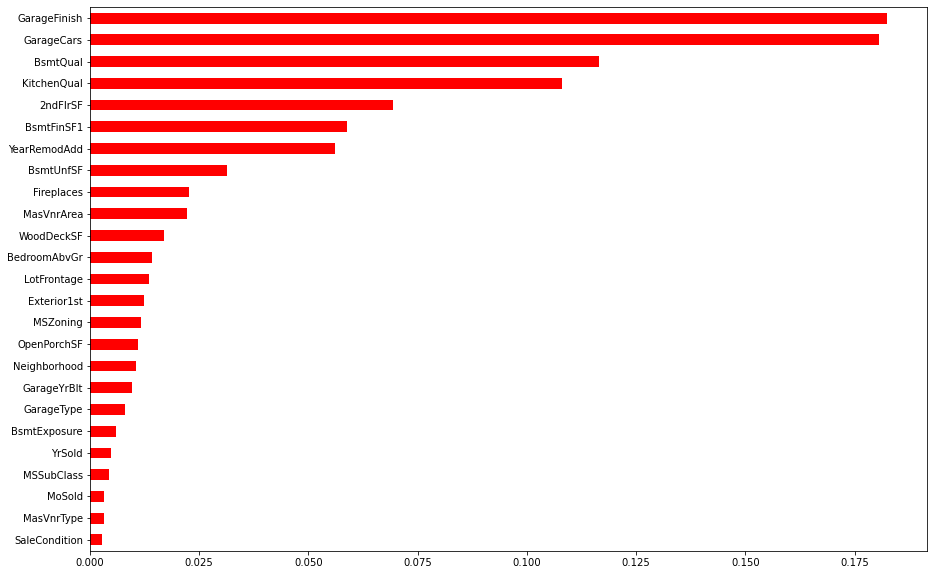

In [762]:
plt.figure(figsize=[15,10])
feature_imp=pd.Series(gbr_tune.feature_importances_,index=x.columns)
feature_imp.nlargest((25)).sort_values().plot(kind='barh',color='r',align='center')

## Saving the model

In [763]:
import joblib

In [764]:
joblib.dump(gbr_tune,"Housing_price.pkl")

['Housing_price.pkl']

## Importing Prediction data set

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [112]:
pr=pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\test.csv")

In [113]:
pd.set_option("display.max_columns",None)

In [114]:
pr.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

### Dropping some columns

In [115]:
pr.drop(['Id','Utilities','GarageCond','BsmtFinType2','GrLivArea','Street','Heating','Condition2','FireplaceQu',
'RoofStyle','TotalBsmtSF','YearBuilt','1stFlrSF','FullBath','OverallQual','GarageArea',
'TotRmsAbvGrd','CentralAir','GarageQual','Exterior2nd',
         'PavedDrive','OverallCond','LotArea','Condition1','ExterQual','Functional','LandContour'],axis=1,inplace=True)


## Imputation technique

In [116]:
from sklearn.impute import SimpleImputer

In [96]:
pr.drop(['PoolQC'],axis=1,inplace=True)

In [120]:
aka=['MiscFeature','Fence','GarageFinish','GarageYrBlt','GarageType','Electrical','BsmtQual',
     'BsmtCond','BsmtExposure','BsmtFinType1','MasVnrArea','MasVnrType','Alley','LotFrontage']

In [121]:
si=SimpleImputer(strategy='most_frequent')

In [122]:
for i in aka:
    pr[i]=si.fit_transform(pr[i].values.reshape(-1, 1))

In [123]:
pr.head(10)

MSSubClass MSZoning  LotFrontage Alley LotShape LotConfig LandSlope  \
0          20       RL         86.0  Grvl      IR1    Corner       Gtl   
1         120       RL         60.0  Grvl      IR1   CulDSac       Gtl   
2          20       RL         60.0  Grvl      Reg    Inside       Gtl   
3          70       RL         75.0  Grvl      Reg    Inside       Gtl   
4          60       RL         86.0  Grvl      IR1   CulDSac       Gtl   
5         180       RM         21.0  Grvl      Reg    Inside       Gtl   
6         180       RM         35.0  Grvl      Reg    Inside       Gtl   
7          20       RL        107.0  Grvl      Reg    Inside       Gtl   
8          80       RL         60.0  Grvl      Reg    Inside       Mod   
9         120       RM         32.0  Grvl      Reg       FR2       Gtl   

  Neighborhood BldgType HouseStyle  YearRemodAdd RoofMatl Exterior1st  \
0      StoneBr     1Fam     1Story          2006  CompShg     VinylSd   
1      StoneBr   TwnhsE     1Story          1984  CompShg     HdBoard   
2      CollgCr     1Fam     1Story          2001  CompShg     VinylSd   
3      Crawfor     1Fam     2Story          1950  CompShg     MetalSd   
4      Somerst     1Fam     2Story          2007  CompShg     VinylSd   
5      MeadowV    Twnhs     SFoyer          1970  CompShg     CemntBd   
6      Edwards   TwnhsE       SLvl          2005  CompShg     VinylSd   
7      NridgHt     1Fam     1Story          2008  CompShg     VinylSd   
8      SawyerW     1Fam       SLvl          1989  CompShg     Wd Sdng   
9      Mitchel   TwnhsE     1Story          1998  CompShg     VinylSd   

  MasVnrType  MasVnrArea ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      Stone       200.0        TA      PConc       Ex       TA           Gd   
1       None         0.0        TA     CBlock       Gd       TA           Av   
2       None         0.0        TA      PConc       Gd       TA           Av   
3       None         0.0        TA     CBlock       TA       TA           No   
4      Stone        74.0        TA      PConc       Gd       TA           Mn   
5       None         0.0        TA     CBlock       Gd       TA           Av   
6    BrkFace        80.0        TA      PConc       Gd       TA           Gd   
7      Stone       436.0        TA      PConc       Ex       TA           Gd   
8    BrkFace       145.0        TA      PConc       Gd       TA           Gd   
9    BrkFace       320.0        TA      PConc       Ex       TA           No   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF HeatingQC Electrical  \
0          GLQ        1249           0        673        Ex      SBrkr   
1          GLQ        1036           0        184        Gd      SBrkr   
2          Unf           0           0       1753        Ex      SBrkr   
3          Rec         275           0        429        Ex      SBrkr   
4          Unf           0           0        894        Ex      SBrkr   
5          BLQ         131         499          0        Gd      SBrkr   
6          GLQ         547           0          0        Gd      SBrkr   
7          GLQ        1400           0        310        Ex      SBrkr   
8          GLQ        1518           0          0        Gd      SBrkr   
9          GLQ         866           0        338        Ex      SBrkr   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  HalfBath  BedroomAbvGr  \
0         0             0             1             0         0             3   
1         0             0             1             0         0             1   
2         0             0             0             0         0             3   
3       704             0             0             0         1             3   
4      1039             0             0             0         1             4   
5         0             0             1             0         0             1   
6         0             0             1             0         0             2   
7         0             0             1 

### Encoding the columns

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
enc=['MSZoning', 'Alley', 'LotShape', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical',
       'KitchenQual', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','PoolQC']

In [126]:
le=LabelEncoder()

In [127]:
for i in enc:
    pr[i]=le.fit_transform(pr[i])

In [128]:
pr

MSSubClass  MSZoning  LotFrontage  Alley  LotShape  LotConfig  LandSlope  \
0            20         2         86.0      0         0          0          0   
1           120         2         60.0      0         0          1          0   
2            20         2         60.0      0         3          4          0   
3            70         2         75.0      0         3          4          0   
4            60         2         86.0      0         0          1          0   
..          ...       ...          ...    ...       ...        ...        ...   
287          20         2         78.0      0         3          4          0   
288          20         2         57.0      0         1          4          0   
289          20         2         60.0      0         0          1          0   
290          50         3         50.0      0         3          0          0   
291         160         3         21.0      0         3          4          0   

     Neighborhood  BldgType  HouseStyle  YearRemodAdd  RoofMatl  Exterior1st  \
0              21         0           2          2006         0            9   
1              21         4           2          1984         0            5   
2               4         0           2          2001         0            9   
3               5         0           5          1950         0            6   
4              20         0           5          2007         0            9   
..            ...       ...         ...           ...       ...          ...   
287            20         0           2          2007         0            9   
288             4         0           2          1995         0            9   
289            11         0           2          1970         0           10   
290             2         0           0          1950         0            4   
291             1         3           5          1973         0            5   

     MasVnrType  MasVnrArea  ExterCond  Foundation  BsmtQual  BsmtCond  \
0             3       200.0          3           2         0         2   
1             2         0.0          3           1         2         2   
2             2         0.0          3           2         2         2   
3             2         0.0          3           1         3         2   
4             3        74.0          3           2         2         2   
..          ...         ...        ...         ...       ...       ...   
287           3       468.0          3           2         2         2   
288           2         0.0          3           2         2         2   
289           1       180.0          3           1         3         2   
290           2         0.0          2           1         3         2   
291           1       408.0          3           1         3         0   

     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  HeatingQC  \
0               1             2        1249           0        673          0   
1               0             2        1036           0        184          2   
2               0             5           0           0       1753          0   
3               3             4         275           0        429          0   
4               2             5           0           0        894          0   
..            ...           ...         ...         ...        ...        ...   
287             3             2          33           0       1530          0   
288             3             2         686           0        304          0   
289             3             0         578           0        426          0   
290             3             0         399           0        605          0   
291             3             1         309           0        174          3   

     Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  HalfBath  \
0             3         0             0             1             0         0   
1             3         0             0        

## Calling model

In [159]:
import joblib

In [160]:
model=joblib.load('Housing_price.pkl')

In [131]:
model

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [132]:
pred=model.predict(pr)

In [154]:
pd.set_option('precision', 0)

In [156]:
result=pd.DataFrame({'Prediction':prediction})

In [158]:
result.iloc[0:25,:]

Prediction
0       297317
1       241280
2       262684
3       279741
4       264159
5       183564
6       235467
7       257135
8       242431
9       292261
10      177302
11      244081
12      185964
13      218194
14      216318
15      246798
16      193355
17      233106
18      232594
19      278214
20      243993
21      189107
22      209245
23      162528
24      223476